In [966]:
%matplotlib inline
import datawig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.pipeline
import numpy as np
import warnings
warnings.simplefilter('ignore')
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib.pyplot import figure
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Flatten
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm
from sklearn import neural_network
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from sklearn.metrics import  f1_score
from sklearn.model_selection import KFold
# Plots
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
from keras import optimizers
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from sklearn.linear_model import Lasso
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from imblearn.over_sampling import SMOTE
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import keras.backend as K
import lightgbm as lgb
from matplotlib import pyplot

# Merge all the Datasets

#### It includes all the datasets - cleveland, switzerland, va, hungarian

In [967]:
def download_file_data(url, save_folder):
    '''If the file isn't already in the save folder, download it.'''
    local_filename = url.split('/')[-1]  #Get the name of the file being downloaded

    # if the file exists, don't download it again
    if os.path.isfile(os.path.join(save_folder, local_filename)):
        return os.path.join(save_folder, local_filename)

    r = requests.get(url, stream=True)
    with open(os.path.join(save_folder, local_filename), 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:  # filter out keep-alive new chunks
                f.write(chunk)
    return os.path.join(save_folder, local_filename)  #Returns the path pointing to the local file

In [968]:
cleveland_data = download_file_data(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", os.getcwd())

switzerland_data = download_file_data(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data",
        os.getcwd())

va_data = download_file_data("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",
                       os.getcwd())

hungarian_data = download_file_data(
        "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", os.getcwd())

In [969]:
cleveland_df = pd.read_csv(cleveland_data, header=None, na_values =["?", -9.0])
switzerland_df = pd.read_csv(switzerland_data, header=None, na_values =["?", -9.0])
va_df = pd.read_csv(va_data, header=None, na_values =["?", -9.0])
hungarian_df = pd.read_csv(hungarian_data, header=None, na_values =["?", -9.0])

In [970]:
cleveland_df["Source"] = "cleveland"
switzerland_df["Source"] = "switzerland"
va_df["Source"] = "va"
hungarian_df["Source"] = "hungarian"

In [971]:
headers_data =     {0 : "age",
               1 : "sex",
               2 : "cp",
               3 : "trestbps",
               4 : "chol",
               5 : "fbs",
               6 : "restecg",
               7 : "thalach",
               8 : "exang",
               9 : "oldpeak",
               10 : "slope",
               11 : "ca",
               12 : "thal",
               13 : "target"}


cleveland_df = cleveland_df.rename(columns=headers_data)
switzerland_df = switzerland_df.rename(columns=headers_data)
va_df = va_df.rename(columns=headers_data)
hungarian_df = hungarian_df.rename(columns=headers_data)

In [972]:
heart_disease_df = cleveland_df.append(switzerland_df).append(va_df).append(hungarian_df)

In [973]:
print(heart_disease_df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target     Source  
0    3.0  0.0   6.0       0  cleveland  
1    2.0  3.0   3.0       2  cleveland  
2    2.0  2.0   7.0       1  cleveland  
3    3.0  0.0   3.0       0  cleveland  
4    1.0  0.0   3.0       0  cleveland  


In [974]:
heart_disease_df.target.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [975]:
#make all the target variable values to 1 which is greater than 1
heart_disease_df.loc[heart_disease_df['target'] > 1, 'target'] = 1

In [976]:
heart_disease_df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  920.000000  920.000000  920.000000  861.000000  890.000000  830.000000   
mean    53.510870    0.789130    3.250000  132.132404  199.130337    0.166265   
std      9.424685    0.408148    0.930969   19.066070  110.780810    0.372543   
min     28.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%     47.000000    1.000000    3.000000  120.000000  175.000000    0.000000   
50%     54.000000    1.000000    4.000000  130.000000  223.000000    0.000000   
75%     60.000000    1.000000    4.000000  140.000000  268.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  603.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  918.000000  865.000000  865.000000  858.000000  611.000000  309.000000   
mean     0.604575  137.545665    0.389595    0.878788    1.770867    0.676375   
std      0.805827   25.926276    0.487941    1.091226    0.619256    0.935653   
min      0.000000   60.000000    0.000000   -2.600000    1.000000    0.000000   
25%      0.000000  120.000000    0.000000    0.000000    1.000000    0.000000   
50%      0.000000  140.000000    0.000000    0.500000    2.000000    0.000000   
75%      1.000000  157.000000    1.000000    1.500000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal      target  
count  434.000000  920.000000  
mean     5.087558    0.553261  
std      1.919075    0.497426  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      6.000000    1.000000  
75%      7.000000    1.000000  
max      7.000000    1.000000

In [977]:
heart_disease_df.target.value_counts()

1    509
0    411
Name: target, dtype: int64

In [978]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 293
Data columns (total 15 columns):
age         920 non-null float64
sex         920 non-null float64
cp          920 non-null float64
trestbps    861 non-null float64
chol        890 non-null float64
fbs         830 non-null float64
restecg     918 non-null float64
thalach     865 non-null float64
exang       865 non-null float64
oldpeak     858 non-null float64
slope       611 non-null float64
ca          309 non-null float64
thal        434 non-null float64
target      920 non-null int64
Source      920 non-null object
dtypes: float64(13), int64(1), object(1)
memory usage: 115.0+ KB


#### How many people are suffering from Heart Disease ?

Text(0.5,1,'Heart Disease')

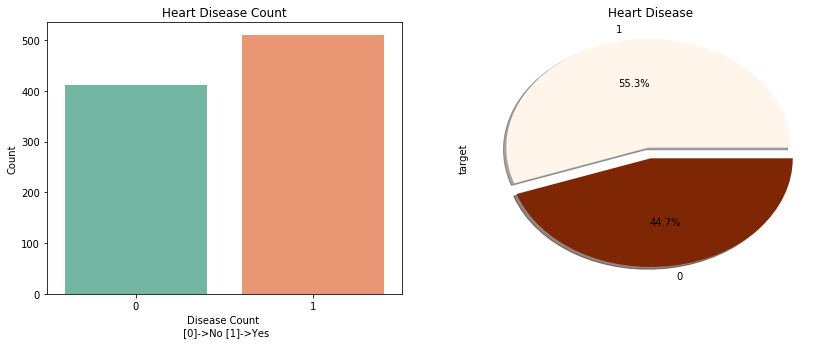

In [979]:
fig,ax=plt.subplots(1, 2, figsize = (14,5))
sns.countplot(data=heart_disease_df, x='target', ax=ax[0],palette='Set2')
ax[0].set_xlabel("Disease Count \n [0]->No [1]->Yes")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
heart_disease_df['target'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap='Oranges')
plt.title("Heart Disease")

##### From above graph we can say that more than half of the population suffering from Heart Disease with parcentage of 55.3%.

### Sex

In [980]:
heart_disease_df.sex.value_counts()

1.0    726
0.0    194
Name: sex, dtype: int64

In [981]:
pd.crosstab(heart_disease_df['sex'], heart_disease_df['target'])

target    0    1
sex             
0.0     144   50
1.0     267  459

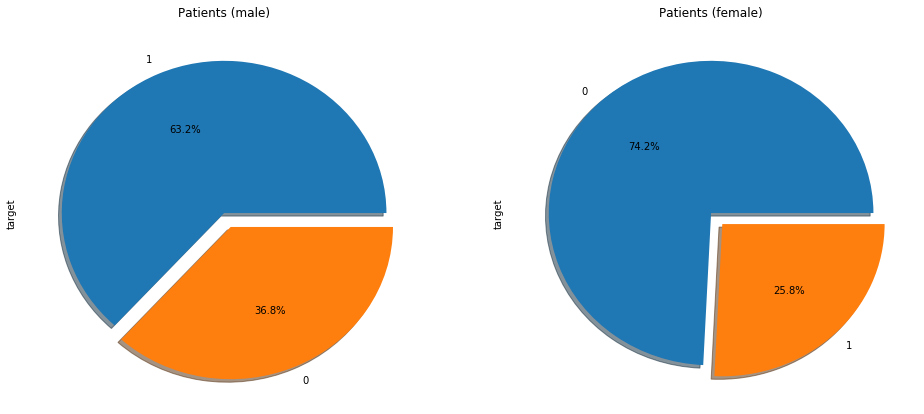

In [982]:
f,ax=plt.subplots(1,2,figsize=(16,7))

heart_disease_df.loc[heart_disease_df['sex']==1, 'target'].value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[0],shadow=True)
heart_disease_df.loc[heart_disease_df['sex']==0, 'target'].value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('Patients (male)')
ax[1].set_title('Patients (female)')

plt.show()

##### Male are ~64% of male are suffering from heart disease but , in case of female, it is less (~26%)

Text(0.5,1,'0 ->Female , 1 -> Male')

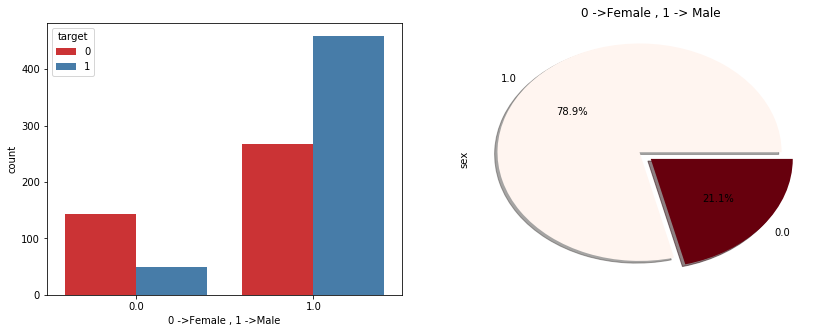

In [983]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=heart_disease_df,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 ->Female , 1 ->Male")
heart_disease_df.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Reds')
ax[1].set_title("0 ->Female , 1 -> Male")

##### Number of Men suffering from Heart Disease are more than Women

## cp

In [888]:
heart_disease_df.cp.unique()

array([1., 4., 3., 2.])

In [889]:
heart_disease_df.cp.value_counts()

4.0    496
3.0    204
2.0    174
1.0     46
Name: cp, dtype: int64

In [890]:
pd.crosstab(heart_disease_df['cp'], heart_disease_df['target']).style.background_gradient(cmap='PuBuGn')

In [24]:
df = heart_disease_df.groupby(['cp', 'target']).size()
df

cp   target
1.0  0          26
     1          20
2.0  0         150
     1          24
3.0  0         131
     1          73
4.0  0         104
     1         392
dtype: int64

Text(0.5,1,'Chest pain')

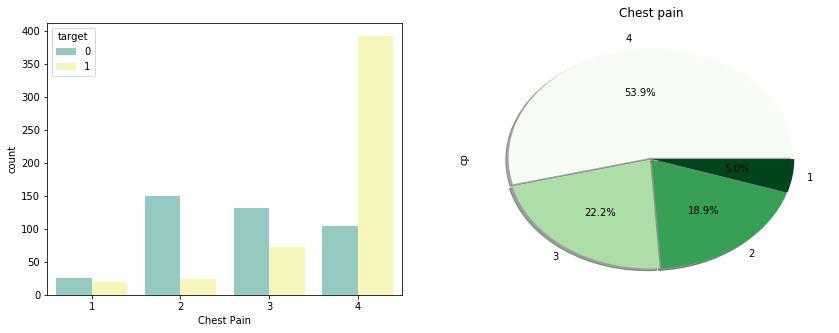

In [25]:
heart_disease_df.cp = heart_disease_df.cp.astype(int)
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='cp',data=heart_disease_df,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("Chest Pain")
heart_disease_df.cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01],shadow=True, cmap='Greens')
ax[1].set_title("Chest pain")

##### Approx. 80% asymptomatic chest pain people diagnoised with heart disease

##### Patients who had chest pain type 4 is more in the category of people with disease. Also, chest pain type 2 is not that serious as there are many people (150) who had chest pain type 2 without heart disease.

## exang

In [26]:
heart_disease_df.exang.unique()

array([ 0.,  1., nan])

In [27]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 293
Data columns (total 15 columns):
age         920 non-null float64
sex         920 non-null float64
cp          920 non-null int32
trestbps    861 non-null float64
chol        890 non-null float64
fbs         830 non-null float64
restecg     918 non-null float64
thalach     865 non-null float64
exang       865 non-null float64
oldpeak     858 non-null float64
slope       611 non-null float64
ca          309 non-null float64
thal        434 non-null float64
target      920 non-null int64
Source      920 non-null object
dtypes: float64(12), int32(1), int64(1), object(1)
memory usage: 131.4+ KB


In [28]:
heart_disease_df.exang.value_counts()

0.0    528
1.0    337
Name: exang, dtype: int64

In [29]:
df = heart_disease_df.groupby(['exang', 'target']).size()
df

exang  target
0.0    0         336
       1         192
1.0    0          55
       1         282
dtype: int64

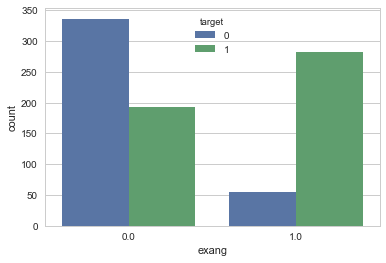

In [30]:
sns.set(style="whitegrid")
ax = sns.countplot(x="exang", hue="target", data=heart_disease_df)

##### exercise induced angina has more heart disease patients but ~37 % of heart disease is without exercise induced angina

## fbs

In [31]:
heart_disease_df.fbs.unique()

array([ 1.,  0., nan])

In [32]:
heart_disease_df.fbs.value_counts()

0.0    692
1.0    138
Name: fbs, dtype: int64

In [33]:
heart_disease_df.groupby(['fbs', 'target']).size()

fbs  target
0.0  0         353
     1         339
1.0  0          44
     1          94
dtype: int64

Text(0.5,1,'0 -> fbs <120 , 1 -> fbs>120')

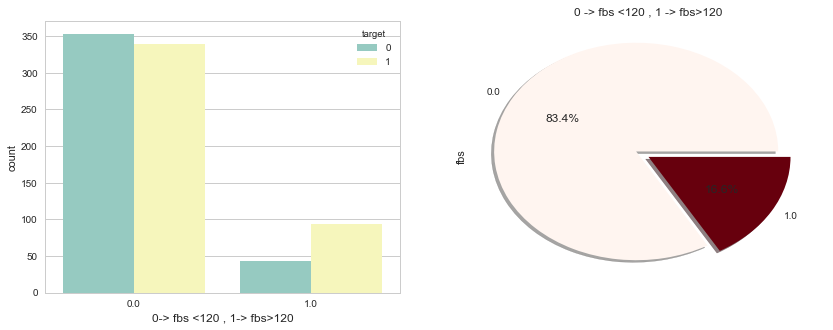

In [34]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='fbs',data=heart_disease_df,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("0-> fbs <120 , 1-> fbs>120",size=12)
heart_disease_df.fbs.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0],cmap='Reds')
ax[1].set_title("0 -> fbs <120 , 1 -> fbs>120",size=12)

##### Approx half of the patients who have bps < 120 have heart disease but the percentage of fbs > 120 having heart disease is higher (based on given dataset) 
##### According to the data, more than 50% are suffering from heart disease

## restecg

In [35]:
heart_disease_df.restecg.unique()

array([ 2.,  0.,  1., nan])

In [36]:
heart_disease_df.restecg.value_counts()

0.0    551
2.0    188
1.0    179
Name: restecg, dtype: int64

In [37]:
pd.crosstab(heart_disease_df['restecg'], heart_disease_df['target']).style.background_gradient(cmap='Purples')

Text(0.5,1,'resting electrocardiographic')

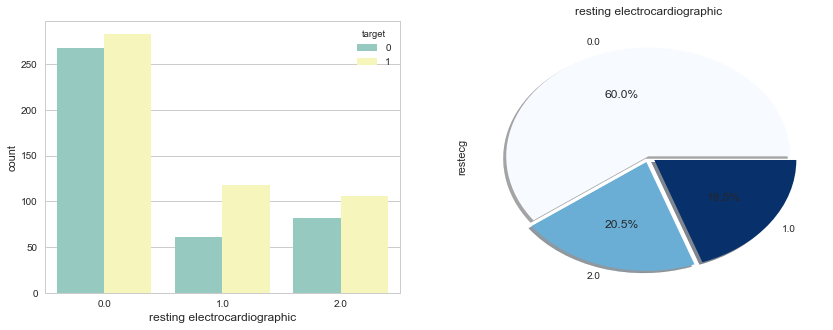

In [38]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='restecg',data=heart_disease_df,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("resting electrocardiographic",size=12)
heart_disease_df.restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("resting electrocardiographic",size=12)

##### With above graph as a reference we can see if resting electrocardiographic is 1 (having ST-T wave abnormality) then person have more chances of suffering from Heart Disease but, in all cases, there are more heart disease patients. So, this might not be a good indicator

## slope

In [39]:
heart_disease_df.slope.unique()

array([ 3.,  2.,  1., nan])

In [40]:
heart_disease_df.slope.value_counts()

2.0    345
1.0    203
3.0     63
Name: slope, dtype: int64

Text(0.5,1,'peak exercise ST segment ')

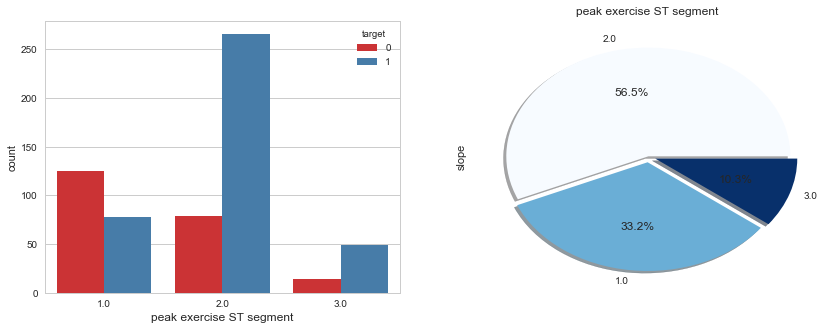

In [41]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='slope',data=heart_disease_df,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
heart_disease_df.slope.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.005,0.05,0.05],cmap='Blues')

ax[1].set_title("peak exercise ST segment ",size=12)

##### Bar Graph shows slope 2.0 is less prone to heart disease. Slope 1.0 persons are more prone to heart disease

##### With above graph as a refrence we can see if resting slope is flat and downslopping then person have more chances of suffering from Heart Disease. This could be good indicator

In [42]:
heart_disease_df.groupby(['slope', 'target']).size()

slope  target
1.0    0         125
       1          78
2.0    0          79
       1         266
3.0    0          14
       1          49
dtype: int64

In [43]:
heart_disease_df.slope.value_counts()

2.0    345
1.0    203
3.0     63
Name: slope, dtype: int64

## thal

In [44]:
heart_disease_df.thal.unique()

array([ 6.,  3.,  7., nan])

In [45]:
heart_disease_df.thal.value_counts()

3.0    196
7.0    192
6.0     46
Name: thal, dtype: int64

Text(0.5,1,'number of major vessels colored by flourosopy')

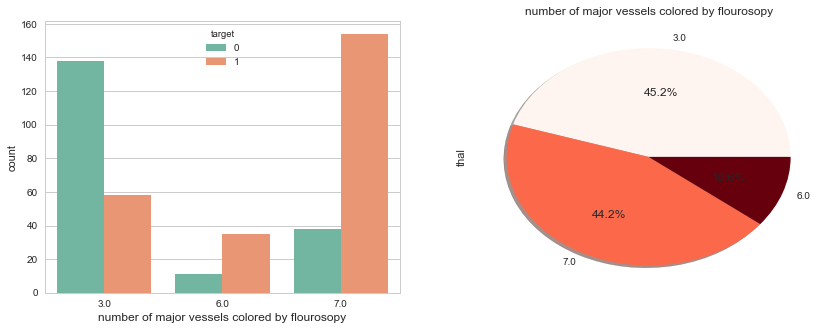

In [46]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='thal',data=heart_disease_df,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy",size=12)
heart_disease_df.thal.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Reds')
ax[1].set_title("number of major vessels colored by flourosopy",size=12)

In [47]:
heart_disease_df.groupby(['thal', 'target']).size()

thal  target
3.0   0         138
      1          58
6.0   0          11
      1          35
7.0   0          38
      1         154
dtype: int64

##### Based on above graph, thal 7 (reversable defect) has more heart disease cases

## ca

In [48]:
heart_disease_df.ca.unique()

array([ 0.,  3.,  2.,  1., nan])

In [49]:
heart_disease_df.ca.value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

Text(0.5,1,'number of major vessels colored by flourosopy')

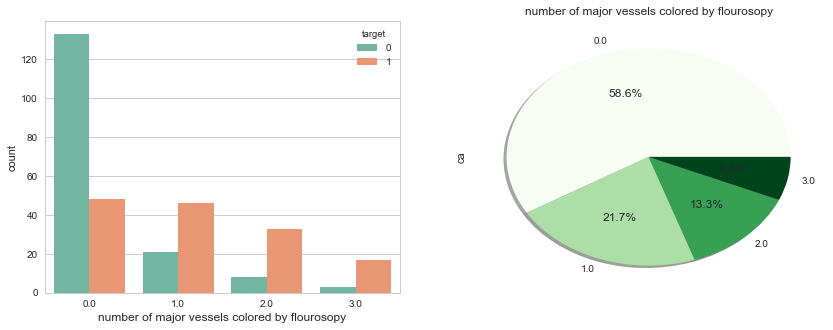

In [50]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='ca',data=heart_disease_df,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy",size=12)
heart_disease_df.ca.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Greens')
ax[1].set_title("number of major vessels colored by flourosopy",size=12)

In [51]:
heart_disease_df.groupby(['ca', 'target']).size()

ca   target
0.0  0         133
     1          48
1.0  0          21
     1          46
2.0  0           8
     1          33
3.0  0           3
     1          17
dtype: int64

##### Above graph shows ca 1, 2 and 3 have more heart patients

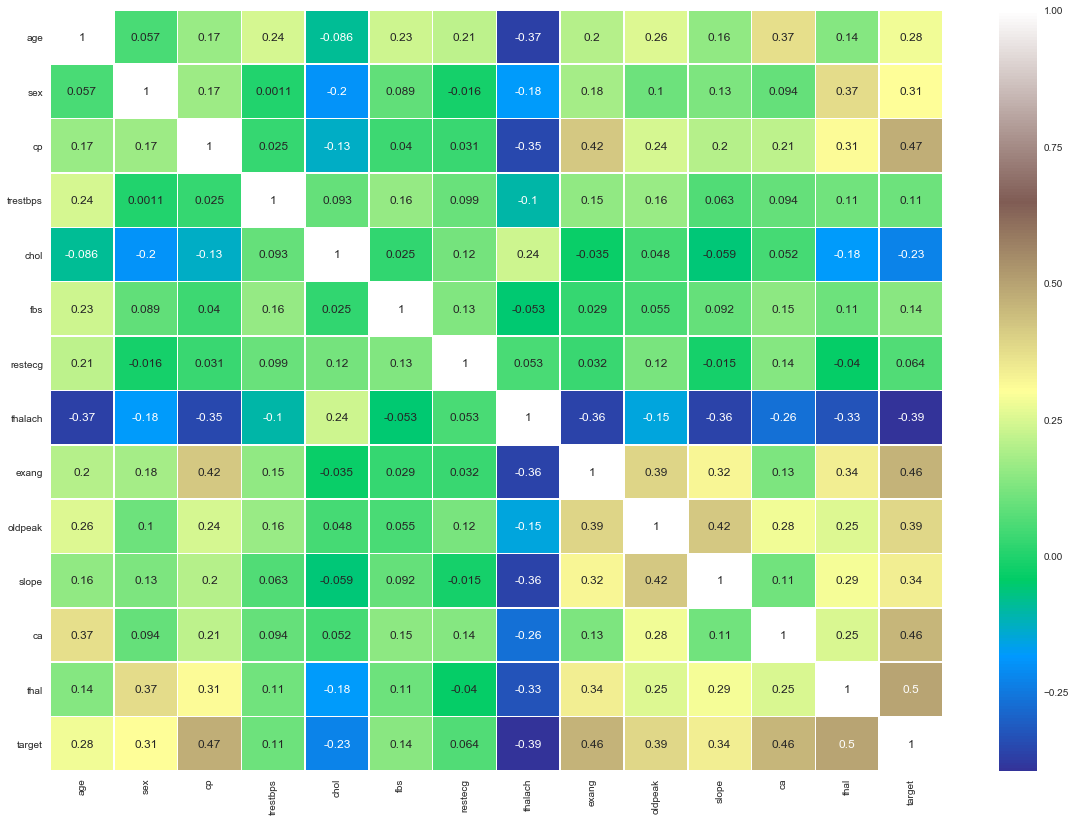

In [52]:
# create a correlation heatmap
sns.heatmap(heart_disease_df.corr(),annot=True, cmap='terrain', linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(20,14)
plt.show()

##### No strong Correlation among variables

## Trestbps

In [53]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 293
Data columns (total 15 columns):
age         920 non-null float64
sex         920 non-null float64
cp          920 non-null int32
trestbps    861 non-null float64
chol        890 non-null float64
fbs         830 non-null float64
restecg     918 non-null float64
thalach     865 non-null float64
exang       865 non-null float64
oldpeak     858 non-null float64
slope       611 non-null float64
ca          309 non-null float64
thal        434 non-null float64
target      920 non-null int64
Source      920 non-null object
dtypes: float64(12), int32(1), int64(1), object(1)
memory usage: 131.4+ KB


In [54]:
pd.isnull(heart_disease_df.trestbps).sum()

59

In [55]:
heart_disease_df_nonull = heart_disease_df[heart_disease_df.trestbps.notnull()]

In [56]:
pd.isnull(heart_disease_df_nonull.trestbps).sum()

0

In [57]:
heart_disease_df_nonull.trestbps.describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [58]:
Q1 = np.percentile(heart_disease_df_nonull.trestbps, 25, interpolation = 'midpoint')
Q3 = np.percentile(heart_disease_df_nonull.trestbps, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

20.0


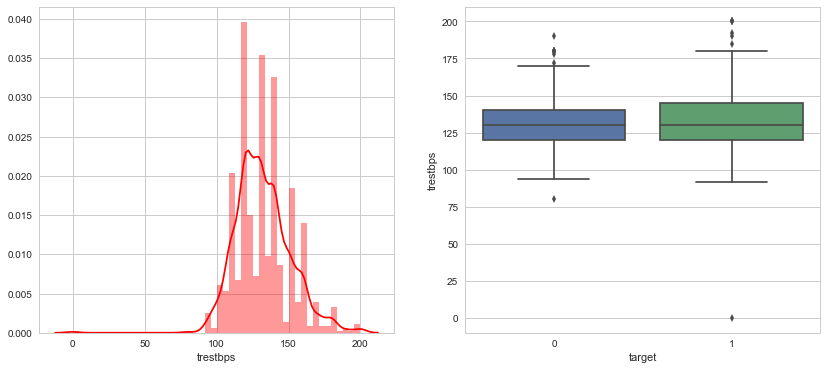

In [59]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(a=heart_disease_df_nonull['trestbps'], color='red',ax=ax[0]);

sns.boxplot(x=heart_disease_df_nonull['target'], y=heart_disease_df_nonull['trestbps'], ax=ax[1]);

##### Heart disease patients do not have trestbps less than 100 and medians are almost same

Text(0.5,1,'Trestbps V/S CA (Major Vessel Coloured)')

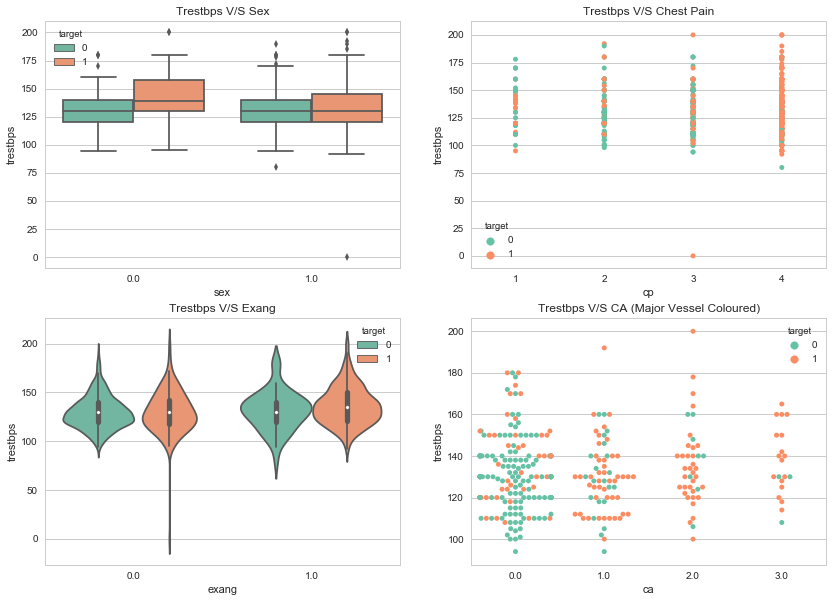

In [60]:
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='trestbps',data=heart_disease_df,x='sex',hue='target',palette='Set2',ax=ax[0,0])
ax[0,0].set_title("Trestbps V/S Sex")

sns.stripplot(y='trestbps',data=heart_disease_df,x='cp',hue='target',ax=ax[0,1],palette='Set2')
ax[0,1].set_title("Trestbps V/S Chest Pain")

sns.violinplot(y='trestbps',data=heart_disease_df,x='exang',hue='target',ax=ax[1,0],palette='Set2')
ax[1,0].set_title("Trestbps V/S Exang")

sns.swarmplot(y='trestbps',data=heart_disease_df,x='ca',hue='target',ax=ax[1,1],palette='Set2')
ax[1,1].set_title("Trestbps V/S CA (Major Vessel Coloured)")

##### In the figure 1, the box shows that , either male or female, have the same trestbps distribution for those who don't have heart disease
##### In the figure 1, heart patients (both male and female) have same (almost) upper whisker trestbps value
##### In the figure 1, 75% of male heart patients have trestbps below 150
##### In the figure 3, patients having heart disease tends to have more resting blood pressure (only for 1.5x interquartile range) than those don't have heart disease for both exang (yes) and exang (no)
##### In the figure 3, all the distribution have approx. same median values and distribution are more around the median
##### In the figure 3, few of the outlier present in the female heart patients
##### In the figure 4, Major Vessel 1, 2 and 3 have more heart disease patients who have trestbps between 110 to 160
##### In the figure 2, cheat pain type 4 (asymptomatic) are more prone to have heart disease with any trestbps value

## chol

In [61]:
pd.isnull(heart_disease_df.chol).sum()

30

In [62]:
heart_disease_df_nonull = heart_disease_df[heart_disease_df.chol.notnull()]

In [63]:
pd.isnull(heart_disease_df_nonull.chol).sum()

0

In [64]:
heart_disease_df_nonull.chol.describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

In [65]:
heart_disease_df_nonull.chol.quantile([0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.95])

0.15      0.0
0.20    130.6
0.25    175.0
0.30    193.0
0.40    211.0
0.50    223.0
0.60    240.0
0.70    258.0
0.75    268.0
0.80    277.0
0.90    306.0
0.95    334.1
Name: chol, dtype: float64

In [66]:
Q1 = np.percentile(heart_disease_df_nonull.chol, 25, interpolation = 'midpoint')
Q3 = np.percentile(heart_disease_df_nonull.chol, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

93.0


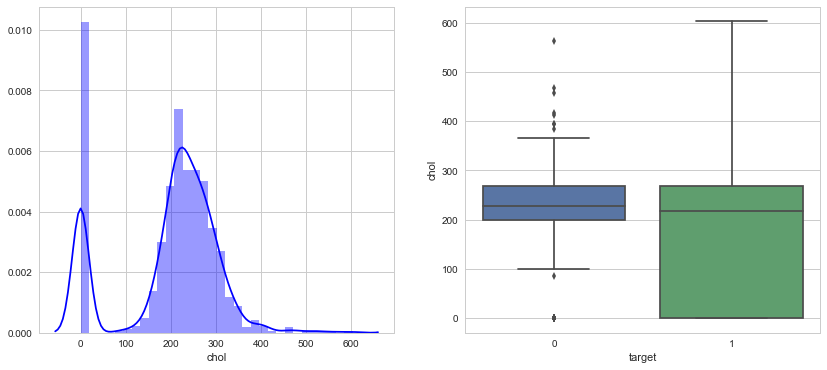

In [67]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(a=heart_disease_df_nonull['chol'], color='blue',ax=ax[0]);

sns.boxplot(x=heart_disease_df_nonull['target'], y=heart_disease_df_nonull['chol'], ax=ax[1]);

##### Most of the distribution is inbetween 150 and 350. Both the distribution is looking same in the second figure

Text(0.5,1,'Cholestrol V/S Ca')

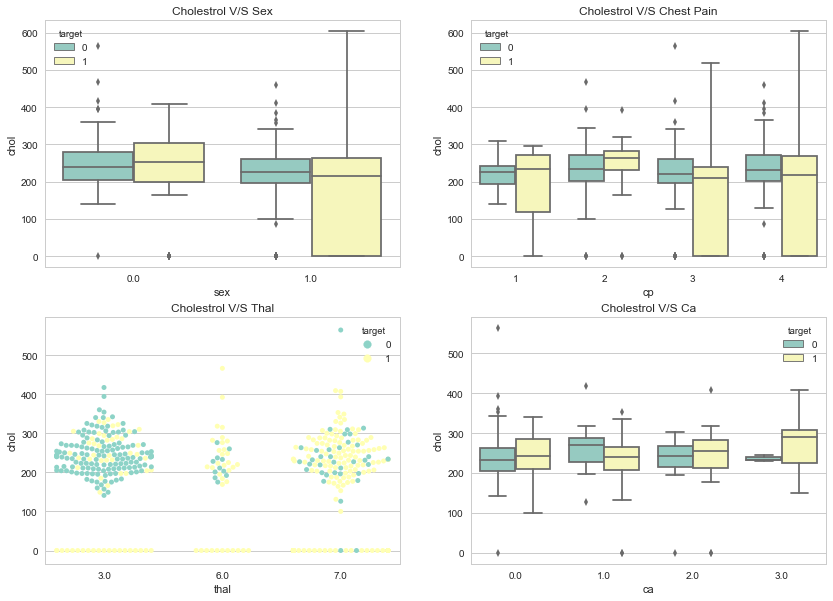

In [68]:
fig,ax=plt.subplots(2,2,figsize=(14,10))

sns.boxplot(y='chol',data=heart_disease_df,x='sex',hue='target',palette='Set3',ax=ax[0,0])
ax[0,0].set_title("Cholestrol V/S Sex")

sns.boxplot(y='chol',data=heart_disease_df,x='cp',hue='target',ax=ax[0,1],palette='Set3')
ax[0,1].set_title("Cholestrol V/S Chest Pain")

sns.swarmplot(y='chol',data=heart_disease_df,x='thal',hue='target',ax=ax[1,0],palette='Set3')
ax[1,0].set_title("Cholestrol V/S Thal")

sns.boxplot(y='chol',data=heart_disease_df,x='ca',hue='target',ax=ax[1,1],palette='Set3')
ax[1,1].set_title("Cholestrol V/S Ca")

##### For both, male and female, serum cholestrol is between 200 and 300 who doesn't have heart disease
##### According to figure 1, if male having heart disease to have total cholestrol from 0 to 300 (till 90 percentile) so heart disease mostly depends on other factors combination as well
##### People with  thal 7 and cholestrol inbetween 200 and 300 are more likely to have heart disease
##### 3 number of major vessels colored by flourosopy and colestrol is between 200 and 300 people are more likely to have heart disease

## Oldpeak

In [69]:
pd.isnull(heart_disease_df.oldpeak).sum()

62

In [70]:
heart_disease_df_nonull = heart_disease_df[heart_disease_df.oldpeak.notnull()]

In [71]:
pd.isnull(heart_disease_df_nonull.oldpeak).sum()

0

In [72]:
heart_disease_df_nonull.oldpeak.describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [73]:
Q1 = np.percentile(heart_disease_df_nonull.oldpeak, 25, interpolation = 'midpoint')
Q3 = np.percentile(heart_disease_df_nonull.oldpeak, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

1.5


In [74]:
heart_disease_df_nonull.oldpeak.quantile([0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.95])

0.15    0.0
0.20    0.0
0.25    0.0
0.30    0.0
0.40    0.0
0.50    0.5
0.60    1.0
0.70    1.4
0.75    1.5
0.80    2.0
0.90    2.5
0.95    3.0
Name: oldpeak, dtype: float64

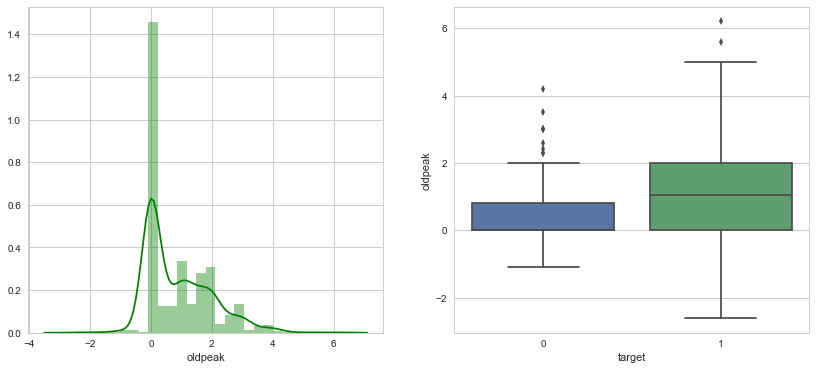

In [75]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(a=heart_disease_df_nonull['oldpeak'], color='green',ax=ax[0]);

sns.boxplot(x=heart_disease_df_nonull['target'], y=heart_disease_df_nonull['oldpeak'], ax=ax[1]);

##### Data is right skewed
##### Median is far comparatively

Text(0.5,1,'oldpeak V/S CA')

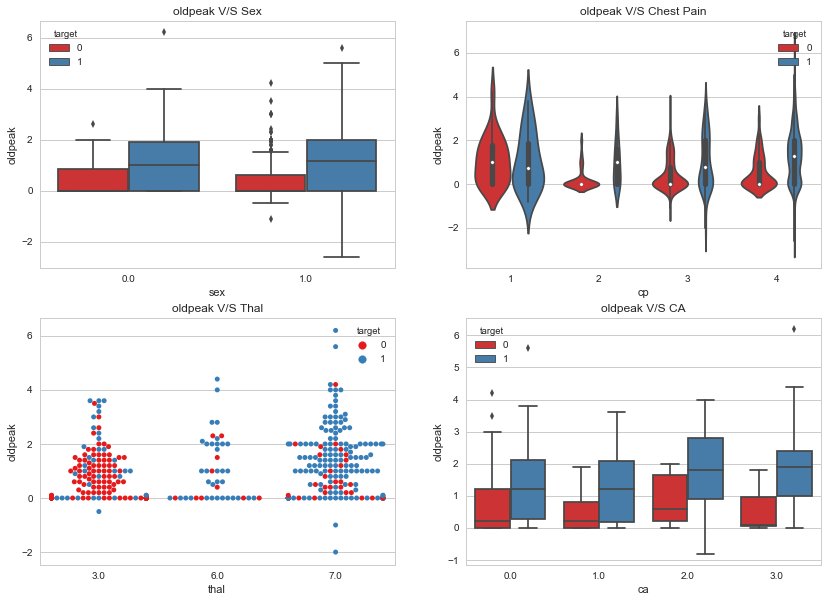

In [76]:
fig,ax=plt.subplots(2,2,figsize=(14,10))

sns.boxplot(y='oldpeak',data=heart_disease_df,x='sex',hue='target',palette='Set1',ax=ax[0,0])
ax[0,0].set_title("oldpeak V/S Sex")

sns.violinplot(y='oldpeak',data=heart_disease_df,x='cp',hue='target',ax=ax[0,1],palette='Set1')
ax[0,1].set_title("oldpeak V/S Chest Pain")

sns.swarmplot(y='oldpeak',data=heart_disease_df,x='thal',hue='target',ax=ax[1,0],palette='Set1')
ax[1,0].set_title("oldpeak V/S Thal")

sns.boxplot(y='oldpeak',data=heart_disease_df,x='ca',hue='target',ax=ax[1,1],palette='Set1')
ax[1,1].set_title("oldpeak V/S CA")

##### People with thal 6 or 7 with oldpeak 0 to 2 more likely to have heart disease
##### Chest pain with oldpeak more than 0 chances to have heart disease
##### More the oldpeak with any 'ca', more prone to have heart disease

In [77]:
heart_disease_df.oldpeak.describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [78]:
heart_disease_df.loc[heart_disease_df.oldpeak < 0, 'oldpeak']

6    -1.1
12   -1.5
17   -0.1
18   -2.6
32   -0.7
56   -2.0
58   -1.0
59   -1.0
94   -0.8
97   -0.5
99   -0.9
5    -0.5
Name: oldpeak, dtype: float64

### Age

In [79]:
heart_disease_df.age.describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [80]:
Q1 = np.percentile(heart_disease_df.age, 25, interpolation = 'midpoint')
Q3 = np.percentile(heart_disease_df.age, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

13.0


In [81]:
heart_disease_df.age.quantile([0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.95])

0.15    43.0
0.20    45.0
0.25    47.0
0.30    49.0
0.40    52.0
0.50    54.0
0.60    57.0
0.70    59.0
0.75    60.0
0.80    62.0
0.90    65.0
0.95    68.0
Name: age, dtype: float64

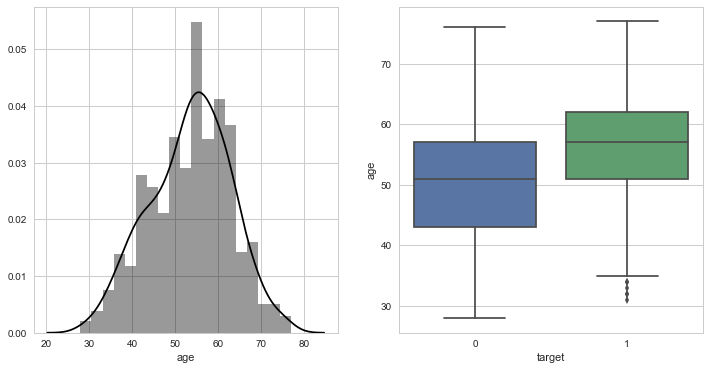

In [82]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.distplot(a=heart_disease_df['age'], color='black',ax=ax[0]);

sns.boxplot(x=heart_disease_df['target'], y=heart_disease_df['age'], ax=ax[1]);

##### Median age of people with heart disease is more than the people without heart disease

### age distribution of heart disease with different datasets

In [83]:
cleveland_age = heart_disease_df[(heart_disease_df['Source'] == 'cleveland') & (heart_disease_df['target'] == 1)]['age']
switzerland_age = heart_disease_df[(heart_disease_df['Source'] == 'switzerland') & (heart_disease_df['target'] == 1)]['age']
va_age = heart_disease_df[(heart_disease_df['Source'] == 'va') & (heart_disease_df['target'] == 1)]['age']
hungarian_age = heart_disease_df[(heart_disease_df['Source'] == 'hungarian') & (heart_disease_df['target'] == 1)]['age']

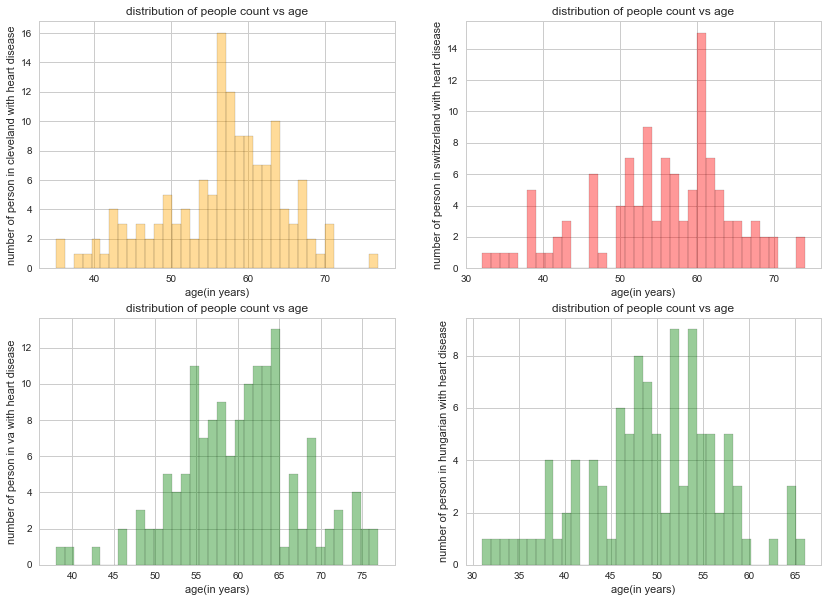

In [84]:
# age distribution of people affected

# seaborn histogram
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.distplot(cleveland_age, ax=ax[0,0], hist=True, kde=False, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
# Add labels
ax[0,0].set_title('distribution of people count vs age')
ax[0,0].set(xlabel='age(in years)', ylabel='number of person in cleveland with heart disease')

sns.distplot(switzerland_age, ax=ax[0,1], hist=True, kde=False, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
ax[0,1].set_title('distribution of people count vs age')
ax[0,1].set(xlabel='age(in years)', ylabel='number of person in switzerland with heart disease')

sns.distplot(va_age, ax=ax[1,0], hist=True, kde=False, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
# Add labels
ax[1,0].set_title('distribution of people count vs age')
ax[1,0].set(xlabel='age(in years)', ylabel='number of person in va with heart disease')

sns.distplot(hungarian_age, ax=ax[1,1], hist=True, kde=False, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
# Add labels
ax[1,1].set_title('distribution of people count vs age')
ax[1,1].set(xlabel='age(in years)', ylabel='number of person in hungarian with heart disease')

plt.show()
#sns.distplot(heart_disease_df['age'])

##### In all except hungarian dataset, most of the data is roaming around age 55 to 65. In hungary, people of age 45 to 60 are diagonised with heart disease

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026AD28D5320>,
      dtype=object)

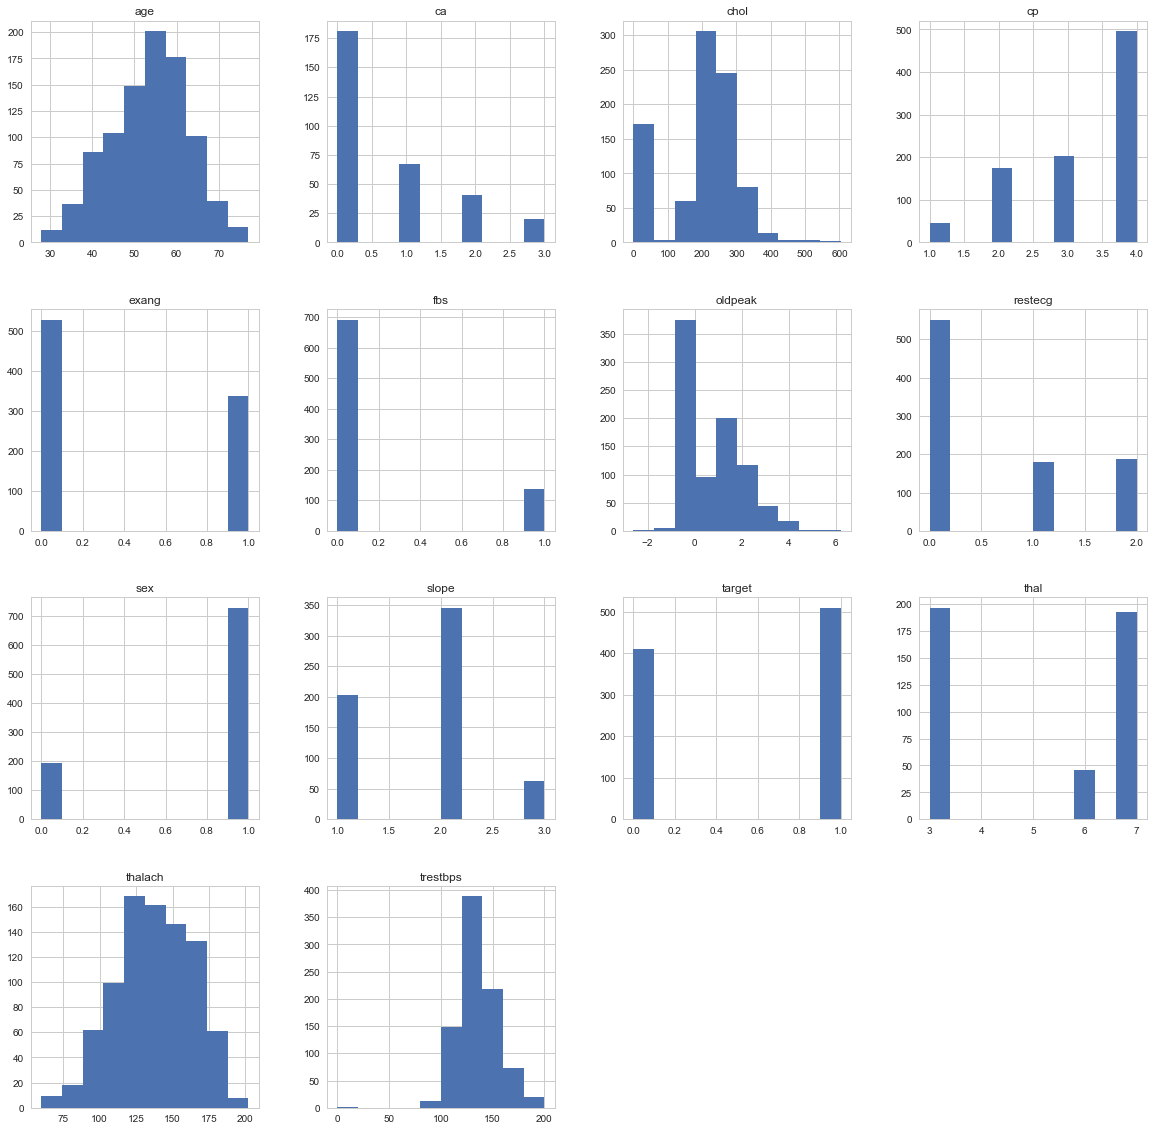

In [85]:
rcParams['figure.figsize'] = 20, 20
heart_disease_df.hist()

##### age seems normally distributed but oldpeak is right skewed

In [16]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 293
Data columns (total 15 columns):
age         920 non-null float64
sex         920 non-null float64
cp          920 non-null float64
trestbps    861 non-null float64
chol        890 non-null float64
fbs         830 non-null float64
restecg     918 non-null float64
thalach     865 non-null float64
exang       865 non-null float64
oldpeak     858 non-null float64
slope       611 non-null float64
ca          309 non-null float64
thal        434 non-null float64
target      920 non-null int64
Source      920 non-null object
dtypes: float64(13), int64(1), object(1)
memory usage: 135.0+ KB


In [984]:
heart_disease_df.sex=heart_disease_df.sex.astype('str')
heart_disease_df.cp=heart_disease_df.cp.astype('str')
heart_disease_df.fbs=heart_disease_df.fbs.astype('str')
heart_disease_df.restecg=heart_disease_df.restecg.astype('str')
heart_disease_df.exang=heart_disease_df.exang.astype('str')
heart_disease_df.ca=heart_disease_df.ca.astype('str')
heart_disease_df.slope=heart_disease_df.slope.astype('str')
heart_disease_df.thal=heart_disease_df.thal.astype('str')

In [985]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 293
Data columns (total 15 columns):
age         920 non-null float64
sex         920 non-null object
cp          920 non-null object
trestbps    861 non-null float64
chol        890 non-null float64
fbs         920 non-null object
restecg     920 non-null object
thalach     865 non-null float64
exang       920 non-null object
oldpeak     858 non-null float64
slope       920 non-null object
ca          920 non-null object
thal        920 non-null object
target      920 non-null int64
Source      920 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 135.0+ KB


##### Missing value imputation for categorical data (using datawig library)

##### 'fbs' missing value imputation

In [986]:
heart_disease_df.fbs=heart_disease_df.fbs.replace('nan',np.nan)

In [987]:
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['age','sex','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal','exang','target'], # column(s) containing information about the column we want to impute
    output_column= 'fbs', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=heart_disease_df, num_epochs=50)

#Impute missing values and return original dataframe with predictions
heart_disease_df = imputer.predict(heart_disease_df)

2020-04-10 19:20:41,858 [INFO]  
========== start: fit model
2020-04-10 19:20:41,863 [WARNING]  Already bound, ignoring bind()
2020-04-10 19:20:42,457 [INFO]  Epoch[0] Batch [0-24]	Speed: 780.98 samples/sec	cross-entropy=0.526885	fbs-accuracy=0.810000
2020-04-10 19:20:43,083 [INFO]  Epoch[0] Train-cross-entropy=0.410378
2020-04-10 19:20:43,089 [INFO]  Epoch[0] Train-fbs-accuracy=0.835227
2020-04-10 19:20:43,094 [INFO]  Epoch[0] Time cost=1.197
2020-04-10 19:20:43,105 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-04-10 19:20:43,177 [INFO]  Epoch[0] Validation-cross-entropy=0.380357
2020-04-10 19:20:43,183 [INFO]  Epoch[0] Validation-fbs-accuracy=0.862500
2020-04-10 19:20:44,014 [INFO]  Epoch[1] Batch [0-24]	Speed: 478.89 samples/sec	cross-entropy=0.396580	fbs-accuracy=0.832500
2020-04-10 19:20:44,604 [INFO]  Epoch[1] Train-cross-entropy=0.387665
2020-04-10 19:20:44,610 [INFO]  Epoch[1] Train-fbs-accuracy=0.840909
2020-04-10 19:20:44,617 [INFO]  Epoch[1] Time cost=1.

##### 'exang' missing value imputation

In [988]:
heart_disease_df.exang=heart_disease_df.exang.replace('nan',np.nan)

In [989]:
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','oldpeak','slope','ca','thal','target'], # column(s) containing information about the column we want to impute
    output_column= 'exang', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=heart_disease_df, num_epochs=50)

#Impute missing values and return original dataframe with predictions
heart_disease_df = imputer.predict(heart_disease_df)

2020-04-10 19:23:08,340 [INFO]  
========== start: fit model
2020-04-10 19:23:08,345 [WARNING]  Already bound, ignoring bind()
2020-04-10 19:23:08,926 [INFO]  Epoch[0] Batch [0-25]	Speed: 723.95 samples/sec	cross-entropy=0.590488	exang-accuracy=0.694712
2020-04-10 19:23:09,533 [INFO]  Epoch[0] Train-cross-entropy=0.485182
2020-04-10 19:23:09,539 [INFO]  Epoch[0] Train-exang-accuracy=0.758152
2020-04-10 19:23:09,544 [INFO]  Epoch[0] Time cost=1.192
2020-04-10 19:23:09,554 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-04-10 19:23:09,778 [INFO]  Epoch[0] Validation-cross-entropy=0.378951
2020-04-10 19:23:09,785 [INFO]  Epoch[0] Validation-exang-accuracy=0.833333
2020-04-10 19:23:10,566 [INFO]  Epoch[1] Batch [0-25]	Speed: 550.16 samples/sec	cross-entropy=0.501009	exang-accuracy=0.766827
2020-04-10 19:23:11,370 [INFO]  Epoch[1] Train-cross-entropy=0.453954
2020-04-10 19:23:11,374 [INFO]  Epoch[1] Train-exang-accuracy=0.760870
2020-04-10 19:23:11,379 [INFO]  Epoch[1] Ti

##### 'slope' missing value imputation

In [990]:
heart_disease_df.slope=heart_disease_df.slope.replace('nan',np.nan)

In [991]:
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','oldpeak','ca','thal','exang','target'], # column(s) containing information about the column we want to impute
    output_column= 'slope', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=heart_disease_df, num_epochs=50)

#Impute missing values and return original dataframe with predictions
heart_disease_df = imputer.predict(heart_disease_df)

2020-04-10 19:24:20,862 [INFO]  CategoricalEncoder for column slope                                found only 56 occurrences of value 3.0
2020-04-10 19:24:21,149 [INFO]  
========== start: fit model
2020-04-10 19:24:21,156 [WARNING]  Already bound, ignoring bind()
2020-04-10 19:24:21,574 [INFO]  Epoch[0] Batch [0-17]	Speed: 797.45 samples/sec	cross-entropy=0.919180	slope-accuracy=0.586806
2020-04-10 19:24:21,887 [INFO]  Epoch[0] Train-cross-entropy=0.750683
2020-04-10 19:24:21,893 [INFO]  Epoch[0] Train-slope-accuracy=0.675781
2020-04-10 19:24:21,897 [INFO]  Epoch[0] Time cost=0.731
2020-04-10 19:24:21,908 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-04-10 19:24:21,975 [INFO]  Epoch[0] Validation-cross-entropy=0.616327
2020-04-10 19:24:21,980 [INFO]  Epoch[0] Validation-slope-accuracy=0.725000
2020-04-10 19:24:22,673 [INFO]  Epoch[1] Batch [0-17]	Speed: 420.23 samples/sec	cross-entropy=0.689071	slope-accuracy=0.656250
2020-04-10 19:24:23,007 [INFO]  Epoch[1] Train

##### 'ca' missing value imputation

In [992]:
heart_disease_df.ca=heart_disease_df.ca.replace('nan',np.nan)

In [993]:
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','oldpeak','thal','exang','slope','target'], # column(s) containing information about the column we want to impute
    output_column= 'ca', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=heart_disease_df, num_epochs=50)

#Impute missing values and return original dataframe with predictions
heart_disease_df = imputer.predict(heart_disease_df)

2020-04-10 19:25:41,558 [INFO]  CategoricalEncoder for column ca                                found only 62 occurrences of value 1.0
2020-04-10 19:25:41,562 [INFO]  CategoricalEncoder for column ca                                found only 37 occurrences of value 2.0
2020-04-10 19:25:41,567 [INFO]  CategoricalEncoder for column ca                                found only 19 occurrences of value 3.0
2020-04-10 19:25:41,961 [INFO]  
========== start: fit model
2020-04-10 19:25:41,966 [WARNING]  Already bound, ignoring bind()
2020-04-10 19:25:42,196 [INFO]  Epoch[0] Batch [0-9]	Speed: 729.22 samples/sec	cross-entropy=1.190551	ca-accuracy=0.525000
2020-04-10 19:25:42,369 [INFO]  Epoch[0] Train-cross-entropy=0.882698
2020-04-10 19:25:42,374 [INFO]  Epoch[0] Train-ca-accuracy=0.609375
2020-04-10 19:25:42,380 [INFO]  Epoch[0] Time cost=0.407
2020-04-10 19:25:42,399 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-04-10 19:25:42,454 [INFO]  Epoch[0] Validation-cross-entrop

2020-04-10 19:25:50,663 [INFO]  
========== done (8.701741456985474 s) fit model


##### 'thal' missing value imputation

In [994]:
heart_disease_df.thal=heart_disease_df.thal.replace('nan',np.nan)

In [995]:
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','oldpeak','exang','slope','ca','target'], # column(s) containing information about the column we want to impute
    output_column= 'thal', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=heart_disease_df, num_epochs=50)

#Impute missing values and return original dataframe with predictions
heart_disease_df = imputer.predict(heart_disease_df)

2020-04-10 19:26:33,471 [INFO]  CategoricalEncoder for column thal                                found only 42 occurrences of value 6.0
2020-04-10 19:26:33,874 [INFO]  
========== start: fit model
2020-04-10 19:26:33,878 [WARNING]  Already bound, ignoring bind()
2020-04-10 19:26:34,364 [INFO]  Epoch[0] Batch [0-13]	Speed: 457.36 samples/sec	cross-entropy=0.996902	thal-accuracy=0.607143
2020-04-10 19:26:34,585 [INFO]  Epoch[0] Train-cross-entropy=0.824452
2020-04-10 19:26:34,590 [INFO]  Epoch[0] Train-thal-accuracy=0.642045
2020-04-10 19:26:34,596 [INFO]  Epoch[0] Time cost=0.711
2020-04-10 19:26:34,606 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-04-10 19:26:34,644 [INFO]  Epoch[0] Validation-cross-entropy=0.876238
2020-04-10 19:26:34,648 [INFO]  Epoch[0] Validation-thal-accuracy=0.625000
2020-04-10 19:26:34,996 [INFO]  Epoch[1] Batch [0-13]	Speed: 657.90 samples/sec	cross-entropy=0.780959	thal-accuracy=0.660714
2020-04-10 19:26:35,327 [INFO]  Epoch[1] Train-cros

2020-04-10 19:26:45,069 [INFO]  Epoch[14] Train-cross-entropy=0.654389
2020-04-10 19:26:45,075 [INFO]  Epoch[14] Train-thal-accuracy=0.698864
2020-04-10 19:26:45,083 [INFO]  Epoch[14] Time cost=0.685
2020-04-10 19:26:45,116 [INFO]  Saved checkpoint to "imputer_model\model-0014.params"
2020-04-10 19:26:45,175 [INFO]  Epoch[14] Validation-cross-entropy=0.788666
2020-04-10 19:26:45,182 [INFO]  Epoch[14] Validation-thal-accuracy=0.562500
2020-04-10 19:26:45,608 [INFO]  Epoch[15] Batch [0-13]	Speed: 529.33 samples/sec	cross-entropy=0.645165	thal-accuracy=0.718750
2020-04-10 19:26:45,889 [INFO]  Epoch[15] Train-cross-entropy=0.648963
2020-04-10 19:26:45,895 [INFO]  Epoch[15] Train-thal-accuracy=0.704545
2020-04-10 19:26:45,902 [INFO]  Epoch[15] Time cost=0.714
2020-04-10 19:26:45,914 [INFO]  Saved checkpoint to "imputer_model\model-0015.params"
2020-04-10 19:26:45,968 [INFO]  Epoch[15] Validation-cross-entropy=0.789224
2020-04-10 19:26:45,975 [INFO]  Epoch[15] Validation-thal-accuracy=0.5625

##### 'restecg' missing value imputation

In [996]:
heart_disease_df.restecg=heart_disease_df.restecg.replace('nan',np.nan)

In [997]:
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['age','sex','cp','trestbps','chol','fbs','thalach','oldpeak','exang','slope','ca','thal','target'], # column(s) containing information about the column we want to impute
    output_column= 'restecg', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=heart_disease_df, num_epochs=50)

#Impute missing values and return original dataframe with predictions
heart_disease_df = imputer.predict(heart_disease_df)

2020-04-10 19:27:13,674 [INFO]  
========== start: fit model
2020-04-10 19:27:13,680 [WARNING]  Already bound, ignoring bind()
2020-04-10 19:27:14,269 [INFO]  Epoch[0] Batch [0-26]	Speed: 746.18 samples/sec	cross-entropy=0.953010	restecg-accuracy=0.571759
2020-04-10 19:27:14,791 [INFO]  Epoch[0] Train-cross-entropy=0.830445
2020-04-10 19:27:14,799 [INFO]  Epoch[0] Train-restecg-accuracy=0.640000
2020-04-10 19:27:14,803 [INFO]  Epoch[0] Time cost=1.117
2020-04-10 19:27:14,815 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-04-10 19:27:15,061 [INFO]  Epoch[0] Validation-cross-entropy=0.829435
2020-04-10 19:27:15,070 [INFO]  Epoch[0] Validation-restecg-accuracy=0.625000
2020-04-10 19:27:15,770 [INFO]  Epoch[1] Batch [0-26]	Speed: 735.65 samples/sec	cross-entropy=0.817830	restecg-accuracy=0.578704
2020-04-10 19:27:16,550 [INFO]  Epoch[1] Train-cross-entropy=0.791582
2020-04-10 19:27:16,555 [INFO]  Epoch[1] Train-restecg-accuracy=0.635000
2020-04-10 19:27:16,558 [INFO]  E

##### 'trestbps' missing value imputation

In [998]:
heart_disease_df[heart_disease_df.trestbps.isnull()]

age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak  \
2    35.0  1.0  4.0       NaN    0.0  NaN     0.0    130.0   1.0      NaN   
117  69.0  1.0  4.0       NaN    0.0  0.0     1.0      NaN   NaN      NaN   
13   63.0  1.0  3.0       NaN    0.0  0.0     2.0      NaN   NaN      NaN   
23   74.0  1.0  3.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
26   51.0  1.0  4.0       NaN    0.0  1.0     1.0      NaN   NaN      NaN   
29   55.0  1.0  3.0       NaN  228.0  0.0     1.0      NaN   NaN      NaN   
30   54.0  1.0  4.0       NaN    0.0  0.0     1.0      NaN   NaN      NaN   
36   60.0  1.0  4.0       NaN  281.0  0.0     1.0      NaN   NaN      NaN   
38   58.0  1.0  4.0       NaN  203.0  1.0     0.0      NaN   NaN      NaN   
42   61.0  1.0  4.0       NaN    0.0  1.0     1.0     86.0   0.0      1.5   
44   57.0  1.0  4.0       NaN  277.0  1.0     1.0      NaN   NaN      NaN   
48   59.0  1.0  3.0       NaN    0.0  0.0     0.0    128.0   1.0      2.0   
51   63.0  0.0  2.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
57   60.0  1.0  3.0       NaN  316.0  1.0     1.0      NaN   NaN      NaN   
58   62.0  1.0  2.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
60   51.0  1.0  4.0       NaN  218.0  1.0     2.0      NaN   NaN      NaN   
68   65.0  1.0  4.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
69   63.0  1.0  2.0       NaN  217.0  1.0     1.0      NaN   NaN      NaN   
72   65.0  1.0  1.0       NaN  252.0  0.0     0.0      NaN   NaN      NaN   
77   51.0  1.0  3.0       NaN  339.0  0.0     0.0      NaN   NaN      NaN   
87   51.0  1.0  4.0       NaN  227.0  1.0     1.0      NaN   NaN      NaN   
89   55.0  1.0  3.0       NaN  245.0  1.0     1.0      NaN   NaN      NaN   
94   60.0  1.0  4.0       NaN  195.0  0.0     0.0      NaN   NaN      NaN   
96   35.0  1.0  3.0       NaN  161.0  0.0     1.0      NaN   NaN      NaN   
109  45.0  1.0  3.0       NaN  236.0  0.0     0.0      NaN   NaN      NaN   
110  65.0  1.0  4.0       NaN  312.0  0.0     2.0      NaN   NaN      NaN   
111  61.0  1.0  2.0       NaN  283.0  0.0     0.0      NaN   NaN      NaN   
112  49.0  1.0  3.0       NaN  142.0  0.0     0.0      NaN   NaN      NaN   
113  72.0  1.0  4.0       NaN  211.0  0.0     0.0      NaN   NaN      NaN   
114  50.0  1.0  4.0       NaN  218.0  0.0     0.0      NaN   NaN      NaN   
115  64.0  1.0  4.0       NaN  306.0  1.0     1.0      NaN   NaN      NaN   
119  56.0  1.0  4.0       NaN    0.0  0.0     2.0      NaN   NaN      NaN   
120  62.0  1.0  3.0       NaN    0.0  1.0     1.0      NaN   NaN      NaN   
124  62.0  1.0  3.0       NaN  204.0  0.0     1.0      NaN   NaN      NaN   
129  48.0  1.0  4.0       NaN  272.0  0.0     1.0      NaN   NaN      NaN   
133  68.0  1.0  1.0       NaN  181.0  1.0     1.0      NaN   NaN      NaN   
136  71.0  1.0  3.0       NaN  221.0  0.0     0.0      NaN   NaN      NaN   
137  74.0  1.0  1.0       NaN  216.0  1.0     0.0      NaN   NaN      NaN   
141  56.0  1.0  3.0       NaN  208.0  1.0     1.0      NaN   NaN      NaN   
142  58.0  1.0  3.0       NaN  232.0  0.0     1.0      NaN   NaN      NaN   
144  54.0  1.0  3.0       NaN  203.0  0.0     1.0      NaN   NaN      NaN   
145  54.0  1.0  2.0       NaN  182.0  0.0     1.0      NaN   NaN      NaN   
147  55.0  1.0  4.0       NaN  204.0  1.0     1.0      NaN   NaN      NaN   
149  61.0  1.0  4.0       NaN  292.0  0.0     1.0      NaN   NaN      NaN   
155  69.0  1.0  4.0       NaN    NaN  1.0     0.0      NaN   NaN      NaN   
158  69.0  1.0  4.0       NaN  210.0  1.0     1.0      NaN   NaN      NaN   
159  56.0  1.0  4.0       NaN  282.0  1.0     0.0      NaN   NaN      NaN   
160  62.0  1.0  4.0       NaN  170.0  0.0     1.0    120.0   1.0      3.0   
161  67.0  1.0  4.0       NaN  369.0  0.0     0.0      NaN   NaN      NaN   
163  69.0  1.0  4.0       NaN  289.0  1.0     1.0      NaN   NaN      NaN   
164  51.0  1.0  4.0       NaN    NaN  1.0     2.0      NaN   NaN      NaN   
16

In [999]:
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['age','sex','cp','chol','fbs','restecg','thalach','slope','ca','thal','exang','oldpeak','target'], # column(s) containing information about the column we want to impute
    output_column= 'trestbps', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=heart_disease_df, num_epochs=50)

#Impute missing values and return original dataframe with predictions
heart_disease_df = imputer.predict(heart_disease_df)

2020-04-10 19:28:01,857 [INFO]  
========== start: fit model
2020-04-10 19:28:01,862 [WARNING]  Already bound, ignoring bind()
2020-04-10 19:28:02,289 [INFO]  Epoch[0] Batch [0-26]	Speed: 1040.18 samples/sec	cross-entropy=15.653721	trestbps-accuracy=1.185185
2020-04-10 19:28:02,742 [INFO]  Epoch[0] Train-cross-entropy=16.190783
2020-04-10 19:28:02,748 [INFO]  Epoch[0] Train-trestbps-accuracy=0.920000
2020-04-10 19:28:02,753 [INFO]  Epoch[0] Time cost=0.884
2020-04-10 19:28:02,761 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-04-10 19:28:02,822 [INFO]  Epoch[0] Validation-cross-entropy=13.159661
2020-04-10 19:28:02,828 [INFO]  Epoch[0] Validation-trestbps-accuracy=0.000000
2020-04-10 19:28:03,346 [INFO]  Epoch[1] Batch [0-26]	Speed: 851.25 samples/sec	cross-entropy=14.857538	trestbps-accuracy=1.185185
2020-04-10 19:28:03,889 [INFO]  Epoch[1] Train-cross-entropy=15.611240
2020-04-10 19:28:03,895 [INFO]  Epoch[1] Train-trestbps-accuracy=0.920000
2020-04-10 19:28:03,90

2020-04-10 19:28:21,324 [INFO]  Epoch[14] Train-cross-entropy=14.181019
2020-04-10 19:28:21,330 [INFO]  Epoch[14] Train-trestbps-accuracy=0.920000
2020-04-10 19:28:21,336 [INFO]  Epoch[14] Time cost=1.046
2020-04-10 19:28:21,348 [INFO]  Saved checkpoint to "imputer_model\model-0014.params"
2020-04-10 19:28:21,427 [INFO]  Epoch[14] Validation-cross-entropy=12.533004
2020-04-10 19:28:21,434 [INFO]  Epoch[14] Validation-trestbps-accuracy=0.000000
2020-04-10 19:28:21,984 [INFO]  Epoch[15] Batch [0-26]	Speed: 799.07 samples/sec	cross-entropy=13.780207	trestbps-accuracy=1.185185
2020-04-10 19:28:22,444 [INFO]  Epoch[15] Train-cross-entropy=14.137076
2020-04-10 19:28:22,450 [INFO]  Epoch[15] Train-trestbps-accuracy=0.920000
2020-04-10 19:28:22,455 [INFO]  Epoch[15] Time cost=1.015
2020-04-10 19:28:22,469 [INFO]  Saved checkpoint to "imputer_model\model-0015.params"
2020-04-10 19:28:22,546 [INFO]  Epoch[15] Validation-cross-entropy=12.548265
2020-04-10 19:28:22,552 [INFO]  Epoch[15] Validation

In [1000]:
heart_disease_df[heart_disease_df.trestbps.isnull()]

age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak  \
2    35.0  1.0  4.0       NaN    0.0  NaN     0.0    130.0   1.0      NaN   
117  69.0  1.0  4.0       NaN    0.0  0.0     1.0      NaN   NaN      NaN   
13   63.0  1.0  3.0       NaN    0.0  0.0     2.0      NaN   NaN      NaN   
23   74.0  1.0  3.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
26   51.0  1.0  4.0       NaN    0.0  1.0     1.0      NaN   NaN      NaN   
29   55.0  1.0  3.0       NaN  228.0  0.0     1.0      NaN   NaN      NaN   
30   54.0  1.0  4.0       NaN    0.0  0.0     1.0      NaN   NaN      NaN   
36   60.0  1.0  4.0       NaN  281.0  0.0     1.0      NaN   NaN      NaN   
38   58.0  1.0  4.0       NaN  203.0  1.0     0.0      NaN   NaN      NaN   
42   61.0  1.0  4.0       NaN    0.0  1.0     1.0     86.0   0.0      1.5   
44   57.0  1.0  4.0       NaN  277.0  1.0     1.0      NaN   NaN      NaN   
48   59.0  1.0  3.0       NaN    0.0  0.0     0.0    128.0   1.0      2.0   
51   63.0  0.0  2.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
57   60.0  1.0  3.0       NaN  316.0  1.0     1.0      NaN   NaN      NaN   
58   62.0  1.0  2.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
60   51.0  1.0  4.0       NaN  218.0  1.0     2.0      NaN   NaN      NaN   
68   65.0  1.0  4.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
69   63.0  1.0  2.0       NaN  217.0  1.0     1.0      NaN   NaN      NaN   
72   65.0  1.0  1.0       NaN  252.0  0.0     0.0      NaN   NaN      NaN   
77   51.0  1.0  3.0       NaN  339.0  0.0     0.0      NaN   NaN      NaN   
87   51.0  1.0  4.0       NaN  227.0  1.0     1.0      NaN   NaN      NaN   
89   55.0  1.0  3.0       NaN  245.0  1.0     1.0      NaN   NaN      NaN   
94   60.0  1.0  4.0       NaN  195.0  0.0     0.0      NaN   NaN      NaN   
96   35.0  1.0  3.0       NaN  161.0  0.0     1.0      NaN   NaN      NaN   
109  45.0  1.0  3.0       NaN  236.0  0.0     0.0      NaN   NaN      NaN   
110  65.0  1.0  4.0       NaN  312.0  0.0     2.0      NaN   NaN      NaN   
111  61.0  1.0  2.0       NaN  283.0  0.0     0.0      NaN   NaN      NaN   
112  49.0  1.0  3.0       NaN  142.0  0.0     0.0      NaN   NaN      NaN   
113  72.0  1.0  4.0       NaN  211.0  0.0     0.0      NaN   NaN      NaN   
114  50.0  1.0  4.0       NaN  218.0  0.0     0.0      NaN   NaN      NaN   
115  64.0  1.0  4.0       NaN  306.0  1.0     1.0      NaN   NaN      NaN   
119  56.0  1.0  4.0       NaN    0.0  0.0     2.0      NaN   NaN      NaN   
120  62.0  1.0  3.0       NaN    0.0  1.0     1.0      NaN   NaN      NaN   
124  62.0  1.0  3.0       NaN  204.0  0.0     1.0      NaN   NaN      NaN   
129  48.0  1.0  4.0       NaN  272.0  0.0     1.0      NaN   NaN      NaN   
133  68.0  1.0  1.0       NaN  181.0  1.0     1.0      NaN   NaN      NaN   
136  71.0  1.0  3.0       NaN  221.0  0.0     0.0      NaN   NaN      NaN   
137  74.0  1.0  1.0       NaN  216.0  1.0     0.0      NaN   NaN      NaN   
141  56.0  1.0  3.0       NaN  208.0  1.0     1.0      NaN   NaN      NaN   
142  58.0  1.0  3.0       NaN  232.0  0.0     1.0      NaN   NaN      NaN   
144  54.0  1.0  3.0       NaN  203.0  0.0     1.0      NaN   NaN      NaN   
145  54.0  1.0  2.0       NaN  182.0  0.0     1.0      NaN   NaN      NaN   
147  55.0  1.0  4.0       NaN  204.0  1.0     1.0      NaN   NaN      NaN   
149  61.0  1.0  4.0       NaN  292.0  0.0     1.0      NaN   NaN      NaN   
155  69.0  1.0  4.0       NaN    NaN  1.0     0.0      NaN   NaN      NaN   
158  69.0  1.0  4.0       NaN  210.0  1.0     1.0      NaN   NaN      NaN   
159  56.0  1.0  4.0       NaN  282.0  1.0     0.0      NaN   NaN      NaN   
160  62.0  1.0  4.0       NaN  170.0  0.0     1.0    120.0   1.0      3.0   
161  67.0  1.0  4.0       NaN  369.0  0.0     0.0      NaN   NaN      NaN   
163  69.0  1.0  4.0       NaN  289.0  1.0     1.0      NaN   NaN      NaN   
164  51.0  1.0  4.0       NaN    NaN  1.0     2.0      NaN   NaN      NaN   
16

##### 'chol' missing value imputation

In [1001]:
heart_disease_df[heart_disease_df.chol.isnull()]

age  sex   cp  trestbps  chol  fbs restecg  thalach exang  oldpeak  \
107  59.0  1.0  4.0     124.0   NaN  0.0     0.0    117.0   1.0      1.0   
125  76.0  1.0  3.0     104.0   NaN  0.0     2.0    120.0   0.0      3.5   
155  69.0  1.0  4.0       NaN   NaN  1.0     0.0      NaN   NaN      NaN   
157  72.0  1.0  4.0     160.0   NaN  1.0     2.0    130.0   0.0      1.5   
164  51.0  1.0  4.0       NaN   NaN  1.0     2.0      NaN   NaN      NaN   
165  48.0  1.0  4.0     140.0   NaN  0.0     0.0    159.0   1.0      1.5   
181  55.0  1.0  3.0       NaN   NaN  0.0     1.0      NaN   NaN      NaN   
2    29.0  1.0  2.0     140.0   NaN  0.0     0.0    170.0   0.0      0.0   
31   39.0  1.0  2.0     120.0   NaN  0.0     1.0    146.0   0.0      2.0   
34   39.0  1.0  2.0     130.0   NaN  0.0     0.0    120.0   0.0      0.0   
44   40.0  1.0  3.0     140.0   NaN  0.0     0.0    188.0   0.0      0.0   
65   43.0  0.0  3.0     150.0   NaN  0.0     0.0    175.0   0.0      0.0   
72   45.0  0.0  2.0     180.0   NaN  0.0     0.0    180.0   0.0      0.0   
75   45.0  1.0  3.0     135.0   NaN  0.0     0.0    110.0   0.0      0.0   
86   47.0  0.0  3.0     130.0   NaN  0.0     0.0    145.0   0.0      2.0   
91   48.0  0.0  2.0     120.0   NaN  1.0     1.0    148.0   0.0      0.0   
97   48.0  1.0  2.0     100.0   NaN  0.0     0.0    100.0   0.0      0.0   
101  49.0  0.0  2.0     110.0   NaN  0.0     0.0    160.0   0.0      0.0   
102  49.0  0.0  2.0     110.0   NaN  0.0     0.0    160.0   0.0      0.0   
108  49.0  1.0  4.0     140.0   NaN  0.0     0.0    130.0   0.0      0.0   
124  52.0  0.0  2.0     140.0   NaN  0.0     0.0    140.0   0.0      0.0   
134  53.0  1.0  2.0     120.0   NaN  0.0     0.0    132.0   0.0      0.0   
154  54.0  1.0  3.0     150.0   NaN  0.0     0.0    122.0   0.0      0.0   
168  56.0  1.0  3.0     130.0   NaN  0.0     0.0    114.0   0.0      0.0   
182  59.0  1.0  4.0     140.0   NaN  0.0     0.0    140.0   0.0      0.0   
226  38.0  1.0  4.0     110.0   NaN  0.0     0.0    150.0   1.0      1.0   
239  52.0  1.0  4.0     170.0   NaN  0.0     0.0    126.0   1.0      1.5   
244  54.0  1.0  4.0     140.0   NaN  0.0     0.0    118.0   1.0      0.0   
275  59.0  1.0  4.0     130.0   NaN  0.0     0.0    125.0   0.0      0.0   
278  66.0  1.0  4.0     140.0   NaN  0.0     0.0     94.0   1.0      1.0   

          ...        exang_imputed_proba slope_imputed slope_imputed_proba  \
107       ...                   0.852323           2.0            0.797738   
125       ...                   0.561469           3.0            0.503212   
155       ...                   0.560937           2.0            0.588476   
157       ...                   0.567380           2.0            0.726417   
164       ...                   0.728086           2.0            0.814326   
165       ...                   0.741888           2.0            0.661221   
181       ...                   0.695969           2.0            0.465569   
2         ...                   0.970491           1.0            0.893507   
31        ...                   0.558188           2.0            0.608480   
34        ...                   0.933358           1.0            0.543578   
44        ...                   0.986553           1.0            0.943927   
65        ...                   0.969609           1.0            0.868487   
72        ...                   0.968160           1.0            0.903626   
75        ...                   0.912138           1.0            0.499119   
86        ...                   0.559204           2.0            0.634904   
91        ...                   0.945839           1.0            0.814566   
97        ...                   0.926879           2.0            0.627472   
101       ...                   0.969398           1.0            0.849177   
102       ...                   0.969398           1.0            0.849177   
108       ...                   0.822952           1.0            0.688254   
124       .

In [1002]:
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['age','sex','cp','trestbps','fbs','restecg','thalach','slope','ca','thal','exang','oldpeak','target'], # column(s) containing information about the column we want to impute
    output_column= 'chol', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=heart_disease_df, num_epochs=50)

#Impute missing values and return original dataframe with predictions
heart_disease_df = imputer.predict(heart_disease_df)

2020-04-10 19:29:21,432 [INFO]  
========== start: fit model
2020-04-10 19:29:21,437 [WARNING]  Already bound, ignoring bind()
2020-04-10 19:29:21,909 [INFO]  Epoch[0] Batch [0-26]	Speed: 931.05 samples/sec	cross-entropy=14.818382	chol-accuracy=0.000000
2020-04-10 19:29:22,296 [INFO]  Epoch[0] Train-cross-entropy=14.907320
2020-04-10 19:29:22,300 [INFO]  Epoch[0] Train-chol-accuracy=0.000000
2020-04-10 19:29:22,306 [INFO]  Epoch[0] Time cost=0.862
2020-04-10 19:29:22,315 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-04-10 19:29:22,394 [INFO]  Epoch[0] Validation-cross-entropy=13.721988
2020-04-10 19:29:22,403 [INFO]  Epoch[0] Validation-chol-accuracy=0.000000
2020-04-10 19:29:22,882 [INFO]  Epoch[1] Batch [0-26]	Speed: 961.09 samples/sec	cross-entropy=13.119492	chol-accuracy=0.000000
2020-04-10 19:29:23,293 [INFO]  Epoch[1] Train-cross-entropy=13.977387
2020-04-10 19:29:23,298 [INFO]  Epoch[1] Train-chol-accuracy=0.000000
2020-04-10 19:29:23,304 [INFO]  Epoch[1] Ti

2020-04-10 19:29:40,870 [INFO]  Epoch[14] Train-chol-accuracy=0.000000
2020-04-10 19:29:40,877 [INFO]  Epoch[14] Time cost=1.165
2020-04-10 19:29:40,890 [INFO]  Saved checkpoint to "imputer_model\model-0014.params"
2020-04-10 19:29:40,965 [INFO]  Epoch[14] Validation-cross-entropy=9.971802
2020-04-10 19:29:40,971 [INFO]  Epoch[14] Validation-chol-accuracy=0.000000
2020-04-10 19:29:41,472 [INFO]  Epoch[15] Batch [0-26]	Speed: 879.98 samples/sec	cross-entropy=9.733141	chol-accuracy=0.000000
2020-04-10 19:29:41,997 [INFO]  Epoch[15] Train-cross-entropy=10.630697
2020-04-10 19:29:42,004 [INFO]  Epoch[15] Train-chol-accuracy=0.000000
2020-04-10 19:29:42,009 [INFO]  Epoch[15] Time cost=1.032
2020-04-10 19:29:42,022 [INFO]  Saved checkpoint to "imputer_model\model-0015.params"
2020-04-10 19:29:42,102 [INFO]  Epoch[15] Validation-cross-entropy=9.908438
2020-04-10 19:29:42,109 [INFO]  Epoch[15] Validation-chol-accuracy=0.000000
2020-04-10 19:29:42,678 [INFO]  Epoch[16] Batch [0-26]	Speed: 771.0

2020-04-10 19:29:58,833 [INFO]  Epoch[28] Validation-chol-accuracy=0.000000
2020-04-10 19:29:59,352 [INFO]  Epoch[29] Batch [0-26]	Speed: 846.07 samples/sec	cross-entropy=8.985522	chol-accuracy=0.000000
2020-04-10 19:29:59,852 [INFO]  Epoch[29] Train-cross-entropy=9.579606
2020-04-10 19:29:59,859 [INFO]  Epoch[29] Train-chol-accuracy=0.000000
2020-04-10 19:29:59,866 [INFO]  Epoch[29] Time cost=1.025
2020-04-10 19:29:59,879 [INFO]  Saved checkpoint to "imputer_model\model-0029.params"
2020-04-10 19:29:59,967 [INFO]  Epoch[29] Validation-cross-entropy=9.489779
2020-04-10 19:29:59,974 [INFO]  Epoch[29] Validation-chol-accuracy=0.000000
2020-04-10 19:30:00,532 [INFO]  Epoch[30] Batch [0-26]	Speed: 868.98 samples/sec	cross-entropy=8.959600	chol-accuracy=0.000000
2020-04-10 19:30:01,034 [INFO]  Epoch[30] Train-cross-entropy=9.527326
2020-04-10 19:30:01,040 [INFO]  Epoch[30] Train-chol-accuracy=0.000000
2020-04-10 19:30:01,045 [INFO]  Epoch[30] Time cost=1.063
2020-04-10 19:30:01,058 [INFO]  

2020-04-10 19:30:17,197 [INFO]  Epoch[43] Time cost=1.029
2020-04-10 19:30:17,216 [INFO]  Saved checkpoint to "imputer_model\model-0043.params"
2020-04-10 19:30:17,290 [INFO]  Epoch[43] Validation-cross-entropy=9.310599
2020-04-10 19:30:17,297 [INFO]  Epoch[43] Validation-chol-accuracy=0.000000
2020-04-10 19:30:17,939 [INFO]  Epoch[44] Batch [0-26]	Speed: 686.04 samples/sec	cross-entropy=8.532853	chol-accuracy=0.000000
2020-04-10 19:30:18,414 [INFO]  Epoch[44] Train-cross-entropy=8.931583
2020-04-10 19:30:18,419 [INFO]  Epoch[44] Train-chol-accuracy=0.000000
2020-04-10 19:30:18,424 [INFO]  Epoch[44] Time cost=1.121
2020-04-10 19:30:18,437 [INFO]  Saved checkpoint to "imputer_model\model-0044.params"
2020-04-10 19:30:18,511 [INFO]  Epoch[44] Validation-cross-entropy=9.313588
2020-04-10 19:30:18,518 [INFO]  Epoch[44] Validation-chol-accuracy=0.000000
2020-04-10 19:30:19,082 [INFO]  Epoch[45] Batch [0-26]	Speed: 778.20 samples/sec	cross-entropy=8.503813	chol-accuracy=0.000000
2020-04-10 1

In [1003]:
heart_disease_df[heart_disease_df.chol.isnull()]

age  sex   cp  trestbps  chol  fbs restecg  thalach exang  oldpeak  \
107  59.0  1.0  4.0     124.0   NaN  0.0     0.0    117.0   1.0      1.0   
125  76.0  1.0  3.0     104.0   NaN  0.0     2.0    120.0   0.0      3.5   
155  69.0  1.0  4.0       NaN   NaN  1.0     0.0      NaN   NaN      NaN   
157  72.0  1.0  4.0     160.0   NaN  1.0     2.0    130.0   0.0      1.5   
164  51.0  1.0  4.0       NaN   NaN  1.0     2.0      NaN   NaN      NaN   
165  48.0  1.0  4.0     140.0   NaN  0.0     0.0    159.0   1.0      1.5   
181  55.0  1.0  3.0       NaN   NaN  0.0     1.0      NaN   NaN      NaN   
2    29.0  1.0  2.0     140.0   NaN  0.0     0.0    170.0   0.0      0.0   
31   39.0  1.0  2.0     120.0   NaN  0.0     1.0    146.0   0.0      2.0   
34   39.0  1.0  2.0     130.0   NaN  0.0     0.0    120.0   0.0      0.0   
44   40.0  1.0  3.0     140.0   NaN  0.0     0.0    188.0   0.0      0.0   
65   43.0  0.0  3.0     150.0   NaN  0.0     0.0    175.0   0.0      0.0   
72   45.0  0.0  2.0     180.0   NaN  0.0     0.0    180.0   0.0      0.0   
75   45.0  1.0  3.0     135.0   NaN  0.0     0.0    110.0   0.0      0.0   
86   47.0  0.0  3.0     130.0   NaN  0.0     0.0    145.0   0.0      2.0   
91   48.0  0.0  2.0     120.0   NaN  1.0     1.0    148.0   0.0      0.0   
97   48.0  1.0  2.0     100.0   NaN  0.0     0.0    100.0   0.0      0.0   
101  49.0  0.0  2.0     110.0   NaN  0.0     0.0    160.0   0.0      0.0   
102  49.0  0.0  2.0     110.0   NaN  0.0     0.0    160.0   0.0      0.0   
108  49.0  1.0  4.0     140.0   NaN  0.0     0.0    130.0   0.0      0.0   
124  52.0  0.0  2.0     140.0   NaN  0.0     0.0    140.0   0.0      0.0   
134  53.0  1.0  2.0     120.0   NaN  0.0     0.0    132.0   0.0      0.0   
154  54.0  1.0  3.0     150.0   NaN  0.0     0.0    122.0   0.0      0.0   
168  56.0  1.0  3.0     130.0   NaN  0.0     0.0    114.0   0.0      0.0   
182  59.0  1.0  4.0     140.0   NaN  0.0     0.0    140.0   0.0      0.0   
226  38.0  1.0  4.0     110.0   NaN  0.0     0.0    150.0   1.0      1.0   
239  52.0  1.0  4.0     170.0   NaN  0.0     0.0    126.0   1.0      1.5   
244  54.0  1.0  4.0     140.0   NaN  0.0     0.0    118.0   1.0      0.0   
275  59.0  1.0  4.0     130.0   NaN  0.0     0.0    125.0   0.0      0.0   
278  66.0  1.0  4.0     140.0   NaN  0.0     0.0     94.0   1.0      1.0   

        ...      slope_imputed slope_imputed_proba ca_imputed  \
107     ...                2.0            0.797738        1.0   
125     ...                3.0            0.503212        2.0   
155     ...                2.0            0.588476        2.0   
157     ...                2.0            0.726417        2.0   
164     ...                2.0            0.814326        0.0   
165     ...                2.0            0.661221        0.0   
181     ...                2.0            0.465569        0.0   
2       ...                1.0            0.893507        0.0   
31      ...                2.0            0.608480        0.0   
34      ...                1.0            0.543578        0.0   
44      ...                1.0            0.943927        0.0   
65      ...                1.0            0.868487        0.0   
72      ...                1.0            0.903626        0.0   
75      ...                1.0            0.499119        0.0   
86      ...                2.0            0.634904        0.0   
91      ...                1.0            0.814566        0.0   
97      ...                2.0            0.627472        0.0   
101     ...                1.0            0.849177        0.0   
102     ...                1.0            0.849177        0.0   
108     ...                1.0            0.688254        0.0   
124     ...                1.0            0.732509        0.0   
134     ...                1.0            0.692716        0.0   
154     ...                1.0            0.620734        0.0   
168     ...                1.0            0.579301        0.0   
182     ...             

##### 'thalach' missing value imputation

In [1004]:
heart_disease_df[heart_disease_df.thalach.isnull()]

age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak  \
117  69.0  1.0  4.0       NaN    0.0  0.0     1.0      NaN   NaN      NaN   
13   63.0  1.0  3.0       NaN    0.0  0.0     2.0      NaN   NaN      NaN   
23   74.0  1.0  3.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
26   51.0  1.0  4.0       NaN    0.0  1.0     1.0      NaN   NaN      NaN   
29   55.0  1.0  3.0       NaN  228.0  0.0     1.0      NaN   NaN      NaN   
30   54.0  1.0  4.0       NaN    0.0  0.0     1.0      NaN   NaN      NaN   
36   60.0  1.0  4.0       NaN  281.0  0.0     1.0      NaN   NaN      NaN   
38   58.0  1.0  4.0       NaN  203.0  1.0     0.0      NaN   NaN      NaN   
44   57.0  1.0  4.0       NaN  277.0  1.0     1.0      NaN   NaN      NaN   
51   63.0  0.0  2.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
57   60.0  1.0  3.0       NaN  316.0  1.0     1.0      NaN   NaN      NaN   
58   62.0  1.0  2.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
60   51.0  1.0  4.0       NaN  218.0  1.0     2.0      NaN   NaN      NaN   
68   65.0  1.0  4.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
69   63.0  1.0  2.0       NaN  217.0  1.0     1.0      NaN   NaN      NaN   
72   65.0  1.0  1.0       NaN  252.0  0.0     0.0      NaN   NaN      NaN   
77   51.0  1.0  3.0       NaN  339.0  0.0     0.0      NaN   NaN      NaN   
87   51.0  1.0  4.0       NaN  227.0  1.0     1.0      NaN   NaN      NaN   
89   55.0  1.0  3.0       NaN  245.0  1.0     1.0      NaN   NaN      NaN   
94   60.0  1.0  4.0       NaN  195.0  0.0     0.0      NaN   NaN      NaN   
96   35.0  1.0  3.0       NaN  161.0  0.0     1.0      NaN   NaN      NaN   
109  45.0  1.0  3.0       NaN  236.0  0.0     0.0      NaN   NaN      NaN   
110  65.0  1.0  4.0       NaN  312.0  0.0     2.0      NaN   NaN      NaN   
111  61.0  1.0  2.0       NaN  283.0  0.0     0.0      NaN   NaN      NaN   
112  49.0  1.0  3.0       NaN  142.0  0.0     0.0      NaN   NaN      NaN   
113  72.0  1.0  4.0       NaN  211.0  0.0     0.0      NaN   NaN      NaN   
114  50.0  1.0  4.0       NaN  218.0  0.0     0.0      NaN   NaN      NaN   
115  64.0  1.0  4.0       NaN  306.0  1.0     1.0      NaN   NaN      NaN   
119  56.0  1.0  4.0       NaN    0.0  0.0     2.0      NaN   NaN      NaN   
120  62.0  1.0  3.0       NaN    0.0  1.0     1.0      NaN   NaN      NaN   
124  62.0  1.0  3.0       NaN  204.0  0.0     1.0      NaN   NaN      NaN   
129  48.0  1.0  4.0       NaN  272.0  0.0     1.0      NaN   NaN      NaN   
133  68.0  1.0  1.0       NaN  181.0  1.0     1.0      NaN   NaN      NaN   
136  71.0  1.0  3.0       NaN  221.0  0.0     0.0      NaN   NaN      NaN   
137  74.0  1.0  1.0       NaN  216.0  1.0     0.0      NaN   NaN      NaN   
141  56.0  1.0  3.0       NaN  208.0  1.0     1.0      NaN   NaN      NaN   
142  58.0  1.0  3.0       NaN  232.0  0.0     1.0      NaN   NaN      NaN   
144  54.0  1.0  3.0       NaN  203.0  0.0     1.0      NaN   NaN      NaN   
145  54.0  1.0  2.0       NaN  182.0  0.0     1.0      NaN   NaN      NaN   
147  55.0  1.0  4.0       NaN  204.0  1.0     1.0      NaN   NaN      NaN   
149  61.0  1.0  4.0       NaN  292.0  0.0     1.0      NaN   NaN      NaN   
155  69.0  1.0  4.0       NaN    NaN  1.0     0.0      NaN   NaN      NaN   
158  69.0  1.0  4.0       NaN  210.0  1.0     1.0      NaN   NaN      NaN   
159  56.0  1.0  4.0       NaN  282.0  1.0     0.0      NaN   NaN      NaN   
161  67.0  1.0  4.0       NaN  369.0  0.0     0.0      NaN   NaN      NaN   
163  69.0  1.0  4.0       NaN  289.0  1.0     1.0      NaN   NaN      NaN   
164  51.0  1.0  4.0       NaN    NaN  1.0     2.0      NaN   NaN      NaN   
167  69.0  1.0  3.0       NaN  271.0  0.0     2.0      NaN   NaN      NaN   
168  64.0  1.0  4.0       NaN  244.0  1.0     1.0      NaN   NaN      NaN   
174  63.0  1.0  2.0       NaN  165.0  0.0     1.0      NaN   NaN      NaN   
181  55.0  1.0  3.0       NaN    NaN  0.0     1.0      NaN   NaN      NaN   
18

In [1005]:
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['age','sex','cp','trestbps','fbs','restecg','slope','ca','thal','exang','oldpeak','chol','target'], # column(s) containing information about the column we want to impute
    output_column= 'thalach', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=heart_disease_df, num_epochs=50)

#Impute missing values and return original dataframe with predictions
heart_disease_df = imputer.predict(heart_disease_df)

2020-04-10 19:30:41,190 [INFO]  
========== start: fit model
2020-04-10 19:30:41,194 [WARNING]  Already bound, ignoring bind()
2020-04-10 19:30:41,660 [INFO]  Epoch[0] Batch [0-26]	Speed: 943.69 samples/sec	cross-entropy=12.302170	thalach-accuracy=1.111111
2020-04-10 19:30:42,087 [INFO]  Epoch[0] Train-cross-entropy=12.540375
2020-04-10 19:30:42,093 [INFO]  Epoch[0] Train-thalach-accuracy=0.880000
2020-04-10 19:30:42,101 [INFO]  Epoch[0] Time cost=0.900
2020-04-10 19:30:42,113 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-04-10 19:30:42,259 [INFO]  Epoch[0] Validation-cross-entropy=12.963283
2020-04-10 19:30:42,264 [INFO]  Epoch[0] Validation-thalach-accuracy=0.000000
2020-04-10 19:30:42,727 [INFO]  Epoch[1] Batch [0-26]	Speed: 950.14 samples/sec	cross-entropy=10.678697	thalach-accuracy=1.111111
2020-04-10 19:30:43,181 [INFO]  Epoch[1] Train-cross-entropy=11.787817
2020-04-10 19:30:43,187 [INFO]  Epoch[1] Train-thalach-accuracy=0.880000
2020-04-10 19:30:43,193 [INF

##### 'oldpeak' missing value imputation

In [1006]:
heart_disease_df[heart_disease_df.oldpeak.isnull()]

age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak  \
2    35.0  1.0  4.0       NaN    0.0  NaN     0.0    130.0   1.0      NaN   
9    38.0  1.0  4.0     150.0    0.0  NaN     0.0    120.0   1.0      NaN   
39   52.0  1.0  4.0      95.0    0.0  NaN     0.0     82.0   1.0      NaN   
108  65.0  1.0  4.0     145.0    0.0  NaN     1.0     67.0   0.0      NaN   
110  65.0  1.0  4.0     160.0    0.0  1.0     1.0    122.0   0.0      NaN   
117  69.0  1.0  4.0       NaN    0.0  0.0     1.0      NaN   NaN      NaN   
13   63.0  1.0  3.0       NaN    0.0  0.0     2.0      NaN   NaN      NaN   
23   74.0  1.0  3.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
26   51.0  1.0  4.0       NaN    0.0  1.0     1.0      NaN   NaN      NaN   
29   55.0  1.0  3.0       NaN  228.0  0.0     1.0      NaN   NaN      NaN   
30   54.0  1.0  4.0       NaN    0.0  0.0     1.0      NaN   NaN      NaN   
36   60.0  1.0  4.0       NaN  281.0  0.0     1.0      NaN   NaN      NaN   
38   58.0  1.0  4.0       NaN  203.0  1.0     0.0      NaN   NaN      NaN   
44   57.0  1.0  4.0       NaN  277.0  1.0     1.0      NaN   NaN      NaN   
51   63.0  0.0  2.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
57   60.0  1.0  3.0       NaN  316.0  1.0     1.0      NaN   NaN      NaN   
58   62.0  1.0  2.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
60   51.0  1.0  4.0       NaN  218.0  1.0     2.0      NaN   NaN      NaN   
68   65.0  1.0  4.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
69   63.0  1.0  2.0       NaN  217.0  1.0     1.0      NaN   NaN      NaN   
70   55.0  1.0  2.0     110.0  214.0  1.0     1.0    180.0   0.0      NaN   
72   65.0  1.0  1.0       NaN  252.0  0.0     0.0      NaN   NaN      NaN   
77   51.0  1.0  3.0       NaN  339.0  0.0     0.0      NaN   NaN      NaN   
87   51.0  1.0  4.0       NaN  227.0  1.0     1.0      NaN   NaN      NaN   
89   55.0  1.0  3.0       NaN  245.0  1.0     1.0      NaN   NaN      NaN   
94   60.0  1.0  4.0       NaN  195.0  0.0     0.0      NaN   NaN      NaN   
96   35.0  1.0  3.0       NaN  161.0  0.0     1.0      NaN   NaN      NaN   
97   62.0  1.0  1.0     112.0  258.0  0.0     1.0    150.0   1.0      NaN   
109  45.0  1.0  3.0       NaN  236.0  0.0     0.0      NaN   NaN      NaN   
110  65.0  1.0  4.0       NaN  312.0  0.0     2.0      NaN   NaN      NaN   
..    ...  ...  ...       ...    ...  ...     ...      ...   ...      ...   
113  72.0  1.0  4.0       NaN  211.0  0.0     0.0      NaN   NaN      NaN   
114  50.0  1.0  4.0       NaN  218.0  0.0     0.0      NaN   NaN      NaN   
115  64.0  1.0  4.0       NaN  306.0  1.0     1.0      NaN   NaN      NaN   
119  56.0  1.0  4.0       NaN    0.0  0.0     2.0      NaN   NaN      NaN   
120  62.0  1.0  3.0       NaN    0.0  1.0     1.0      NaN   NaN      NaN   
124  62.0  1.0  3.0       NaN  204.0  0.0     1.0      NaN   NaN      NaN   
129  48.0  1.0  4.0       NaN  272.0  0.0     1.0      NaN   NaN      NaN   
133  68.0  1.0  1.0       NaN  181.0  1.0     1.0      NaN   NaN      NaN   
136  71.0  1.0  3.0       NaN  221.0  0.0     0.0      NaN   NaN      NaN   
137  74.0  1.0  1.0       NaN  216.0  1.0     0.0      NaN   NaN      NaN   
138  53.0  1.0  3.0     155.0  175.0  1.0     1.0    160.0   0.0      NaN   
141  56.0  1.0  3.0       NaN  208.0  1.0     1.0      NaN   NaN      NaN   
142  58.0  1.0  3.0       NaN  232.0  0.0     1.0      NaN   NaN      NaN   
144  54.0  1.0  3.0       NaN  203.0  0.0     1.0      NaN   NaN      NaN   
145  54.0  1.0  2.0       NaN  182.0  0.0     1.0      NaN   NaN      NaN   
147  55.0  1.0  4.0       NaN  204.0  1.0     1.0      NaN   NaN      NaN   
149  61.0  1.0  4.0       NaN  292.0  0.0     1.0      NaN   NaN      NaN   
155  69.0  1.0  4.0       NaN    NaN  1.0     0.0      NaN   NaN      NaN   
158  69.0  1.0  4.0       NaN  210.0  1.0     1.0      NaN   NaN      NaN   
159  56.0  1.0  4.0       NaN  282.0  1.0     0.0      NaN   NaN      NaN   
16

In [1007]:
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','slope','ca','thal','exang','target'], # column(s) containing information about the column we want to impute
    output_column= 'oldpeak', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=heart_disease_df, num_epochs=50)

#Impute missing values and return original dataframe with predictions
heart_disease_df = imputer.predict(heart_disease_df)

2020-04-10 19:31:01,109 [INFO]  
========== start: fit model
2020-04-10 19:31:01,116 [WARNING]  Already bound, ignoring bind()
2020-04-10 19:31:01,704 [INFO]  Epoch[0] Batch [0-26]	Speed: 746.18 samples/sec	cross-entropy=15.196495	oldpeak-accuracy=0.000000
2020-04-10 19:31:02,325 [INFO]  Epoch[0] Train-cross-entropy=11.463944
2020-04-10 19:31:02,333 [INFO]  Epoch[0] Train-oldpeak-accuracy=0.000000
2020-04-10 19:31:02,339 [INFO]  Epoch[0] Time cost=1.215
2020-04-10 19:31:02,350 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-04-10 19:31:02,426 [INFO]  Epoch[0] Validation-cross-entropy=13.042586
2020-04-10 19:31:02,431 [INFO]  Epoch[0] Validation-oldpeak-accuracy=0.000000
2020-04-10 19:31:03,079 [INFO]  Epoch[1] Batch [0-26]	Speed: 673.85 samples/sec	cross-entropy=13.288077	oldpeak-accuracy=0.000000
2020-04-10 19:31:03,688 [INFO]  Epoch[1] Train-cross-entropy=10.391475
2020-04-10 19:31:03,698 [INFO]  Epoch[1] Train-oldpeak-accuracy=0.000000
2020-04-10 19:31:03,704 [INF

2020-04-10 19:31:20,037 [INFO]  Epoch[14] Train-cross-entropy=7.743298
2020-04-10 19:31:20,042 [INFO]  Epoch[14] Train-oldpeak-accuracy=0.000000
2020-04-10 19:31:20,048 [INFO]  Epoch[14] Time cost=1.039
2020-04-10 19:31:20,060 [INFO]  Saved checkpoint to "imputer_model\model-0014.params"
2020-04-10 19:31:20,136 [INFO]  Epoch[14] Validation-cross-entropy=11.193885
2020-04-10 19:31:20,142 [INFO]  Epoch[14] Validation-oldpeak-accuracy=0.000000
2020-04-10 19:31:20,677 [INFO]  Epoch[15] Batch [0-26]	Speed: 825.97 samples/sec	cross-entropy=9.965515	oldpeak-accuracy=0.000000
2020-04-10 19:31:21,180 [INFO]  Epoch[15] Train-cross-entropy=7.689359
2020-04-10 19:31:21,185 [INFO]  Epoch[15] Train-oldpeak-accuracy=0.000000
2020-04-10 19:31:21,191 [INFO]  Epoch[15] Time cost=1.041
2020-04-10 19:31:21,202 [INFO]  Saved checkpoint to "imputer_model\model-0015.params"
2020-04-10 19:31:21,277 [INFO]  Epoch[15] Validation-cross-entropy=11.192423
2020-04-10 19:31:21,284 [INFO]  Epoch[15] Validation-oldpea

In [1008]:
heart_disease_df[heart_disease_df['oldpeak'].isnull()]

age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak  \
2    35.0  1.0  4.0       NaN    0.0  NaN     0.0    130.0   1.0      NaN   
9    38.0  1.0  4.0     150.0    0.0  NaN     0.0    120.0   1.0      NaN   
39   52.0  1.0  4.0      95.0    0.0  NaN     0.0     82.0   1.0      NaN   
108  65.0  1.0  4.0     145.0    0.0  NaN     1.0     67.0   0.0      NaN   
110  65.0  1.0  4.0     160.0    0.0  1.0     1.0    122.0   0.0      NaN   
117  69.0  1.0  4.0       NaN    0.0  0.0     1.0      NaN   NaN      NaN   
13   63.0  1.0  3.0       NaN    0.0  0.0     2.0      NaN   NaN      NaN   
23   74.0  1.0  3.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
26   51.0  1.0  4.0       NaN    0.0  1.0     1.0      NaN   NaN      NaN   
29   55.0  1.0  3.0       NaN  228.0  0.0     1.0      NaN   NaN      NaN   
30   54.0  1.0  4.0       NaN    0.0  0.0     1.0      NaN   NaN      NaN   
36   60.0  1.0  4.0       NaN  281.0  0.0     1.0      NaN   NaN      NaN   
38   58.0  1.0  4.0       NaN  203.0  1.0     0.0      NaN   NaN      NaN   
44   57.0  1.0  4.0       NaN  277.0  1.0     1.0      NaN   NaN      NaN   
51   63.0  0.0  2.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
57   60.0  1.0  3.0       NaN  316.0  1.0     1.0      NaN   NaN      NaN   
58   62.0  1.0  2.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
60   51.0  1.0  4.0       NaN  218.0  1.0     2.0      NaN   NaN      NaN   
68   65.0  1.0  4.0       NaN    0.0  0.0     0.0      NaN   NaN      NaN   
69   63.0  1.0  2.0       NaN  217.0  1.0     1.0      NaN   NaN      NaN   
70   55.0  1.0  2.0     110.0  214.0  1.0     1.0    180.0   0.0      NaN   
72   65.0  1.0  1.0       NaN  252.0  0.0     0.0      NaN   NaN      NaN   
77   51.0  1.0  3.0       NaN  339.0  0.0     0.0      NaN   NaN      NaN   
87   51.0  1.0  4.0       NaN  227.0  1.0     1.0      NaN   NaN      NaN   
89   55.0  1.0  3.0       NaN  245.0  1.0     1.0      NaN   NaN      NaN   
94   60.0  1.0  4.0       NaN  195.0  0.0     0.0      NaN   NaN      NaN   
96   35.0  1.0  3.0       NaN  161.0  0.0     1.0      NaN   NaN      NaN   
97   62.0  1.0  1.0     112.0  258.0  0.0     1.0    150.0   1.0      NaN   
109  45.0  1.0  3.0       NaN  236.0  0.0     0.0      NaN   NaN      NaN   
110  65.0  1.0  4.0       NaN  312.0  0.0     2.0      NaN   NaN      NaN   
..    ...  ...  ...       ...    ...  ...     ...      ...   ...      ...   
113  72.0  1.0  4.0       NaN  211.0  0.0     0.0      NaN   NaN      NaN   
114  50.0  1.0  4.0       NaN  218.0  0.0     0.0      NaN   NaN      NaN   
115  64.0  1.0  4.0       NaN  306.0  1.0     1.0      NaN   NaN      NaN   
119  56.0  1.0  4.0       NaN    0.0  0.0     2.0      NaN   NaN      NaN   
120  62.0  1.0  3.0       NaN    0.0  1.0     1.0      NaN   NaN      NaN   
124  62.0  1.0  3.0       NaN  204.0  0.0     1.0      NaN   NaN      NaN   
129  48.0  1.0  4.0       NaN  272.0  0.0     1.0      NaN   NaN      NaN   
133  68.0  1.0  1.0       NaN  181.0  1.0     1.0      NaN   NaN      NaN   
136  71.0  1.0  3.0       NaN  221.0  0.0     0.0      NaN   NaN      NaN   
137  74.0  1.0  1.0       NaN  216.0  1.0     0.0      NaN   NaN      NaN   
138  53.0  1.0  3.0     155.0  175.0  1.0     1.0    160.0   0.0      NaN   
141  56.0  1.0  3.0       NaN  208.0  1.0     1.0      NaN   NaN      NaN   
142  58.0  1.0  3.0       NaN  232.0  0.0     1.0      NaN   NaN      NaN   
144  54.0  1.0  3.0       NaN  203.0  0.0     1.0      NaN   NaN      NaN   
145  54.0  1.0  2.0       NaN  182.0  0.0     1.0      NaN   NaN      NaN   
147  55.0  1.0  4.0       NaN  204.0  1.0     1.0      NaN   NaN      NaN   
149  61.0  1.0  4.0       NaN  292.0  0.0     1.0      NaN   NaN      NaN   
155  69.0  1.0  4.0       NaN    NaN  1.0     0.0      NaN   NaN      NaN   
158  69.0  1.0  4.0       NaN  210.0  1.0     1.0      NaN   NaN      NaN   
159  56.0  1.0  4.0       NaN  282.0  1.0     0.0      NaN   NaN      NaN   
16

In [1009]:
heart_disease_df.fbs.fillna(heart_disease_df.fbs_imputed, inplace=True)
heart_disease_df.exang.fillna(heart_disease_df.exang_imputed, inplace=True)
heart_disease_df.slope.fillna(heart_disease_df.slope_imputed, inplace=True)
heart_disease_df.ca.fillna(heart_disease_df.ca_imputed, inplace=True)
heart_disease_df.thal.fillna(heart_disease_df.thal_imputed, inplace=True)
heart_disease_df.restecg.fillna(heart_disease_df.restecg_imputed, inplace=True)
heart_disease_df.trestbps.fillna(heart_disease_df.trestbps_imputed, inplace=True)
heart_disease_df.chol.fillna(heart_disease_df.chol_imputed, inplace=True)
heart_disease_df.thalach.fillna(heart_disease_df.thalach_imputed, inplace=True)
heart_disease_df.oldpeak.fillna(heart_disease_df.oldpeak_imputed, inplace=True)

In [1010]:
heart_disease_df.drop(columns=['fbs_imputed', 'fbs_imputed_proba'], inplace=True)
heart_disease_df.drop(columns=['exang_imputed', 'exang_imputed_proba'], inplace=True)
heart_disease_df.drop(columns=['slope_imputed', 'slope_imputed_proba'], inplace=True)
heart_disease_df.drop(columns=['ca_imputed', 'ca_imputed_proba'], inplace=True)
heart_disease_df.drop(columns=['thal_imputed', 'thal_imputed_proba'], inplace=True)
heart_disease_df.drop(columns=['restecg_imputed', 'restecg_imputed_proba'], inplace=True)
heart_disease_df.drop(columns=['trestbps_imputed'], inplace=True)
heart_disease_df.drop(columns=['chol_imputed'], inplace=True)
heart_disease_df.drop(columns=['thalach_imputed'], inplace=True)
heart_disease_df.drop(columns=['oldpeak_imputed'], inplace=True)

In [1011]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 293
Data columns (total 15 columns):
age         920 non-null float64
sex         920 non-null object
cp          920 non-null object
trestbps    920 non-null float64
chol        920 non-null float64
fbs         920 non-null object
restecg     920 non-null object
thalach     920 non-null float64
exang       920 non-null object
oldpeak     920 non-null float64
slope       920 non-null object
ca          920 non-null object
thal        920 non-null object
target      920 non-null int64
Source      920 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 115.0+ KB


In [1012]:
heart_disease_df.to_csv(os.path.join(os.getcwd(), "heart_disease_df.csv"))

In [1013]:
CONTINUOUS_FACTORS = ["age", "chol", "oldpeak", "thalach", "trestbps"]
DISCRETE_FACTORS = ["ca", "cp", "exang", "fbs", "restecg", "sex", "slope", "thal"]
TARGET = ["target"]

In [1014]:
train, test = sklearn.model_selection.train_test_split(heart_disease_df, test_size=.3, random_state=10)

In [1015]:
# split the data into the X and Y variables
trainY = train["target"].copy()
trainX = train.drop("target", axis=1)
testY = test["target"].copy()
testX = test.drop("target", axis=1)

In [1016]:
# Handle the discrete and continuous variables seperatly
trainX_continuous = trainX[CONTINUOUS_FACTORS]
trainX_discrete = trainX[DISCRETE_FACTORS]

testX_continuous = testX[CONTINUOUS_FACTORS]
testX_discrete = testX[DISCRETE_FACTORS]

### Covert to standard Scaler

In [1017]:
# Create a scaling object
scaler = StandardScaler()

# Scale these variables using 'fit_transform'
trainX_continuous[CONTINUOUS_FACTORS] = scaler.fit_transform(trainX_continuous)
trainX_continuous_scaled = trainX_continuous.copy()

In [1018]:
# Convert into dummies
trainX_discrete_one_hot = pd.get_dummies(trainX_discrete, drop_first=True)
trainX_discrete_one_hot.head()

ca_1.0  ca_2.0  ca_3.0  cp_2.0  cp_3.0  cp_4.0  exang_1.0  fbs_1.0  \
289       0       0       0       0       0       1          1        0   
7         0       0       0       0       0       1          1        0   
62        0       0       0       1       0       0          0        0   
184       0       0       0       0       0       1          1        0   
141       0       0       0       1       0       0          0        1   

     restecg_1.0  restecg_2.0  sex_1.0  slope_2.0  slope_3.0  thal_6.0  \
289            0            0        1          1          0         0   
7              0            0        0          0          0         0   
62             1            0        0          0          0         0   
184            1            0        0          1          0         0   
141            0            0        0          0          0         0   

     thal_7.0  
289         1  
7           0  
62          0  
184         0  
141         0

In [1019]:
trainX_fully_preprocessed = pd.concat([trainX_continuous_scaled, trainX_discrete_one_hot], axis = 1)
trainX_fully_preprocessed.head()

age      chol   oldpeak   thalach  trestbps  ca_1.0  ca_2.0  ca_3.0  \
289 -0.137354  1.183112  1.594038 -1.716609  1.426492       0       0       0   
7    0.399394  1.396031 -0.232636  1.006615 -0.667076       0       0       0   
62  -1.103500  0.424009 -0.809480  1.519687 -0.667076       0       0       0   
184  0.828792  0.840590  0.151927 -0.690466 -0.143684       0       0       0   
141  0.077345  0.248119 -0.809480  0.098874 -0.667076       0       0       0   

     cp_2.0  cp_3.0  cp_4.0  exang_1.0  fbs_1.0  restecg_1.0  restecg_2.0  \
289       0       0       1          1        0            0            0   
7         0       0       1          1        0            0            0   
62        1       0       0          0        0            1            0   
184       0       0       1          1        0            1            0   
141       1       0       0          0        1            0            0   

     sex_1.0  slope_2.0  slope_3.0  thal_6.0  thal_7.0  
289        1          1          0         0         1  
7          0          0          0         0         0  
62         0          0          0         0         0  
184        0          1          0         0         0  
141        0          0          0         0         0

In [1020]:
# preprocess the test data, note the use of transform instead of fit_transform
testX_continuous[CONTINUOUS_FACTORS] = scaler.fit_transform(testX_continuous)
testX_continuous_scaled = testX_continuous.copy()
testX_discrete_one_hot = pd.get_dummies(testX_discrete, drop_first=True)
testX_fully_preprocessed = pd.concat([testX_continuous_scaled, testX_discrete_one_hot], axis = 1)

In [1021]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainY==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainY==0)))

Before OverSampling, counts of label '1': 350
Before OverSampling, counts of label '0': 294 



In [1022]:
smt = SMOTE(random_state=2)
trainX_fully_preprocessed, trainY = smt.fit_sample(trainX_fully_preprocessed, trainY.ravel())

In [1023]:
print('After OverSampling, the shape of train_X: {}'.format(trainX_fully_preprocessed.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainY.shape))

After OverSampling, the shape of train_X: (700, 20)
After OverSampling, the shape of train_y: (700,) 



In [1024]:
print("After OverSampling, counts of label '1': {}".format(sum(trainY==1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainY==0)))

After OverSampling, counts of label '1': 350
After OverSampling, counts of label '0': 350


In [1025]:
trainX_fully_preprocessed.head()

age      chol   oldpeak   thalach  trestbps  ca_1.0  ca_2.0  ca_3.0  \
0 -0.137354  1.183112  1.594038 -1.716609  1.426492       0       0       0   
1  0.399394  1.396031 -0.232636  1.006615 -0.667076       0       0       0   
2 -1.103500  0.424009 -0.809480  1.519687 -0.667076       0       0       0   
3  0.828792  0.840590  0.151927 -0.690466 -0.143684       0       0       0   
4  0.077345  0.248119 -0.809480  0.098874 -0.667076       0       0       0   

   cp_2.0  cp_3.0  cp_4.0  exang_1.0  fbs_1.0  restecg_1.0  restecg_2.0  \
0       0       0       1          1        0            0            0   
1       0       0       1          1        0            0            0   
2       1       0       0          0        0            1            0   
3       0       0       1          1        0            1            0   
4       1       0       0          0        1            0            0   

   sex_1.0  slope_2.0  slope_3.0  thal_6.0  thal_7.0  
0        1          1          0         0         1  
1        0          0          0         0         0  
2        0          0          0         0         0  
3        0          1          0         0         0  
4        0          0          0         0         0

In [1026]:
trainX_fully_preprocessed.shape

(700, 20)

## RFE Features Selection (Logistic Regression)

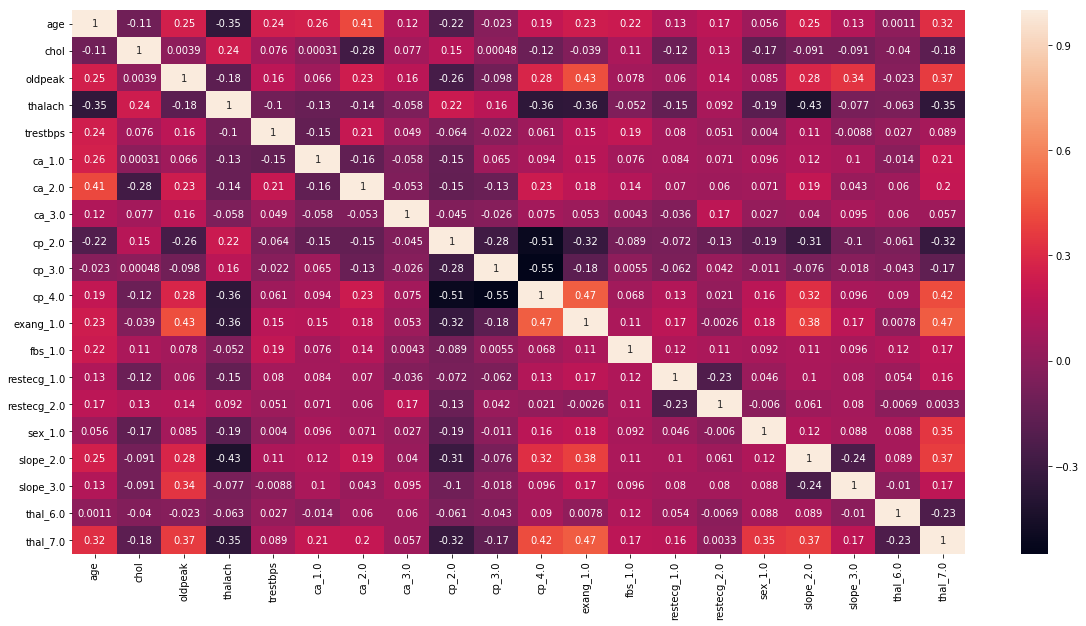

In [1027]:
plt.figure(figsize = (20,10))
sns.heatmap(trainX_fully_preprocessed.corr(),annot = True)
plt.show()

In [1028]:
# split the data into the X and Y variables
YY = heart_disease_df["target"].copy()
XX = heart_disease_df.drop("target", axis=1)

In [1029]:
Numeric_d = pd.DataFrame(XX)
Numeric_d['target'] = YY
corr= Numeric_d.corr()
corr_y = abs(corr["target"])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

target    1.0
Name: target, dtype: float64

In [1030]:
# Logistic regression model
logm1 = sm.GLM(trainY,(sm.add_constant(trainX_fully_preprocessed)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      679
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -175.69
Date:                Fri, 10 Apr 2020   Deviance:                       351.39
Time:                        19:34:42   Pearson chi2:                     849.
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.1047      0.673     -6.103      0.000      -5.423      -2.787
age            -0.6655      0.186     -3.569      0.000      -1.031      -0.300
chol           -0.4233      0.150     -2.825      0.005      -0.717      -0.130
oldpeak         0.0391      0.173      0.226      0.821      -0.301       0.379
thalach        -0.2126      0.168     -1.268      0.205      -0.541       0.116
trestbps        0.3536      0.142      2.497      0.013       0.076       0.631
ca_1.0          3.2892      0.499      6.588      0.000       2.311       4.268
ca_2.0          3.2171      0.657      4.898      0.000       1.930       4.504
ca_3.0         24.6826   1.85e+04      0.001      0.999   -3.62e+04    3.63e+04
cp_2.0         -0.6769      0.621     -1.090      0.276      -1.895       0.541
cp_3.0         -0.1918      0.542     -0.354      0.723      -1.254       0.870
cp_4.0          1.1127      0.532      2.091      0.037       0.070       2.156
exang_1.0       0.9292      0.343      2.708      0.007       0.257       1.602
fbs_1.0         0.3639      0.430      0.845      0.398      -0.480       1.208
restecg_1.0     0.0508      0.381      0.133      0.894      -0.696       0.797
restecg_2.0     0.0740      0.382      0.194      0.846      -0.674       0.822
sex_1.0         0.3145      0.379      0.830      0.407      -0.429       1.058
slope_2.0       1.8952      0.331      5.726      0.000       1.247       2.544
slope_3.0       0.2027      0.631      0.321      0.748      -1.035       1.440
thal_6.0        1.0109      0.537      1.881      0.060      -0.042       2.064
thal_7.0        2.5469      0.344      7.397      0.000       1.872       3.222
===============================================================================
"""

In [1031]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


### Cross validation scores

In [1032]:
def scores_table(model, subtitle):
    scores = ['accuracy', 'roc_auc']
    res = []
    for sc in scores:
        scores = cross_val_score(model, trainX_fully_preprocessed, trainY, cv = 5, scoring = sc)
        res.append(scores)
    df = pd.DataFrame(res).T
    df.loc['mean'] = df.mean()
    df.loc['std'] = df.std()
    df= df.rename(columns={0: 'accuracy', 1:'roc_auc'})

    trace = go.Table(
        header=dict(values=['<b>Fold', '<b>Accuracy','<b>Roc auc'],
                    line = dict(color='#7D7F80'),
                    fill = dict(color='#a1c3d1'),
                    align = ['center'],
                    font = dict(size = 15)),
        cells=dict(values=[('1','2','3','4','5','mean', 'std'),
                           np.round(df['accuracy'],3),
                           np.round(df['roc_auc'],3)],
                   line = dict(color='#7D7F80'),
                   fill = dict(color='#EDFAFF'),
                   align = ['center'], font = dict(size = 15)))

    layout = dict(width=800, height=400, title = '<b>Cross Validation - 5 folds</b><br>'+subtitle, font = dict(size = 15))
    fig = dict(data=[trace], layout=layout)

    py.iplot(fig, filename = 'styled_table')

In [1033]:
# Find best hyperparameters (roc_auc)
random_state = 42
log_clf = LogisticRegression(random_state = random_state)
param_grid = {'class_weight' : ['balanced', None], 
                'penalty' : ['l2','l1'],  
                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1)

grid.fit(trainX_fully_preprocessed, trainY)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    4.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [1034]:
print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

best_parameters = grid.best_params_

Best Score:0.9528571428571428
Best Parameters: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}


In [1035]:
log_clf = LogisticRegression(**best_parameters)
log_clf.fit(trainX_fully_preprocessed, trainY)

selector = RFE(log_clf, 25, step=1)
selector.fit(trainX_fully_preprocessed, trainY)
scores_table(selector, 'selector_clf')

In [1036]:
# scores of GridSearch CV
scores = grid.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.010772  9.770385e-04         0.003192        0.000399   0.001   
1       0.001796  3.987570e-04         0.000000        0.000000   0.001   
2       0.007979  6.641573e-07         0.003191        0.000746   0.001   
3       0.001596  4.892594e-04         0.000000        0.000000   0.001   
4       0.008378  4.891430e-04         0.003192        0.000399    0.01   

  param_class_weight param_penalty  \
0           balanced            l2   
1           balanced            l1   
2               None            l2   
3               None            l1   
4           balanced            l2   

                                              params  split0_test_score  \
0  {'C': 0.001, 'class_weight': 'balanced', 'pena...           0.895714   
1  {'C': 0.001, 'class_weight': 'balanced', 'pena...                NaN   
2  {'C': 0.001, 'class_weight': None, 'penalty': ...           0.895714   
3  {'C': 0.001, 'class_weight': None, 'penalty': ...                NaN   
4  {'C': 0.01, 'class_weight': 'balanced', 'penal...           0.916531   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.922041           0.866327           0.895306           0.944898   
1                NaN                NaN                NaN                NaN   
2           0.922041           0.866327           0.895306           0.944898   
3                NaN                NaN                NaN                NaN   
4           0.931429           0.892449           0.916122           0.966939   

   mean_test_score  std_test_score  rank_test_score  
0         0.904857        0.026676               13  
1              NaN             NaN               26  
2         0.904857        0.026676               13  
3              NaN             NaN               25  
4         0.924694        0.024535               11

In [1037]:
log_Reg = LogisticRegression(C=100, class_weight='balanced', penalty='l2')

In [1038]:
rfe = RFE(log_Reg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(trainX_fully_preprocessed, trainY)

In [1039]:
rfe.support_

array([ True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True])

In [1040]:
list(zip(trainX_fully_preprocessed.columns, rfe.support_, rfe.ranking_))

[('age', True, 1),
 ('chol', True, 1),
 ('oldpeak', False, 6),
 ('thalach', False, 3),
 ('trestbps', True, 1),
 ('ca_1.0', True, 1),
 ('ca_2.0', True, 1),
 ('ca_3.0', True, 1),
 ('cp_2.0', True, 1),
 ('cp_3.0', False, 2),
 ('cp_4.0', True, 1),
 ('exang_1.0', True, 1),
 ('fbs_1.0', True, 1),
 ('restecg_1.0', False, 5),
 ('restecg_2.0', False, 4),
 ('sex_1.0', True, 1),
 ('slope_2.0', True, 1),
 ('slope_3.0', True, 1),
 ('thal_6.0', True, 1),
 ('thal_7.0', True, 1)]

In [1041]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), trainX_fully_preprocessed.columns)))

Features sorted by their rank:
[(1, 'age'), (1, 'ca_1.0'), (1, 'ca_2.0'), (1, 'ca_3.0'), (1, 'chol'), (1, 'cp_2.0'), (1, 'cp_4.0'), (1, 'exang_1.0'), (1, 'fbs_1.0'), (1, 'sex_1.0'), (1, 'slope_2.0'), (1, 'slope_3.0'), (1, 'thal_6.0'), (1, 'thal_7.0'), (1, 'trestbps'), (2, 'cp_3.0'), (3, 'thalach'), (4, 'restecg_2.0'), (5, 'restecg_1.0'), (6, 'oldpeak')]


In [1042]:
col = trainX_fully_preprocessed.columns[rfe.support_]

In [1043]:
col

Index(['age', 'chol', 'trestbps', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'cp_2.0',
       'cp_4.0', 'exang_1.0', 'fbs_1.0', 'sex_1.0', 'slope_2.0', 'slope_3.0',
       'thal_6.0', 'thal_7.0'],
      dtype='object')

In [1044]:
trainX_fully_preprocessed.columns[~rfe.support_]

Index(['oldpeak', 'thalach', 'cp_3.0', 'restecg_1.0', 'restecg_2.0'], dtype='object')

##### Assessing the model with StatsModels

In [1045]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      684
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -176.56
Date:                Fri, 10 Apr 2020   Deviance:                       353.12
Time:                        19:36:54   Pearson chi2:                     820.
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4160      0.477     -9.249      0.000      -5.352      -3.480
age           -0.5915      0.172     -3.442      0.001      -0.928      -0.255
chol          -0.4560      0.142     -3.213      0.001      -0.734      -0.178
trestbps       0.3707      0.141      2.633      0.008       0.095       0.647
ca_1.0         3.2454      0.489      6.630      0.000       2.286       4.205
ca_2.0         3.1411      0.630      4.983      0.000       1.906       4.377
ca_3.0        24.8237   1.83e+04      0.001      0.999   -3.58e+04    3.58e+04
cp_2.0        -0.4817      0.457     -1.053      0.292      -1.378       0.415
cp_4.0         1.3370      0.326      4.103      0.000       0.698       1.976
exang_1.0      0.9945      0.327      3.041      0.002       0.354       1.635
fbs_1.0        0.3165      0.427      0.741      0.459      -0.520       1.153
sex_1.0        0.3939      0.372      1.058      0.290      -0.336       1.123
slope_2.0      2.0437      0.306      6.669      0.000       1.443       2.644
slope_3.0      0.3642      0.561      0.649      0.516      -0.736       1.464
thal_6.0       1.0110      0.536      1.887      0.059      -0.039       2.061
thal_7.0       2.5275      0.336      7.514      0.000       1.868       3.187
==============================================================================
"""

In [1046]:
col

Index(['age', 'chol', 'trestbps', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'cp_2.0',
       'cp_4.0', 'exang_1.0', 'fbs_1.0', 'sex_1.0', 'slope_2.0', 'slope_3.0',
       'thal_6.0', 'thal_7.0'],
      dtype='object')

##### exclude the high p value (Should be near to 0.03)

In [1047]:
col = ['age', 'chol', 'trestbps', 'ca_1.0', 'ca_2.0', 'cp_2.0',
       'cp_4.0', 'exang_1.0', 'fbs_1.0', 'sex_1.0', 'slope_2.0', 'slope_3.0',
       'thal_6.0', 'thal_7.0']

In [1048]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      685
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -187.86
Date:                Fri, 10 Apr 2020   Deviance:                       375.71
Time:                        19:38:00   Pearson chi2:                     720.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2119      0.454     -9.274      0.000      -5.102      -3.322
age           -0.4008      0.159     -2.524      0.012      -0.712      -0.090
chol          -0.3902      0.138     -2.825      0.005      -0.661      -0.120
trestbps       0.3390      0.137      2.477      0.013       0.071       0.607
ca_1.0         2.8977      0.470      6.164      0.000       1.976       3.819
ca_2.0         2.7402      0.608      4.507      0.000       1.548       3.932
cp_2.0        -0.4585      0.438     -1.047      0.295      -1.317       0.400
cp_4.0         1.3389      0.315      4.251      0.000       0.722       1.956
exang_1.0      0.9672      0.314      3.083      0.002       0.352       1.582
fbs_1.0        0.1846      0.414      0.446      0.655      -0.626       0.995
sex_1.0        0.4789      0.356      1.346      0.178      -0.218       1.176
slope_2.0      1.9859      0.295      6.726      0.000       1.407       2.565
slope_3.0      0.6125      0.530      1.155      0.248      -0.427       1.652
thal_6.0       1.1755      0.509      2.308      0.021       0.177       2.174
thal_7.0       2.3895      0.320      7.478      0.000       1.763       3.016
==============================================================================
"""

In [1049]:
col = ['age', 'chol', 'trestbps', 'ca_1.0', 'ca_2.0', 'cp_2.0',
       'cp_4.0', 'exang_1.0', 'sex_1.0', 'slope_2.0', 'slope_3.0',
       'thal_6.0', 'thal_7.0']

In [1050]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      686
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -187.96
Date:                Fri, 10 Apr 2020   Deviance:                       375.91
Time:                        19:38:44   Pearson chi2:                     717.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2046      0.455     -9.247      0.000      -5.096      -3.313
age           -0.3959      0.158     -2.500      0.012      -0.706      -0.085
chol          -0.3796      0.136     -2.794      0.005      -0.646      -0.113
trestbps       0.3467      0.136      2.557      0.011       0.081       0.613
ca_1.0         2.9035      0.469      6.189      0.000       1.984       3.823
ca_2.0         2.7491      0.609      4.516      0.000       1.556       3.942
cp_2.0        -0.4634      0.437     -1.060      0.289      -1.320       0.393
cp_4.0         1.3280      0.314      4.230      0.000       0.713       1.943
exang_1.0      0.9664      0.314      3.080      0.002       0.351       1.581
sex_1.0        0.4908      0.356      1.380      0.168      -0.206       1.188
slope_2.0      1.9857      0.295      6.721      0.000       1.407       2.565
slope_3.0      0.6293      0.528      1.191      0.234      -0.406       1.665
thal_6.0       1.2006      0.506      2.373      0.018       0.209       2.192
thal_7.0       2.4093      0.317      7.600      0.000       1.788       3.031
==============================================================================
"""

In [1052]:
col = ['age', 'chol', 'trestbps', 'ca_1.0', 'ca_2.0',
       'cp_4.0', 'exang_1.0', 'sex_1.0', 'slope_2.0', 'slope_3.0',
       'thal_6.0', 'thal_7.0']

In [1053]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      687
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -188.53
Date:                Fri, 10 Apr 2020   Deviance:                       377.06
Time:                        19:39:38   Pearson chi2:                     761.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4088      0.420    -10.497      0.000      -5.232      -3.586
age           -0.3906      0.158     -2.468      0.014      -0.701      -0.080
chol          -0.3854      0.136     -2.842      0.004      -0.651      -0.120
trestbps       0.3447      0.135      2.547      0.011       0.079       0.610
ca_1.0         2.9395      0.468      6.279      0.000       2.022       3.857
ca_2.0         2.8096      0.607      4.627      0.000       1.619       4.000
cp_4.0         1.4696      0.287      5.119      0.000       0.907       2.032
exang_1.0      0.9789      0.314      3.121      0.002       0.364       1.594
sex_1.0        0.5357      0.354      1.515      0.130      -0.157       1.229
slope_2.0      2.0246      0.293      6.903      0.000       1.450       2.600
slope_3.0      0.6675      0.530      1.259      0.208      -0.371       1.706
thal_6.0       1.1663      0.505      2.311      0.021       0.177       2.155
thal_7.0       2.4092      0.317      7.599      0.000       1.788       3.031
==============================================================================
"""

In [1055]:
col = ['age', 'chol', 'trestbps', 'ca_1.0', 'ca_2.0',
       'cp_4.0', 'exang_1.0', 'sex_1.0', 'slope_2.0',
       'thal_6.0', 'thal_7.0']

In [1056]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      688
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -189.34
Date:                Fri, 10 Apr 2020   Deviance:                       378.68
Time:                        19:40:26   Pearson chi2:                     750.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3403      0.413    -10.520      0.000      -5.149      -3.532
age           -0.3612      0.156     -2.312      0.021      -0.667      -0.055
chol          -0.4028      0.135     -2.988      0.003      -0.667      -0.139
trestbps       0.3374      0.135      2.501      0.012       0.073       0.602
ca_1.0         2.9408      0.465      6.319      0.000       2.029       3.853
ca_2.0         2.7835      0.603      4.613      0.000       1.601       3.966
cp_4.0         1.4633      0.286      5.119      0.000       0.903       2.024
exang_1.0      1.0489      0.309      3.397      0.001       0.444       1.654
sex_1.0        0.5449      0.353      1.545      0.122      -0.146       1.236
slope_2.0      1.9054      0.277      6.879      0.000       1.362       2.448
thal_6.0       1.1897      0.505      2.355      0.019       0.199       2.180
thal_7.0       2.4551      0.315      7.806      0.000       1.839       3.072
==============================================================================
"""

In [1057]:
col = ['age', 'chol', 'trestbps', 'ca_1.0', 'ca_2.0',
       'cp_4.0', 'exang_1.0', 'slope_2.0',
       'thal_6.0', 'thal_7.0']

In [1058]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      689
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -190.54
Date:                Fri, 10 Apr 2020   Deviance:                       381.08
Time:                        19:40:54   Pearson chi2:                     786.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9976      0.333    -12.018      0.000      -4.650      -3.346
age           -0.3762      0.156     -2.416      0.016      -0.681      -0.071
chol          -0.4212      0.134     -3.138      0.002      -0.684      -0.158
trestbps       0.3251      0.135      2.411      0.016       0.061       0.589
ca_1.0         2.9531      0.461      6.401      0.000       2.049       3.857
ca_2.0         2.7763      0.599      4.639      0.000       1.603       3.949
cp_4.0         1.4353      0.284      5.059      0.000       0.879       1.991
exang_1.0      1.0530      0.308      3.423      0.001       0.450       1.656
slope_2.0      1.8785      0.275      6.840      0.000       1.340       2.417
thal_6.0       1.3838      0.493      2.804      0.005       0.417       2.351
thal_7.0       2.6337      0.297      8.879      0.000       2.052       3.215
==============================================================================
"""

##### Checking VIFs

In [1059]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = trainX_fully_preprocessed[col].columns
vif['VIF'] = [variance_inflation_factor(trainX_fully_preprocessed[col].values, i) for i in range(trainX_fully_preprocessed[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   thal_7.0  3.04
5     cp_4.0  2.74
6  exang_1.0  2.41
7  slope_2.0  2.28
4     ca_2.0  1.62
3     ca_1.0  1.45
0        age  1.35
8   thal_6.0  1.19
2   trestbps  1.17
1       chol  1.11

In [1061]:
def scoreplot(yactual, ypredict):
    confusion_mat = confusion_matrix(yactual, ypredict)
    print('Confusion Matrix : \n', confusion_mat)
    accuracy = accuracy_score(yactual, ypredict)
    print('Accuracy = {}'.format(accuracy))
    lr_f1_score = f1_score(yactual, ypredict)
    print('F1 Score = {}'.format(lr_f1_score))
    sensitivity = confusion_mat[0,0]/(confusion_mat[0,0]+confusion_mat[1,0])
    print('Sensitivity : ', sensitivity )
    specificity = confusion_mat[1,1]/(confusion_mat[1,1]+confusion_mat[0,1])
    print('Specificity : ', specificity)
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(yactual,ypredict)
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(yactual,ypredict)))
    fpr,tpr,threshold = roc_curve(yactual,ypredict)
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

### Neural Network

### Tune Batch Size and Number of Epochs

In [69]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [136]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', get_f1])
    return model

In [137]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [139]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [140]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8973 using {'batch_size': 10, 'epochs': 100}
mean=0.833, std=0.01954 using {'batch_size': 10, 'epochs': 10}
mean=0.8841, std=0.01433 using {'batch_size': 10, 'epochs': 50}
mean=0.8973, std=0.009682 using {'batch_size': 10, 'epochs': 100}
mean=0.8213, std=0.06734 using {'batch_size': 20, 'epochs': 10}
mean=0.8737, std=0.01693 using {'batch_size': 20, 'epochs': 50}
mean=0.8956, std=0.01693 using {'batch_size': 20, 'epochs': 100}
mean=0.7573, std=0.03488 using {'batch_size': 40, 'epochs': 10}
mean=0.8554, std=0.01723 using {'batch_size': 40, 'epochs': 50}
mean=0.8856, std=0.01998 using {'batch_size': 40, 'epochs': 100}
mean=0.783, std=0.04356 using {'batch_size': 60, 'epochs': 10}
mean=0.8577, std=0.02477 using {'batch_size': 60, 'epochs': 50}
mean=0.8653, std=0.02141 using {'batch_size': 60, 'epochs': 100}
mean=0.7345, std=0.07253 using {'batch_size': 80, 'epochs': 10}
mean=0.851, std=0.01442 using {'batch_size': 80, 'epochs': 50}
mean=0.8689, std=0.01881 using {'batc

### Tune the Training Optimization Algorithm

In [141]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [142]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [144]:
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [145]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.899 using {'optimizer': 'Adadelta'}
mean=0.8852, std=0.01257 using {'optimizer': 'SGD'}
mean=0.8928, std=0.009506 using {'optimizer': 'RMSprop'}
mean=0.872, std=0.02609 using {'optimizer': 'Adagrad'}
mean=0.899, std=0.01075 using {'optimizer': 'Adadelta'}
mean=0.8963, std=0.0114 using {'optimizer': 'Adam'}
mean=0.8913, std=0.01069 using {'optimizer': 'Adamax'}
mean=0.8792, std=0.01085 using {'optimizer': 'Nadam'}


### Tune Learning Rate and Momentum

In [146]:
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [147]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [148]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [149]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8979 using {'learn_rate': 0.01, 'momentum': 0.8}
mean=0.8279, std=0.04487 using {'learn_rate': 0.001, 'momentum': 0.0}
mean=0.8266, std=0.04666 using {'learn_rate': 0.001, 'momentum': 0.2}
mean=0.814, std=0.05913 using {'learn_rate': 0.001, 'momentum': 0.4}
mean=0.8605, std=0.0171 using {'learn_rate': 0.001, 'momentum': 0.6}
mean=0.8716, std=0.008466 using {'learn_rate': 0.001, 'momentum': 0.8}
mean=0.8916, std=0.02046 using {'learn_rate': 0.001, 'momentum': 0.9}
mean=0.8773, std=0.02429 using {'learn_rate': 0.01, 'momentum': 0.0}
mean=0.8892, std=0.006711 using {'learn_rate': 0.01, 'momentum': 0.2}
mean=0.8805, std=0.01797 using {'learn_rate': 0.01, 'momentum': 0.4}
mean=0.8852, std=0.009049 using {'learn_rate': 0.01, 'momentum': 0.6}
mean=0.8979, std=0.01968 using {'learn_rate': 0.01, 'momentum': 0.8}
mean=0.8835, std=0.009808 using {'learn_rate': 0.01, 'momentum': 0.9}
mean=0.8617, std=0.02488 using {'learn_rate': 0.1, 'momentum': 0.0}
mean=0.8776, std=0.01269 us

### Tune Network Weight Initialization

In [150]:
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.8), metrics=['accuracy', get_f1])
    return model

In [151]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [152]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [153]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8979 using {'init_mode': 'normal'}
mean=0.8892, std=0.00476 using {'init_mode': 'uniform'}
mean=0.8896, std=0.008849 using {'init_mode': 'lecun_uniform'}
mean=0.8979, std=0.009734 using {'init_mode': 'normal'}
mean=0.1872, std=0.2648 using {'init_mode': 'zero'}
mean=0.8829, std=0.01375 using {'init_mode': 'glorot_normal'}
mean=0.8795, std=0.01187 using {'init_mode': 'glorot_uniform'}
mean=0.8729, std=0.02699 using {'init_mode': 'he_normal'}
mean=0.8936, std=0.01939 using {'init_mode': 'he_uniform'}


### Tune the Neuron Activation Function

In [154]:
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='normal', activation=activation))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.8), metrics=['accuracy', get_f1])
    return model

In [155]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [156]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [157]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8942 using {'activation': 'softsign'}
mean=0.8811, std=0.01419 using {'activation': 'softmax'}
mean=0.8867, std=0.01323 using {'activation': 'softplus'}
mean=0.8942, std=0.01028 using {'activation': 'softsign'}
mean=0.886, std=0.02065 using {'activation': 'relu'}
mean=0.894, std=0.0156 using {'activation': 'tanh'}
mean=0.886, std=0.01504 using {'activation': 'sigmoid'}
mean=0.8832, std=0.01663 using {'activation': 'hard_sigmoid'}
mean=0.8835, std=0.01068 using {'activation': 'linear'}


### Tune Dropout Regularization

In [158]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='normal', activation='softsign', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.8), metrics=['accuracy', get_f1])
    return model

In [159]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [160]:
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

2020-03-28 16:30:59,671 [WARNING]  From C:\Users\totan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [161]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9011 using {'dropout_rate': 0.3, 'weight_constraint': 4}
mean=0.8955, std=0.008189 using {'dropout_rate': 0.0, 'weight_constraint': 1}
mean=0.8898, std=0.009455 using {'dropout_rate': 0.0, 'weight_constraint': 2}
mean=0.893, std=0.00728 using {'dropout_rate': 0.0, 'weight_constraint': 3}
mean=0.8971, std=0.007149 using {'dropout_rate': 0.0, 'weight_constraint': 4}
mean=0.8891, std=0.008373 using {'dropout_rate': 0.0, 'weight_constraint': 5}
mean=0.8924, std=0.006992 using {'dropout_rate': 0.1, 'weight_constraint': 1}
mean=0.8915, std=0.008304 using {'dropout_rate': 0.1, 'weight_constraint': 2}
mean=0.8934, std=0.00954 using {'dropout_rate': 0.1, 'weight_constraint': 3}
mean=0.8981, std=0.01063 using {'dropout_rate': 0.1, 'weight_constraint': 4}
mean=0.8886, std=0.01299 using {'dropout_rate': 0.1, 'weight_constraint': 5}
mean=0.8946, std=0.009616 using {'dropout_rate': 0.2, 'weight_constraint': 1}
mean=0.8984, std=0.01072 using {'dropout_rate': 0.2, 'weight_constrain

### Tune the Number of Neurons in the Hidden Layer

In [162]:
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=10, kernel_initializer='normal', activation='softsign', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.3))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.8), metrics=['accuracy', get_f1])
    return model

In [163]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [164]:
# define the grid search parameters
neurons = [1, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [165]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8962 using {'neurons': 6}
mean=0.8885, std=0.01414 using {'neurons': 1}
mean=0.8915, std=0.009843 using {'neurons': 5}
mean=0.8962, std=0.009379 using {'neurons': 6}
mean=0.8877, std=0.01492 using {'neurons': 7}
mean=0.8921, std=0.003845 using {'neurons': 8}
mean=0.8928, std=0.007571 using {'neurons': 9}
mean=0.8922, std=0.006145 using {'neurons': 10}
mean=0.895, std=0.008401 using {'neurons': 15}
mean=0.8947, std=0.007917 using {'neurons': 20}
mean=0.8851, std=0.0118 using {'neurons': 25}
mean=0.8951, std=0.01145 using {'neurons': 30}


In [170]:
preds_nn_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[314  36]
 [ 32 318]]
Accuracy = 0.9028571428571428
F1 Score = 0.903409090909091
Sensitivity :  0.9075144508670521
Specificity :  0.8983050847457628


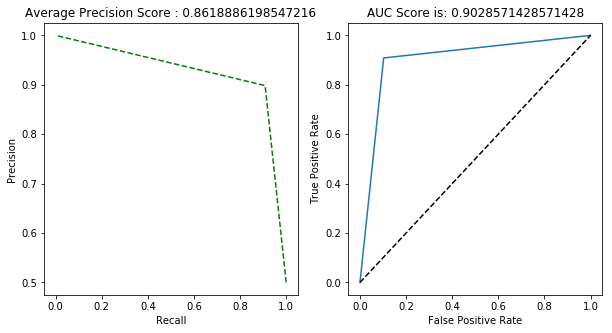

In [172]:
scoreplot(trainY, preds_nn_train)

In [173]:
preds_nn_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 94  23]
 [ 14 145]]
Accuracy = 0.8659420289855072
F1 Score = 0.8868501529051989
Sensitivity :  0.8703703703703703
Specificity :  0.8630952380952381


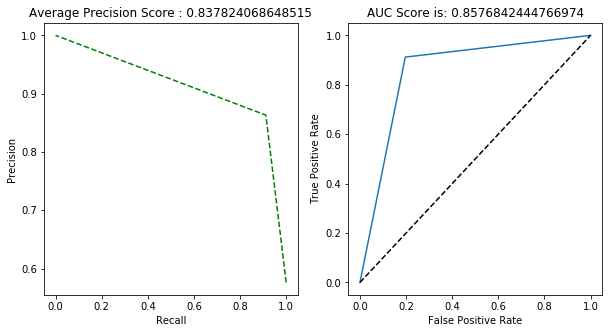

In [174]:
scoreplot(testY, preds_nn_test)

### Stochastic Gradient Descent (SGD)

In [175]:
model = SGDClassifier(loss="hinge", penalty="l2")

In [176]:
model.fit(trainX_fully_preprocessed[col], trainY)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [177]:
model.score(trainX_fully_preprocessed[col], trainY)

0.8728571428571429

In [178]:
model.score(testX_fully_preprocessed[col], testY)

0.822463768115942

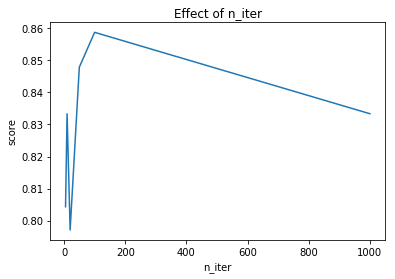

In [179]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(trainX_fully_preprocessed[col], trainY)
    scores.append(model.score(testX_fully_preprocessed[col], testY))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

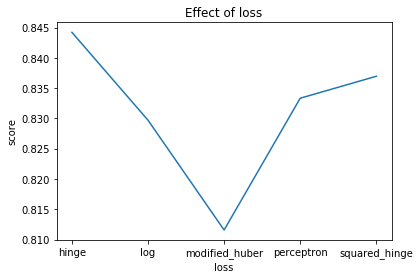

In [180]:
# losses
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    model = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    model.fit(trainX_fully_preprocessed[col], trainY)
    scores.append(model.score(testX_fully_preprocessed[col], testY))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [181]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "penalty" : ["l2", "l1", "none"],
    "l1_ratio": [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1]
}

model = SGDClassifier(random_state=0, class_weight='balanced')
grid = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [182]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9054 using {'alpha': 0.01, 'l1_ratio': 0, 'loss': 'modified_huber', 'penalty': 'l1'}
mean=0.8334, std=0.03658 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l2'}
mean=0.8877, std=0.03098 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l1'}
mean=0.8801, std=0.05069 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'none'}
mean=0.8773, std=0.04441 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l2'}
mean=0.8871, std=0.04263 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l1'}
mean=0.8733, std=0.04631 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'none'}
mean=0.8242, std=0.03614 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l2'}
mean=0.8493, std=0.05328 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l1'}
mean=0.8461, std=0.04776 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty

In [184]:
pred_sgd_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[315  35]
 [ 36 314]]
Accuracy = 0.8985714285714286
F1 Score = 0.8984263233190272
Sensitivity :  0.8974358974358975
Specificity :  0.8997134670487106


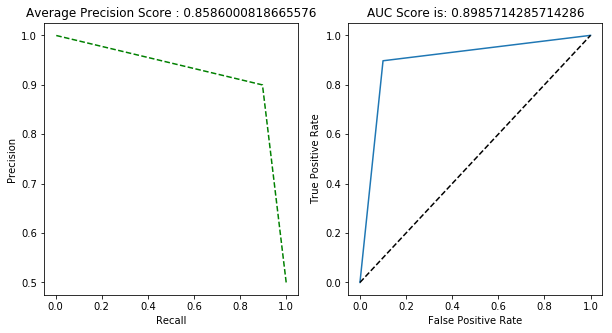

In [185]:
scoreplot(trainY, pred_sgd_train)

In [186]:
pred_sgd_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 93  24]
 [ 19 140]]
Accuracy = 0.8442028985507246
F1 Score = 0.8668730650154799
Sensitivity :  0.8303571428571429
Specificity :  0.8536585365853658


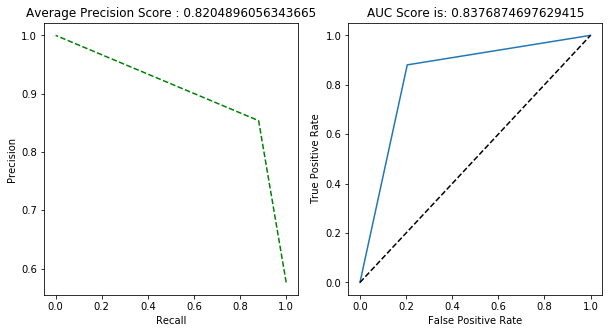

In [187]:
scoreplot(testY, pred_sgd_test)

### XGBoost

In [236]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [237]:
# fit model on training data
eval_set = [(trainX_fully_preprocessed[col], trainY), (testX_fully_preprocessed[col], testY)]
xgb_model.fit(trainX_fully_preprocessed[col], trainY, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(testX_fully_preprocessed[col])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = xgb_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

[0]	validation_0-error:0.102857	validation_0-logloss:0.630445	validation_1-error:0.213768	validation_1-logloss:0.643575
[1]	validation_0-error:0.092857	validation_0-logloss:0.58012	validation_1-error:0.184783	validation_1-logloss:0.603815
[2]	validation_0-error:0.092857	validation_0-logloss:0.539272	validation_1-error:0.173913	validation_1-logloss:0.572718
[3]	validation_0-error:0.08	validation_0-logloss:0.50113	validation_1-error:0.15942	validation_1-logloss:0.54391
[4]	validation_0-error:0.08	validation_0-logloss:0.468609	validation_1-error:0.152174	validation_1-logloss:0.518223
[5]	validation_0-error:0.084286	validation_0-logloss:0.441638	validation_1-error:0.15942	validation_1-logloss:0.49827
[6]	validation_0-error:0.078571	validation_0-logloss:0.41651	validation_1-error:0.148551	validation_1-logloss:0.478449
[7]	validation_0-error:0.08	validation_0-logloss:0.394898	validation_1-error:0.155797	validation_1-logloss:0.464469
[8]	validation_0-error:0.075714	validation_0-logloss:0.3760

[69]	validation_0-error:0.025714	validation_0-logloss:0.106813	validation_1-error:0.123188	validation_1-logloss:0.312525
[70]	validation_0-error:0.025714	validation_0-logloss:0.106097	validation_1-error:0.126812	validation_1-logloss:0.314438
[71]	validation_0-error:0.025714	validation_0-logloss:0.10509	validation_1-error:0.126812	validation_1-logloss:0.315149
[72]	validation_0-error:0.025714	validation_0-logloss:0.104486	validation_1-error:0.126812	validation_1-logloss:0.315979
[73]	validation_0-error:0.025714	validation_0-logloss:0.103167	validation_1-error:0.123188	validation_1-logloss:0.318806
[74]	validation_0-error:0.025714	validation_0-logloss:0.101926	validation_1-error:0.123188	validation_1-logloss:0.316901
[75]	validation_0-error:0.025714	validation_0-logloss:0.101007	validation_1-error:0.130435	validation_1-logloss:0.318038
[76]	validation_0-error:0.025714	validation_0-logloss:0.099901	validation_1-error:0.123188	validation_1-logloss:0.317881
[77]	validation_0-error:0.025714	

[138]	validation_0-error:0.007143	validation_0-logloss:0.061843	validation_1-error:0.130435	validation_1-logloss:0.343934
[139]	validation_0-error:0.007143	validation_0-logloss:0.061301	validation_1-error:0.130435	validation_1-logloss:0.345923
Accuracy: 86.96%


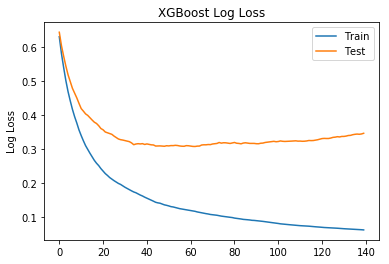

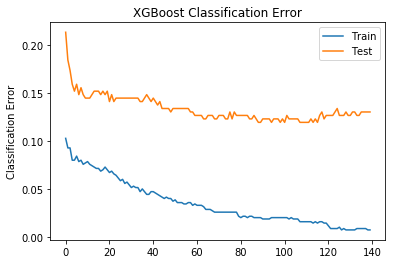

In [238]:
from matplotlib import pyplot
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [239]:
eval_set = [(testX_fully_preprocessed[col], testY)]
xgb_model.fit(trainX_fully_preprocessed[col], trainY, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(testX_fully_preprocessed[col])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.643575
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.603815
[2]	validation_0-logloss:0.572718
[3]	validation_0-logloss:0.54391
[4]	validation_0-logloss:0.518223
[5]	validation_0-logloss:0.49827
[6]	validation_0-logloss:0.478449
[7]	validation_0-logloss:0.464469
[8]	validation_0-logloss:0.45006
[9]	validation_0-logloss:0.433943
[10]	validation_0-logloss:0.418709
[11]	validation_0-logloss:0.411162
[12]	validation_0-logloss:0.403102
[13]	validation_0-logloss:0.39854
[14]	validation_0-logloss:0.391555
[15]	validation_0-logloss:0.384924
[16]	validation_0-logloss:0.378639
[17]	validation_0-logloss:0.374801
[18]	validation_0-logloss:0.368219
[19]	validation_0-logloss:0.359932
[20]	validation_0-logloss:0.356201
[21]	validation_0-logloss:0.349746
[22]	validation_0-logloss:0.347472
[23]	validation_0-logloss:0.345151
[24]	validation_0-logloss:0.342849
[25]	validation_0-logloss:0.33767
[26]	validation_0-logloss:0.333436
[2

In [275]:
fit_params = {"eval_set":[(testX_fully_preprocessed[col], testY)],
          "early_stopping_rounds":5,
          "eval_metric":"logloss"}

### Tune max_depth and min_child_weight

In [276]:
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.8s


[0]	validation_0-logloss:0.645086
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.607032
[2]	validation_0-logloss:0.575616
[3]	validation_0-logloss:0.548086
[4]	validation_0-logloss:0.525812
[5]	validation_0-logloss:0.507345
[6]	validation_0-logloss:0.489816
[7]	validation_0-logloss:0.474825
[8]	validation_0-logloss:0.460566
[9]	validation_0-logloss:0.447708
[10]	validation_0-logloss:0.433385
[11]	validation_0-logloss:0.425605
[12]	validation_0-logloss:0.416884
[13]	validation_0-logloss:0.411978
[14]	validation_0-logloss:0.404684
[15]	validation_0-logloss:0.398365
[16]	validation_0-logloss:0.391077
[17]	validation_0-logloss:0.383965
[18]	validation_0-logloss:0.379082
[19]	validation_0-logloss:0.373025
[20]	validation_0-logloss:0.36788
[21]	validation_0-logloss:0.360826
[22]	validation_0-logloss:0.358787
[23]	validation_0-logloss:0.355727


[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    5.7s finished


[24]	validation_0-logloss:0.35407
[25]	validation_0-logloss:0.350422
[26]	validation_0-logloss:0.34925
[27]	validation_0-logloss:0.345385
[28]	validation_0-logloss:0.341863
[29]	validation_0-logloss:0.339292
[30]	validation_0-logloss:0.338535
[31]	validation_0-logloss:0.333635
[32]	validation_0-logloss:0.329724
[33]	validation_0-logloss:0.326161
[34]	validation_0-logloss:0.322032
[35]	validation_0-logloss:0.322582
[36]	validation_0-logloss:0.322574
[37]	validation_0-logloss:0.323482
[38]	validation_0-logloss:0.322383
[39]	validation_0-logloss:0.318551
[40]	validation_0-logloss:0.316788
[41]	validation_0-logloss:0.315571
[42]	validation_0-logloss:0.313008
[43]	validation_0-logloss:0.311369
[44]	validation_0-logloss:0.306217
[45]	validation_0-logloss:0.306146
[46]	validation_0-logloss:0.305363
[47]	validation_0-logloss:0.305266
[48]	validation_0-logloss:0.305381
[49]	validation_0-logloss:0.302568
[50]	validation_0-logloss:0.302357
[51]	validation_0-logloss:0.301728
[52]	validation_0-logl

In [277]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9019 using {'max_depth': 3, 'min_child_weight': 3}
mean=0.8928, std=0.0271 using {'max_depth': 3, 'min_child_weight': 1}
mean=0.9019, std=0.02687 using {'max_depth': 3, 'min_child_weight': 3}
mean=0.8876, std=0.02886 using {'max_depth': 3, 'min_child_weight': 5}
mean=0.9003, std=0.02863 using {'max_depth': 5, 'min_child_weight': 1}
mean=0.8951, std=0.02468 using {'max_depth': 5, 'min_child_weight': 3}
mean=0.888, std=0.03259 using {'max_depth': 5, 'min_child_weight': 5}
mean=0.8964, std=0.02482 using {'max_depth': 7, 'min_child_weight': 1}
mean=0.8935, std=0.02541 using {'max_depth': 7, 'min_child_weight': 3}
mean=0.8908, std=0.02978 using {'max_depth': 7, 'min_child_weight': 5}
mean=0.9002, std=0.02113 using {'max_depth': 9, 'min_child_weight': 1}
mean=0.8935, std=0.02541 using {'max_depth': 9, 'min_child_weight': 3}
mean=0.8908, std=0.02978 using {'max_depth': 9, 'min_child_weight': 5}


### Tune gamma

In [278]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [279]:
param_test = {
 'gamma':[i/10.0 for i in range(0,5)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.645086
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.607032
[2]	validation_0-logloss:0.575616
[3]	validation_0-logloss:0.548086
[4]	validation_0-logloss:0.525812
[5]	validation_0-logloss:0.507345
[6]	validation_0-logloss:0.489816
[7]	validation_0-logloss:0.474825
[8]	validation_0-logloss:0.460566
[9]	validation_0-logloss:0.447708
[10]	validation_0-logloss:0.433384
[11]	validation_0-logloss:0.425605
[12]	validation_0-logloss:0.416884


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.7s finished


[13]	validation_0-logloss:0.411978
[14]	validation_0-logloss:0.404684
[15]	validation_0-logloss:0.398365
[16]	validation_0-logloss:0.391077
[17]	validation_0-logloss:0.383965
[18]	validation_0-logloss:0.379082
[19]	validation_0-logloss:0.373025
[20]	validation_0-logloss:0.36788
[21]	validation_0-logloss:0.360826
[22]	validation_0-logloss:0.358787
[23]	validation_0-logloss:0.355727
[24]	validation_0-logloss:0.35407
[25]	validation_0-logloss:0.350422
[26]	validation_0-logloss:0.34925
[27]	validation_0-logloss:0.345385
[28]	validation_0-logloss:0.341863
[29]	validation_0-logloss:0.339292
[30]	validation_0-logloss:0.338535
[31]	validation_0-logloss:0.333635
[32]	validation_0-logloss:0.329724
[33]	validation_0-logloss:0.326161
[34]	validation_0-logloss:0.322032
[35]	validation_0-logloss:0.322582
[36]	validation_0-logloss:0.322574
[37]	validation_0-logloss:0.323482
[38]	validation_0-logloss:0.322383
[39]	validation_0-logloss:0.318551
[40]	validation_0-logloss:0.316788
[41]	validation_0-loglo

In [280]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9019 using {'gamma': 0.0}
mean=0.9019, std=0.02687 using {'gamma': 0.0}
mean=0.9003, std=0.02518 using {'gamma': 0.1}
mean=0.8991, std=0.02653 using {'gamma': 0.2}
mean=0.8989, std=0.02337 using {'gamma': 0.3}
mean=0.8994, std=0.02663 using {'gamma': 0.4}


### Tune subsample and colsample_bytree

In [281]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=3, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [282]:
param_test = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s


[0]	validation_0-logloss:0.645011
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.605524
[2]	validation_0-logloss:0.57361
[3]	validation_0-logloss:0.544935
[4]	validation_0-logloss:0.520789
[5]	validation_0-logloss:0.504138
[6]	validation_0-logloss:0.487161
[7]	validation_0-logloss:0.474363
[8]	validation_0-logloss:0.461629
[9]	validation_0-logloss:0.449994
[10]	validation_0-logloss:0.437086
[11]	validation_0-logloss:0.427899
[12]	validation_0-logloss:0.418556
[13]	validation_0-logloss:0.412725
[14]	validation_0-logloss:0.40639
[15]	validation_0-logloss:0.400355
[16]	validation_0-logloss:0.393151
[17]	validation_0-logloss:0.389535
[18]	validation_0-logloss:0.384076
[19]	validation_0-logloss:0.37905
[20]	validation_0-logloss:0.375762
[21]	validation_0-logloss:0.368388
[22]	validation_0-logloss:0.363469
[23]	validation_0-logloss:0.360302
[24]	validation_0-logloss:0.358882


[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    8.8s finished


[25]	validation_0-logloss:0.354148
[26]	validation_0-logloss:0.350732
[27]	validation_0-logloss:0.348805
[28]	validation_0-logloss:0.344216
[29]	validation_0-logloss:0.341904
[30]	validation_0-logloss:0.341168
[31]	validation_0-logloss:0.340358
[32]	validation_0-logloss:0.340008
[33]	validation_0-logloss:0.334517
[34]	validation_0-logloss:0.331365
[35]	validation_0-logloss:0.33066
[36]	validation_0-logloss:0.329188
[37]	validation_0-logloss:0.329371
[38]	validation_0-logloss:0.327923
[39]	validation_0-logloss:0.323805
[40]	validation_0-logloss:0.322634
[41]	validation_0-logloss:0.321742
[42]	validation_0-logloss:0.319732
[43]	validation_0-logloss:0.318349
[44]	validation_0-logloss:0.318794
[45]	validation_0-logloss:0.318821
[46]	validation_0-logloss:0.318323
[47]	validation_0-logloss:0.317816
[48]	validation_0-logloss:0.31852
[49]	validation_0-logloss:0.317975
[50]	validation_0-logloss:0.318154
[51]	validation_0-logloss:0.31777
[52]	validation_0-logloss:0.314899
[53]	validation_0-loglo

In [283]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9024 using {'colsample_bytree': 0.8, 'subsample': 0.7}
mean=0.8883, std=0.03391 using {'colsample_bytree': 0.6, 'subsample': 0.6}
mean=0.8913, std=0.03118 using {'colsample_bytree': 0.6, 'subsample': 0.7}
mean=0.896, std=0.03335 using {'colsample_bytree': 0.6, 'subsample': 0.8}
mean=0.899, std=0.02767 using {'colsample_bytree': 0.6, 'subsample': 0.9}
mean=0.886, std=0.02744 using {'colsample_bytree': 0.7, 'subsample': 0.6}
mean=0.8931, std=0.02691 using {'colsample_bytree': 0.7, 'subsample': 0.7}
mean=0.8991, std=0.0269 using {'colsample_bytree': 0.7, 'subsample': 0.8}
mean=0.8962, std=0.03108 using {'colsample_bytree': 0.7, 'subsample': 0.9}
mean=0.8956, std=0.0288 using {'colsample_bytree': 0.8, 'subsample': 0.6}
mean=0.9024, std=0.02733 using {'colsample_bytree': 0.8, 'subsample': 0.7}
mean=0.9019, std=0.02687 using {'colsample_bytree': 0.8, 'subsample': 0.8}
mean=0.9005, std=0.02634 using {'colsample_bytree': 0.8, 'subsample': 0.9}
mean=0.8888, std=0.03195 using

### Tuning Regularization Parameters

In [284]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=3, gamma=0.0, subsample=0.7, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [285]:
param_test = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.645011
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.605524
[2]	validation_0-logloss:0.57361
[3]	validation_0-logloss:0.544935
[4]	validation_0-logloss:0.520789
[5]	validation_0-logloss:0.504139
[6]	validation_0-logloss:0.487161
[7]	validation_0-logloss:0.474363
[8]	validation_0-logloss:0.461629
[9]	validation_0-logloss:0.449994
[10]	validation_0-logloss:0.437086
[11]	validation_0-logloss:0.427899
[12]	validation_0-logloss:0.418556
[13]	validation_0-logloss:0.412726
[14]	validation_0-logloss:0.40639
[15]	validation_0-logloss:0.400355
[16]	validation_0-logloss:0.393151
[17]	validation_0-logloss:0.389535
[18]	validation_0-logloss:0.384076
[19]	validation_0-logloss:0.37905
[20]	validation_0-logloss:0.375762
[21]	validation_0-logloss:0.368388
[22]	validation_0-logloss:0.363469
[23]	validation_0-logloss:0.360302
[24]	validation_0-logloss:0.358882
[25]	validation_0-logloss:0.354148
[26]	validation_0-logloss:0.350732
[

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    2.0s finished


[36]	validation_0-logloss:0.329189
[37]	validation_0-logloss:0.329371
[38]	validation_0-logloss:0.327923
[39]	validation_0-logloss:0.323806
[40]	validation_0-logloss:0.322634
[41]	validation_0-logloss:0.321742
[42]	validation_0-logloss:0.319733
[43]	validation_0-logloss:0.318349
[44]	validation_0-logloss:0.318794
[45]	validation_0-logloss:0.318822
[46]	validation_0-logloss:0.318323
[47]	validation_0-logloss:0.317816
[48]	validation_0-logloss:0.31852
[49]	validation_0-logloss:0.317975
[50]	validation_0-logloss:0.318154
[51]	validation_0-logloss:0.31777
[52]	validation_0-logloss:0.314899
[53]	validation_0-logloss:0.31515
[54]	validation_0-logloss:0.312456
[55]	validation_0-logloss:0.310737
[56]	validation_0-logloss:0.309482
[57]	validation_0-logloss:0.308484
[58]	validation_0-logloss:0.306968
[59]	validation_0-logloss:0.304162
[60]	validation_0-logloss:0.302237
[61]	validation_0-logloss:0.301926
[62]	validation_0-logloss:0.302461
[63]	validation_0-logloss:0.303536
[64]	validation_0-loglo

In [286]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9024 using {'reg_alpha': 1e-05}
mean=0.9024, std=0.02733 using {'reg_alpha': 1e-05}
mean=0.8996, std=0.02672 using {'reg_alpha': 0.01}
mean=0.8972, std=0.02807 using {'reg_alpha': 0.1}
mean=0.8993, std=0.02885 using {'reg_alpha': 1}
mean=0.0, std=0.0 using {'reg_alpha': 100}


### Reducing Learning Rate

In [287]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3, reg_alpha=1e-05,
                        min_child_weight=3, gamma=0.0, subsample=0.7, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [288]:
param_test = {
 'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.645011
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.605524
[2]	validation_0-logloss:0.57361
[3]	validation_0-logloss:0.544935
[4]	validation_0-logloss:0.520789
[5]	validation_0-logloss:0.504139
[6]	validation_0-logloss:0.487161
[7]	validation_0-logloss:0.474363
[8]	validation_0-logloss:0.461629
[9]	validation_0-logloss:0.449994
[10]	validation_0-logloss:0.437086
[11]	validation_0-logloss:0.427899
[12]	validation_0-logloss:0.418556
[13]	validation_0-logloss:0.412726
[14]	validation_0-logloss:0.40639
[15]	validation_0-logloss:0.400355
[16]	validation_0-logloss:0.393151
[17]	validation_0-logloss:0.389535
[18]	validation_0-logloss:0.384076
[19]	validation_0-logloss:0.37905
[20]	validation_0-logloss:0.375762
[21]	validation_0-logloss:0.368388
[22]	validation_0-logloss:0.363469
[23]	validation_0-logloss:0.360302
[24]	validation_0-logloss:0.358882
[25]	validation_0-logloss:0.354148
[26]	validation_0-logloss:0.350732
[

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.0s finished


[29]	validation_0-logloss:0.341905
[30]	validation_0-logloss:0.341168
[31]	validation_0-logloss:0.340358
[32]	validation_0-logloss:0.340009
[33]	validation_0-logloss:0.334517
[34]	validation_0-logloss:0.331366
[35]	validation_0-logloss:0.33066
[36]	validation_0-logloss:0.329189
[37]	validation_0-logloss:0.329371
[38]	validation_0-logloss:0.327923
[39]	validation_0-logloss:0.323806
[40]	validation_0-logloss:0.322634
[41]	validation_0-logloss:0.321742
[42]	validation_0-logloss:0.319733
[43]	validation_0-logloss:0.318349
[44]	validation_0-logloss:0.318794
[45]	validation_0-logloss:0.318822
[46]	validation_0-logloss:0.318323
[47]	validation_0-logloss:0.317816
[48]	validation_0-logloss:0.31852
[49]	validation_0-logloss:0.317975
[50]	validation_0-logloss:0.318154
[51]	validation_0-logloss:0.31777
[52]	validation_0-logloss:0.314899
[53]	validation_0-logloss:0.31515
[54]	validation_0-logloss:0.312456
[55]	validation_0-logloss:0.310737
[56]	validation_0-logloss:0.309482
[57]	validation_0-loglos

In [289]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9024 using {'learning_rate': 0.1}
mean=0.8756, std=0.02738 using {'learning_rate': 0.001}
mean=0.8789, std=0.02566 using {'learning_rate': 0.01}
mean=0.9024, std=0.02733 using {'learning_rate': 0.1}
mean=0.9013, std=0.02759 using {'learning_rate': 0.2}
mean=0.8945, std=0.02539 using {'learning_rate': 0.3}


In [290]:
xgb_pred_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[326  24]
 [ 22 328]]
Accuracy = 0.9342857142857143
F1 Score = 0.9344729344729346
Sensitivity :  0.9367816091954023
Specificity :  0.9318181818181818


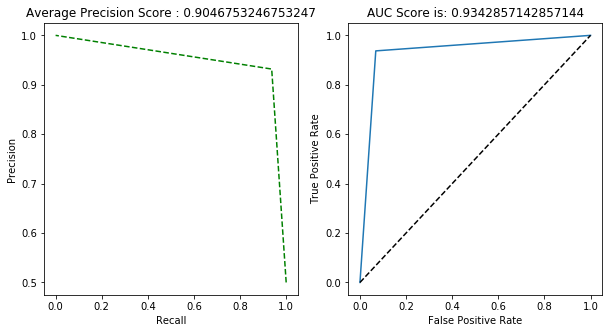

In [291]:
scoreplot(trainY, xgb_pred_train)

In [292]:
xgb_pred_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[100  17]
 [ 15 144]]
Accuracy = 0.8840579710144928
F1 Score = 0.9
Sensitivity :  0.8695652173913043
Specificity :  0.8944099378881988


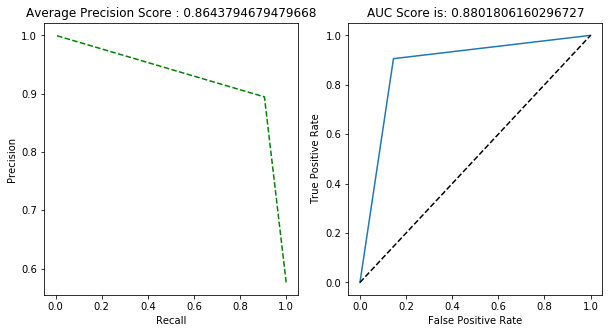

In [293]:
scoreplot(testY, xgb_pred_test)

### LightGBM

In [327]:
model = lgb.LGBMClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [[1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

In [328]:
grid = GridSearchCV(estimator =model, param_grid = param_grid, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 644 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done 1644 tasks      | elapsed:   44.1s
[Parallel(n_jobs=4)]: Done 3044 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 4844 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 6156 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 7456 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 8956 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 10656 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 12556 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 14580 out of 14580 | elapsed:  7.0min finished


In [329]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9006 using {'colsample_bytree': 0.7, 'max_depth': 15, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.3, 'reg_lambda': 1.2, 'subsample': 0.8, 'subsample_freq': 20}
mean=0.8908, std=0.04231 using {'colsample_bytree': 0.7, 'max_depth': 15, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.7, 'subsample_freq': 20}
mean=0.8933, std=0.03259 using {'colsample_bytree': 0.7, 'max_depth': 15, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.8, 'subsample_freq': 20}
mean=0.8951, std=0.0225 using {'colsample_bytree': 0.7, 'max_depth': 15, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.9, 'subsample_freq': 20}
mean=0.8894, std=0.04122 using {'colsample_bytree': 0.7, 'max_depth': 15, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 

mean=0.8946, std=0.02191 using {'colsample_bytree': 0.8, 'max_depth': 15, 'min_split_gain': 0.4, 'n_estimators': 400, 'num_leaves': 100, 'reg_alpha': 1.1, 'reg_lambda': 1.3, 'subsample': 0.9, 'subsample_freq': 20}
mean=0.8932, std=0.03626 using {'colsample_bytree': 0.8, 'max_depth': 15, 'min_split_gain': 0.4, 'n_estimators': 400, 'num_leaves': 100, 'reg_alpha': 1.2, 'reg_lambda': 1.1, 'subsample': 0.7, 'subsample_freq': 20}
mean=0.8941, std=0.0334 using {'colsample_bytree': 0.8, 'max_depth': 15, 'min_split_gain': 0.4, 'n_estimators': 400, 'num_leaves': 100, 'reg_alpha': 1.2, 'reg_lambda': 1.1, 'subsample': 0.8, 'subsample_freq': 20}
mean=0.8974, std=0.02196 using {'colsample_bytree': 0.8, 'max_depth': 15, 'min_split_gain': 0.4, 'n_estimators': 400, 'num_leaves': 100, 'reg_alpha': 1.2, 'reg_lambda': 1.1, 'subsample': 0.9, 'subsample_freq': 20}
mean=0.8895, std=0.03601 using {'colsample_bytree': 0.8, 'max_depth': 15, 'min_split_gain': 0.4, 'n_estimators': 400, 'num_leaves': 100, 'reg_alp

In [330]:
lgb_pred_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[319  31]
 [ 26 324]]
Accuracy = 0.9185714285714286
F1 Score = 0.9191489361702128
Sensitivity :  0.9246376811594202
Specificity :  0.9126760563380282


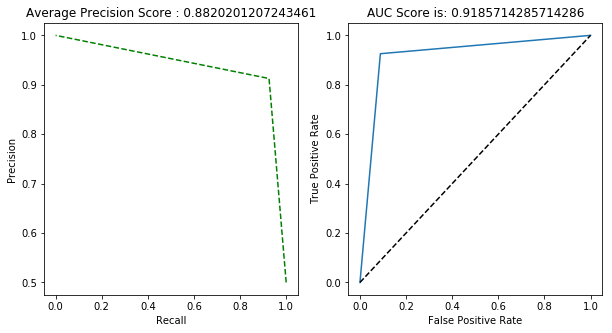

In [332]:
scoreplot(trainY, lgb_pred_train)

In [335]:
lgb_pred_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 94  23]
 [ 20 139]]
Accuracy = 0.8442028985507246
F1 Score = 0.8660436137071652
Sensitivity :  0.8245614035087719
Specificity :  0.8580246913580247


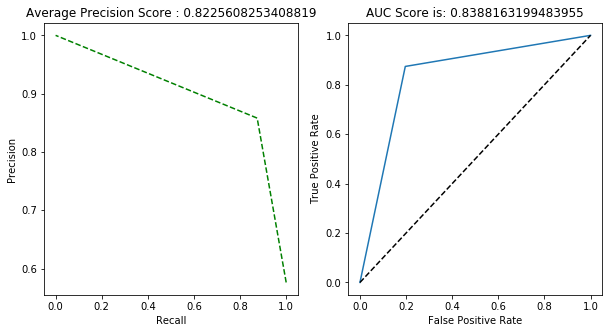

In [336]:
scoreplot(testY, lgb_pred_test)

### RFE with LinearSVC

In [1062]:
svm = LinearSVC()

In [1063]:
param_grid = {'loss' : ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"],  
                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  "penalty" : ["l2", "l1", "none"]}

In [1064]:
grid = GridSearchCV(estimator = svm, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1)

grid.fit(trainX_fully_preprocessed, trainY)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:    5.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'perceptron', 'squared_hinge'],
                         'penalty': ['l2', 'l1', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [1065]:
print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

best_parameters = grid.best_params_

Best Score:0.9528979591836736
Best Parameters: {'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2'}


In [1066]:
svm = LinearSVC(**best_parameters)

In [1067]:
rfe = RFE(svm, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(trainX_fully_preprocessed, trainY)

In [1068]:
rfe.support_

array([ True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True])

In [1069]:
list(zip(trainX_fully_preprocessed.columns, rfe.support_, rfe.ranking_))

[('age', True, 1),
 ('chol', True, 1),
 ('oldpeak', False, 6),
 ('thalach', False, 3),
 ('trestbps', True, 1),
 ('ca_1.0', True, 1),
 ('ca_2.0', True, 1),
 ('ca_3.0', True, 1),
 ('cp_2.0', True, 1),
 ('cp_3.0', False, 2),
 ('cp_4.0', True, 1),
 ('exang_1.0', True, 1),
 ('fbs_1.0', True, 1),
 ('restecg_1.0', False, 5),
 ('restecg_2.0', False, 4),
 ('sex_1.0', True, 1),
 ('slope_2.0', True, 1),
 ('slope_3.0', True, 1),
 ('thal_6.0', True, 1),
 ('thal_7.0', True, 1)]

In [1070]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), trainX_fully_preprocessed.columns)))

Features sorted by their rank:
[(1, 'age'), (1, 'ca_1.0'), (1, 'ca_2.0'), (1, 'ca_3.0'), (1, 'chol'), (1, 'cp_2.0'), (1, 'cp_4.0'), (1, 'exang_1.0'), (1, 'fbs_1.0'), (1, 'sex_1.0'), (1, 'slope_2.0'), (1, 'slope_3.0'), (1, 'thal_6.0'), (1, 'thal_7.0'), (1, 'trestbps'), (2, 'cp_3.0'), (3, 'thalach'), (4, 'restecg_2.0'), (5, 'restecg_1.0'), (6, 'oldpeak')]


In [302]:
col = trainX_fully_preprocessed.columns[rfe.support_]

In [303]:
col

Index(['age', 'chol', 'trestbps', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'cp_2.0',
       'cp_4.0', 'exang_1.0', 'fbs_1.0', 'sex_1.0', 'slope_2.0', 'slope_3.0',
       'thal_6.0', 'thal_7.0'],
      dtype='object')

In [304]:
trainX_fully_preprocessed.columns[~rfe.support_]

Index(['oldpeak', 'thalach', 'cp_3.0', 'restecg_1.0', 'restecg_2.0'], dtype='object')

#### Assessing the model with StatsModels

In [305]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      684
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -168.33
Date:                Sat, 28 Mar 2020   Deviance:                       336.66
Time:                        22:44:20   Pearson chi2:                     855.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6409      0.495     -9.369      0.000      -5.612      -3.670
age           -0.5587      0.175     -3.185      0.001      -0.903      -0.215
chol          -0.4344      0.142     -3.058      0.002      -0.713      -0.156
trestbps       0.3779      0.144      2.624      0.009       0.096       0.660
ca_1.0         3.5602      0.524      6.795      0.000       2.533       4.587
ca_2.0         2.9986      0.635      4.720      0.000       1.753       4.244
ca_3.0        23.9885   1.17e+04      0.002      0.998   -2.29e+04    2.29e+04
cp_2.0        -0.4562      0.467     -0.978      0.328      -1.371       0.458
cp_4.0         1.4741      0.335      4.396      0.000       0.817       2.131
exang_1.0      0.8707      0.330      2.635      0.008       0.223       1.518
fbs_1.0        0.3280      0.447      0.734      0.463      -0.548       1.204
sex_1.0        0.4334      0.377      1.149      0.251      -0.306       1.173
slope_2.0      2.1948      0.317      6.931      0.000       1.574       2.816
slope_3.0      0.6763      0.565      1.198      0.231      -0.430       1.783
thal_6.0       1.1296      0.547      2.064      0.039       0.057       2.202
thal_7.0       2.6518      0.346      7.672      0.000       1.974       3.329
==============================================================================
"""

In [306]:
col

Index(['age', 'chol', 'trestbps', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'cp_2.0',
       'cp_4.0', 'exang_1.0', 'fbs_1.0', 'sex_1.0', 'slope_2.0', 'slope_3.0',
       'thal_6.0', 'thal_7.0'],
      dtype='object')

#### exclude the high p value (Should be near to 0.03)

In [307]:
col = ['age', 'chol', 'trestbps', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'cp_2.0',
       'cp_4.0', 'exang_1.0', 'fbs_1.0', 'sex_1.0', 'slope_2.0', 'slope_3.0',
       'thal_6.0', 'thal_7.0']

In [308]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      684
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -168.33
Date:                Sat, 28 Mar 2020   Deviance:                       336.66
Time:                        22:44:50   Pearson chi2:                     855.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6409      0.495     -9.369      0.000      -5.612      -3.670
age           -0.5587      0.175     -3.185      0.001      -0.903      -0.215
chol          -0.4344      0.142     -3.058      0.002      -0.713      -0.156
trestbps       0.3779      0.144      2.624      0.009       0.096       0.660
ca_1.0         3.5602      0.524      6.795      0.000       2.533       4.587
ca_2.0         2.9986      0.635      4.720      0.000       1.753       4.244
ca_3.0        23.9885   1.17e+04      0.002      0.998   -2.29e+04    2.29e+04
cp_2.0        -0.4562      0.467     -0.978      0.328      -1.371       0.458
cp_4.0         1.4741      0.335      4.396      0.000       0.817       2.131
exang_1.0      0.8707      0.330      2.635      0.008       0.223       1.518
fbs_1.0        0.3280      0.447      0.734      0.463      -0.548       1.204
sex_1.0        0.4334      0.377      1.149      0.251      -0.306       1.173
slope_2.0      2.1948      0.317      6.931      0.000       1.574       2.816
slope_3.0      0.6763      0.565      1.198      0.231      -0.430       1.783
thal_6.0       1.1296      0.547      2.064      0.039       0.057       2.202
thal_7.0       2.6518      0.346      7.672      0.000       1.974       3.329
==============================================================================
"""

In [309]:
col = ['age', 'chol', 'ca_1.0', 'ca_2.0', 'cp_2.0',
       'cp_4.0', 'exang_1.0', 'fbs_1.0', 'sex_1.0', 'slope_2.0', 'slope_3.0',
       'thal_6.0', 'thal_7.0']

In [310]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      686
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -181.10
Date:                Sat, 28 Mar 2020   Deviance:                       362.21
Time:                        22:45:14   Pearson chi2:                     706.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3506      0.461     -9.434      0.000      -5.254      -3.447
age           -0.2972      0.156     -1.904      0.057      -0.603       0.009
chol          -0.3561      0.139     -2.554      0.011      -0.629      -0.083
ca_1.0         3.0084      0.496      6.062      0.000       2.036       3.981
ca_2.0         2.5723      0.615      4.185      0.000       1.368       3.777
cp_2.0        -0.4272      0.441     -0.969      0.333      -1.292       0.437
cp_4.0         1.3656      0.319      4.279      0.000       0.740       1.991
exang_1.0      0.8885      0.315      2.820      0.005       0.271       1.506
fbs_1.0        0.3378      0.420      0.804      0.421      -0.486       1.161
sex_1.0        0.4518      0.353      1.281      0.200      -0.239       1.143
slope_2.0      2.1804      0.305      7.139      0.000       1.582       2.779
slope_3.0      0.6646      0.540      1.232      0.218      -0.393       1.722
thal_6.0       1.2256      0.537      2.284      0.022       0.174       2.278
thal_7.0       2.5434      0.327      7.777      0.000       1.902       3.184
==============================================================================
"""

In [311]:
col = ['age', 'chol', 'ca_1.0', 'ca_2.0', 'cp_2.0',
       'cp_4.0', 'exang_1.0','sex_1.0', 'slope_2.0', 'slope_3.0',
       'thal_6.0', 'thal_7.0']

In [312]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      687
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -181.43
Date:                Sat, 28 Mar 2020   Deviance:                       362.86
Time:                        22:45:38   Pearson chi2:                     694.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3297      0.461     -9.386      0.000      -5.234      -3.426
age           -0.2826      0.155     -1.826      0.068      -0.586       0.021
chol          -0.3324      0.136     -2.445      0.014      -0.599      -0.066
ca_1.0         3.0060      0.495      6.075      0.000       2.036       3.976
ca_2.0         2.5677      0.616      4.165      0.000       1.359       3.776
cp_2.0        -0.4257      0.439     -0.970      0.332      -1.286       0.434
cp_4.0         1.3468      0.318      4.231      0.000       0.723       1.971
exang_1.0      0.8862      0.315      2.813      0.005       0.269       1.504
sex_1.0        0.4653      0.354      1.316      0.188      -0.228       1.158
slope_2.0      2.1729      0.305      7.115      0.000       1.574       2.771
slope_3.0      0.7081      0.537      1.320      0.187      -0.343       1.760
thal_6.0       1.2808      0.532      2.405      0.016       0.237       2.324
thal_7.0       2.5883      0.323      8.009      0.000       1.955       3.222
==============================================================================
"""

In [313]:
col = ['age', 'chol', 'ca_1.0', 'ca_2.0',
       'cp_4.0', 'exang_1.0','sex_1.0', 'slope_2.0', 'slope_3.0',
       'thal_6.0', 'thal_7.0']

In [314]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      688
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -181.91
Date:                Sat, 28 Mar 2020   Deviance:                       363.82
Time:                        22:46:00   Pearson chi2:                     741.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5179      0.426    -10.611      0.000      -5.352      -3.683
age           -0.2787      0.155     -1.799      0.072      -0.582       0.025
chol          -0.3367      0.136     -2.482      0.013      -0.603      -0.071
ca_1.0         3.0457      0.494      6.163      0.000       2.077       4.014
ca_2.0         2.6326      0.614      4.285      0.000       1.429       3.837
cp_4.0         1.4835      0.288      5.144      0.000       0.918       2.049
exang_1.0      0.8961      0.315      2.846      0.004       0.279       1.513
sex_1.0        0.4991      0.352      1.419      0.156      -0.190       1.189
slope_2.0      2.2135      0.303      7.301      0.000       1.619       2.808
slope_3.0      0.7491      0.538      1.393      0.164      -0.305       1.803
thal_6.0       1.2411      0.531      2.338      0.019       0.201       2.281
thal_7.0       2.5834      0.323      7.994      0.000       1.950       3.217
==============================================================================
"""

In [315]:
col = ['age', 'chol', 'ca_1.0', 'ca_2.0',
       'cp_4.0', 'exang_1.0','sex_1.0', 'slope_2.0',
       'thal_6.0', 'thal_7.0']

In [316]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      689
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.90
Date:                Sat, 28 Mar 2020   Deviance:                       365.81
Time:                        22:46:47   Pearson chi2:                     720.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4452      0.418    -10.628      0.000      -5.265      -3.625
age           -0.2483      0.153     -1.620      0.105      -0.549       0.052
chol          -0.3523      0.135     -2.607      0.009      -0.617      -0.087
ca_1.0         3.0653      0.494      6.207      0.000       2.097       4.033
ca_2.0         2.5928      0.604      4.292      0.000       1.409       3.777
cp_4.0         1.4865      0.288      5.169      0.000       0.923       2.050
exang_1.0      0.9636      0.311      3.101      0.002       0.354       1.573
sex_1.0        0.5147      0.350      1.469      0.142      -0.172       1.202
slope_2.0      2.0863      0.288      7.245      0.000       1.522       2.651
thal_6.0       1.2546      0.530      2.368      0.018       0.216       2.293
thal_7.0       2.6257      0.321      8.177      0.000       1.996       3.255
==============================================================================
"""

In [317]:
col = ['age', 'chol', 'ca_1.0', 'ca_2.0',
       'cp_4.0', 'exang_1.0','slope_2.0',
       'thal_6.0', 'thal_7.0']

In [318]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      690
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -183.99
Date:                Sat, 28 Mar 2020   Deviance:                       367.98
Time:                        22:47:28   Pearson chi2:                     766.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1246      0.343    -12.038      0.000      -4.796      -3.453
age           -0.2640      0.153     -1.731      0.084      -0.563       0.035
chol          -0.3743      0.134     -2.794      0.005      -0.637      -0.112
ca_1.0         3.0835      0.488      6.320      0.000       2.127       4.040
ca_2.0         2.5666      0.600      4.275      0.000       1.390       3.743
cp_4.0         1.4630      0.286      5.124      0.000       0.903       2.023
exang_1.0      0.9740      0.310      3.146      0.002       0.367       1.581
slope_2.0      2.0579      0.285      7.209      0.000       1.498       2.617
thal_6.0       1.4153      0.522      2.714      0.007       0.393       2.438
thal_7.0       2.7930      0.304      9.181      0.000       2.197       3.389
==============================================================================
"""

In [319]:
col = ['chol', 'ca_1.0', 'ca_2.0',
       'cp_4.0', 'exang_1.0','slope_2.0',
       'thal_6.0', 'thal_7.0']

In [320]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      691
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -185.51
Date:                Sat, 28 Mar 2020   Deviance:                       371.02
Time:                        22:48:10   Pearson chi2:                     706.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9951      0.331    -12.065      0.000      -4.644      -3.346
chol          -0.3842      0.132     -2.918      0.004      -0.642      -0.126
ca_1.0         2.8404      0.465      6.108      0.000       1.929       3.752
ca_2.0         2.2025      0.560      3.934      0.000       1.105       3.300
cp_4.0         1.4816      0.284      5.225      0.000       0.926       2.037
exang_1.0      0.9159      0.305      3.006      0.003       0.319       1.513
slope_2.0      2.0068      0.282      7.117      0.000       1.454       2.560
thal_6.0       1.4587      0.521      2.798      0.005       0.437       2.480
thal_7.0       2.7158      0.297      9.131      0.000       2.133       3.299
==============================================================================
"""

In [324]:
col = ['chol', 'ca_1.0', 'ca_2.0',
       'cp_4.0', 'exang_1.0','slope_2.0',
       'thal_6.0', 'thal_7.0']

In [325]:
X_train_sm = sm.add_constant(trainX_fully_preprocessed[col])
logm2 = sm.GLM(trainY,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      691
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -185.51
Date:                Sat, 28 Mar 2020   Deviance:                       371.02
Time:                        22:49:28   Pearson chi2:                     706.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9951      0.331    -12.065      0.000      -4.644      -3.346
chol          -0.3842      0.132     -2.918      0.004      -0.642      -0.126
ca_1.0         2.8404      0.465      6.108      0.000       1.929       3.752
ca_2.0         2.2025      0.560      3.934      0.000       1.105       3.300
cp_4.0         1.4816      0.284      5.225      0.000       0.926       2.037
exang_1.0      0.9159      0.305      3.006      0.003       0.319       1.513
slope_2.0      2.0068      0.282      7.117      0.000       1.454       2.560
thal_6.0       1.4587      0.521      2.798      0.005       0.437       2.480
thal_7.0       2.7158      0.297      9.131      0.000       2.133       3.299
==============================================================================
"""

In [326]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = trainX_fully_preprocessed[col].columns
vif['VIF'] = [variance_inflation_factor(trainX_fully_preprocessed[col].values, i) for i in range(trainX_fully_preprocessed[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7   thal_7.0  2.97
3     cp_4.0  2.64
4  exang_1.0  2.39
5  slope_2.0  2.27
1     ca_1.0  1.34
2     ca_2.0  1.33
6   thal_6.0  1.18
0       chol  1.08

### Neural Network

### Tune Batch Size and Number of Epochs

In [337]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', get_f1])
    return model

In [338]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [339]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [340]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8991 using {'batch_size': 10, 'epochs': 50}
mean=0.8619, std=0.01151 using {'batch_size': 10, 'epochs': 10}
mean=0.8991, std=0.01617 using {'batch_size': 10, 'epochs': 50}
mean=0.8929, std=0.01149 using {'batch_size': 10, 'epochs': 100}
mean=0.8192, std=0.03486 using {'batch_size': 20, 'epochs': 10}
mean=0.8877, std=0.01013 using {'batch_size': 20, 'epochs': 50}
mean=0.8841, std=0.01774 using {'batch_size': 20, 'epochs': 100}
mean=0.7528, std=0.086 using {'batch_size': 40, 'epochs': 10}
mean=0.8822, std=0.01329 using {'batch_size': 40, 'epochs': 50}
mean=0.8931, std=0.01033 using {'batch_size': 40, 'epochs': 100}
mean=0.5701, std=0.06781 using {'batch_size': 60, 'epochs': 10}
mean=0.8625, std=0.01241 using {'batch_size': 60, 'epochs': 50}
mean=0.8828, std=0.008289 using {'batch_size': 60, 'epochs': 100}
mean=0.4541, std=0.1663 using {'batch_size': 80, 'epochs': 10}
mean=0.8688, std=0.006806 using {'batch_size': 80, 'epochs': 50}
mean=0.8794, std=0.01434 using {'batc

### Tune the Training Optimization Algorithm

In [348]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [349]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

In [350]:
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x000002000307F588>>
Traceback (most recent call last):
  File "C:\Users\totan\Anaconda3\lib\site-packages\xgboost\core.py", line 892, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


In [351]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9005 using {'optimizer': 'Nadam'}
mean=0.8781, std=0.006741 using {'optimizer': 'SGD'}
mean=0.9002, std=0.01126 using {'optimizer': 'RMSprop'}
mean=0.8882, std=0.014 using {'optimizer': 'Adagrad'}
mean=0.8943, std=0.004059 using {'optimizer': 'Adadelta'}
mean=0.8946, std=0.01526 using {'optimizer': 'Adam'}
mean=0.8856, std=0.01236 using {'optimizer': 'Adamax'}
mean=0.9005, std=0.01311 using {'optimizer': 'Nadam'}


### Tune Learning Rate and Momentum

In [359]:
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [360]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

In [361]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [362]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8985 using {'learn_rate': 0.01, 'momentum': 0.8}
mean=0.758, std=0.09345 using {'learn_rate': 0.001, 'momentum': 0.0}
mean=0.7981, std=0.05489 using {'learn_rate': 0.001, 'momentum': 0.2}
mean=0.8151, std=0.01597 using {'learn_rate': 0.001, 'momentum': 0.4}
mean=0.8115, std=0.01337 using {'learn_rate': 0.001, 'momentum': 0.6}
mean=0.8692, std=0.02966 using {'learn_rate': 0.001, 'momentum': 0.8}
mean=0.8874, std=0.0109 using {'learn_rate': 0.001, 'momentum': 0.9}
mean=0.88, std=0.02594 using {'learn_rate': 0.01, 'momentum': 0.0}
mean=0.8806, std=0.01056 using {'learn_rate': 0.01, 'momentum': 0.2}
mean=0.8856, std=0.00569 using {'learn_rate': 0.01, 'momentum': 0.4}
mean=0.8962, std=0.01317 using {'learn_rate': 0.01, 'momentum': 0.6}
mean=0.8985, std=0.02374 using {'learn_rate': 0.01, 'momentum': 0.8}
mean=0.8938, std=0.01418 using {'learn_rate': 0.01, 'momentum': 0.9}
mean=0.8946, std=0.01843 using {'learn_rate': 0.1, 'momentum': 0.0}
mean=0.887, std=0.02906 using {'l

### Tune Network Weight Initialization

In [363]:
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy', get_f1])
    return model

In [364]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

In [365]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [366]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9054 using {'init_mode': 'glorot_normal'}
mean=0.8908, std=0.009577 using {'init_mode': 'uniform'}
mean=0.9025, std=0.009141 using {'init_mode': 'lecun_uniform'}
mean=0.8918, std=0.003987 using {'init_mode': 'normal'}
mean=0.1872, std=0.2648 using {'init_mode': 'zero'}
mean=0.9054, std=0.0204 using {'init_mode': 'glorot_normal'}
mean=0.9, std=0.01042 using {'init_mode': 'glorot_uniform'}
mean=0.9034, std=0.01293 using {'init_mode': 'he_normal'}
mean=0.8918, std=0.01698 using {'init_mode': 'he_uniform'}


### Tune the Neuron Activation Function

In [367]:
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='glorot_normal', activation=activation))
    model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy', get_f1])
    return model

In [368]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

In [369]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [370]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9054 using {'activation': 'relu'}
mean=0.8839, std=0.008338 using {'activation': 'softmax'}
mean=0.8892, std=0.005602 using {'activation': 'softplus'}
mean=0.8915, std=0.01491 using {'activation': 'softsign'}
mean=0.9054, std=0.009498 using {'activation': 'relu'}
mean=0.892, std=0.00562 using {'activation': 'tanh'}
mean=0.8971, std=0.007963 using {'activation': 'sigmoid'}
mean=0.8922, std=0.004187 using {'activation': 'hard_sigmoid'}
mean=0.8839, std=0.005722 using {'activation': 'linear'}


### Tune Dropout Regularization

In [372]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='glorot_normal', activation='relu', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy', get_f1])
    return model

In [373]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

In [374]:
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [375]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9046 using {'dropout_rate': 0.1, 'weight_constraint': 5}
mean=0.9016, std=0.01903 using {'dropout_rate': 0.0, 'weight_constraint': 1}
mean=0.8991, std=0.01329 using {'dropout_rate': 0.0, 'weight_constraint': 2}
mean=0.8963, std=0.01677 using {'dropout_rate': 0.0, 'weight_constraint': 3}
mean=0.9028, std=0.01594 using {'dropout_rate': 0.0, 'weight_constraint': 4}
mean=0.897, std=0.01067 using {'dropout_rate': 0.0, 'weight_constraint': 5}
mean=0.9046, std=0.01433 using {'dropout_rate': 0.1, 'weight_constraint': 1}
mean=0.8993, std=0.008115 using {'dropout_rate': 0.1, 'weight_constraint': 2}
mean=0.9023, std=0.01368 using {'dropout_rate': 0.1, 'weight_constraint': 3}
mean=0.8974, std=0.01512 using {'dropout_rate': 0.1, 'weight_constraint': 4}
mean=0.9046, std=0.01463 using {'dropout_rate': 0.1, 'weight_constraint': 5}
mean=0.8912, std=0.01343 using {'dropout_rate': 0.2, 'weight_constraint': 1}
mean=0.8873, std=0.0188 using {'dropout_rate': 0.2, 'weight_constraint': 2}


### Tune the Number of Neurons in the Hidden Layer

In [376]:
# Function to create model, required for KerasClassifier
def create_model(neurons=20):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=8, kernel_initializer='glorot_normal', activation='relu', kernel_constraint=maxnorm(5)))
    model.add(Dropout(0.1))
    model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy', get_f1])
    return model

In [377]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

In [378]:
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [379]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9042 using {'neurons': 20}
mean=0.8949, std=0.01116 using {'neurons': 1}
mean=0.8898, std=0.009479 using {'neurons': 5}
mean=0.9022, std=0.0142 using {'neurons': 10}
mean=0.8998, std=0.00957 using {'neurons': 15}
mean=0.9042, std=0.0148 using {'neurons': 20}
mean=0.896, std=0.0207 using {'neurons': 25}
mean=0.8979, std=0.01967 using {'neurons': 30}


In [380]:
preds_nn_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[321  29]
 [ 27 323]]
Accuracy = 0.92
F1 Score = 0.9202279202279201
Sensitivity :  0.9224137931034483
Specificity :  0.9176136363636364


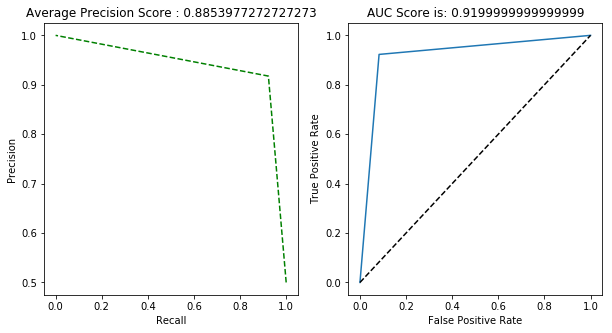

In [381]:
scoreplot(trainY, preds_nn_train)

In [382]:
preds_nn = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 97  20]
 [ 17 142]]
Accuracy = 0.8659420289855072
F1 Score = 0.8847352024922117
Sensitivity :  0.8508771929824561
Specificity :  0.8765432098765432


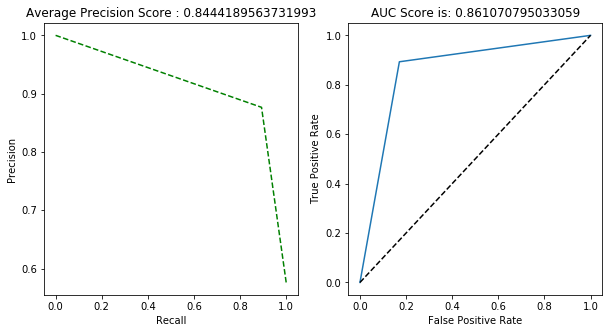

In [383]:
scoreplot(testY, preds_nn)

### Stochastic Gradient Descent (SGD)

In [384]:
model = SGDClassifier(loss="hinge", penalty="l2")

In [385]:
model.fit(trainX_fully_preprocessed[col], trainY)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [386]:
model.score(trainX_fully_preprocessed[col], trainY)

0.8785714285714286

In [387]:
model.score(testX_fully_preprocessed[col], testY)

0.8514492753623188

In [388]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "penalty" : ["l2", "l1", "none"],
    "l1_ratio": [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1]
}

model = SGDClassifier(random_state=0, class_weight='balanced')
grid = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [389]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8973 using {'alpha': 0.01, 'l1_ratio': 0, 'loss': 'modified_huber', 'penalty': 'none'}
mean=0.8617, std=0.06148 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l2'}
mean=0.8631, std=0.05144 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l1'}
mean=0.8705, std=0.0351 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'none'}
mean=0.8529, std=0.05134 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l2'}
mean=0.8729, std=0.0396 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l1'}
mean=0.8546, std=0.05101 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'none'}
mean=0.8284, std=0.04541 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l2'}
mean=0.8471, std=0.05628 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l1'}
mean=0.7677, std=0.2003 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty'

In [391]:
pred_sgd_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[316  34]
 [ 35 315]]
Accuracy = 0.9014285714285715
F1 Score = 0.9012875536480687
Sensitivity :  0.9002849002849003
Specificity :  0.9025787965616046


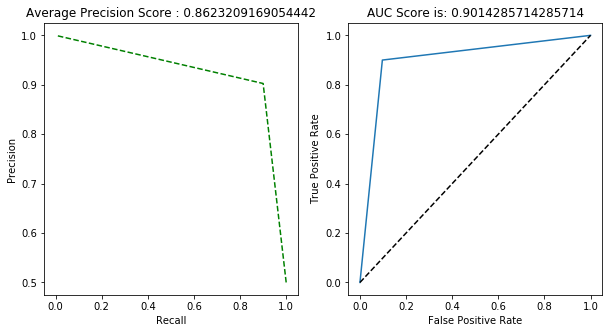

In [392]:
scoreplot(trainY, pred_sgd_train)

In [394]:
pred_sgd_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 93  24]
 [ 16 143]]
Accuracy = 0.855072463768116
F1 Score = 0.8773006134969326
Sensitivity :  0.8532110091743119
Specificity :  0.8562874251497006


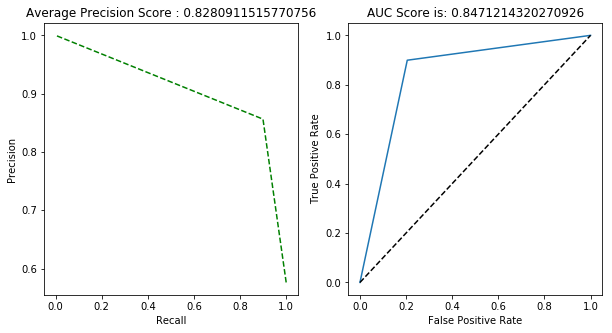

In [395]:
scoreplot(testY, pred_sgd_test)

### XGBoost

In [396]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [397]:
# fit model on training data
eval_set = [(trainX_fully_preprocessed[col], trainY), (testX_fully_preprocessed[col], testY)]
xgb_model.fit(trainX_fully_preprocessed[col], trainY, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(testX_fully_preprocessed[col])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = xgb_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

[0]	validation_0-error:0.11	validation_0-logloss:0.632578	validation_1-error:0.206522	validation_1-logloss:0.644476
[1]	validation_0-error:0.111429	validation_0-logloss:0.585544	validation_1-error:0.17029	validation_1-logloss:0.604443
[2]	validation_0-error:0.117143	validation_0-logloss:0.546492	validation_1-error:0.166667	validation_1-logloss:0.570166
[3]	validation_0-error:0.112857	validation_0-logloss:0.511094	validation_1-error:0.17029	validation_1-logloss:0.541316
[4]	validation_0-error:0.107143	validation_0-logloss:0.479714	validation_1-error:0.17029	validation_1-logloss:0.517526
[5]	validation_0-error:0.1	validation_0-logloss:0.450563	validation_1-error:0.163043	validation_1-logloss:0.497361
[6]	validation_0-error:0.088571	validation_0-logloss:0.427662	validation_1-error:0.173913	validation_1-logloss:0.480678
[7]	validation_0-error:0.088571	validation_0-logloss:0.408676	validation_1-error:0.181159	validation_1-logloss:0.465242
[8]	validation_0-error:0.088571	validation_0-logloss

[69]	validation_0-error:0.058571	validation_0-logloss:0.17533	validation_1-error:0.152174	validation_1-logloss:0.355474
[70]	validation_0-error:0.057143	validation_0-logloss:0.174308	validation_1-error:0.152174	validation_1-logloss:0.355188
[71]	validation_0-error:0.055714	validation_0-logloss:0.173237	validation_1-error:0.155797	validation_1-logloss:0.355403
[72]	validation_0-error:0.055714	validation_0-logloss:0.172099	validation_1-error:0.155797	validation_1-logloss:0.357028
[73]	validation_0-error:0.055714	validation_0-logloss:0.171499	validation_1-error:0.15942	validation_1-logloss:0.359068
[74]	validation_0-error:0.057143	validation_0-logloss:0.171295	validation_1-error:0.163043	validation_1-logloss:0.359575
[75]	validation_0-error:0.055714	validation_0-logloss:0.171097	validation_1-error:0.15942	validation_1-logloss:0.35956
[76]	validation_0-error:0.055714	validation_0-logloss:0.170807	validation_1-error:0.15942	validation_1-logloss:0.360149
[77]	validation_0-error:0.054286	vali

[138]	validation_0-error:0.045714	validation_0-logloss:0.144271	validation_1-error:0.166667	validation_1-logloss:0.398177
[139]	validation_0-error:0.045714	validation_0-logloss:0.143766	validation_1-error:0.166667	validation_1-logloss:0.39909
Accuracy: 83.33%


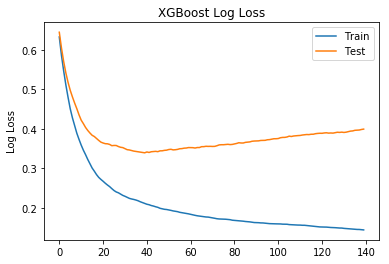

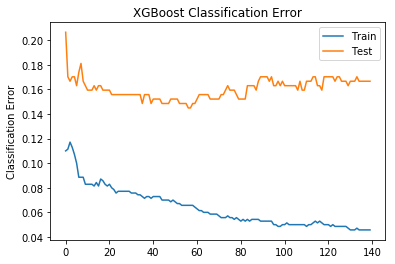

In [398]:
from matplotlib import pyplot
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [400]:
eval_set = [(testX_fully_preprocessed[col], testY)]
xgb_model.fit(trainX_fully_preprocessed[col], trainY, early_stopping_rounds=20, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(testX_fully_preprocessed[col])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.644476
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.604443
[2]	validation_0-logloss:0.570166
[3]	validation_0-logloss:0.541316
[4]	validation_0-logloss:0.517526
[5]	validation_0-logloss:0.497361
[6]	validation_0-logloss:0.480678
[7]	validation_0-logloss:0.465242
[8]	validation_0-logloss:0.450905
[9]	validation_0-logloss:0.435293
[10]	validation_0-logloss:0.42183
[11]	validation_0-logloss:0.412927
[12]	validation_0-logloss:0.403281
[13]	validation_0-logloss:0.39568
[14]	validation_0-logloss:0.389193
[15]	validation_0-logloss:0.383452
[16]	validation_0-logloss:0.380309
[17]	validation_0-logloss:0.375348
[18]	validation_0-logloss:0.370527
[19]	validation_0-logloss:0.366118
[20]	validation_0-logloss:0.36393
[21]	validation_0-logloss:0.362206
[22]	validation_0-logloss:0.361881
[23]	validation_0-logloss:0.360292
[24]	validation_0-logloss:0.357126
[25]	validation_0-logloss:0.357732
[26]	validation_0-logloss:0.35759
[

In [402]:
fit_params = {"eval_set":[(testX_fully_preprocessed[col], testY)],
          "early_stopping_rounds":20,
          "eval_metric":"logloss"}

### Tune max_depth and min_child_weight

In [403]:
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.2s


[0]	validation_0-logloss:0.645086
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.60666
[2]	validation_0-logloss:0.577319
[3]	validation_0-logloss:0.551709
[4]	validation_0-logloss:0.528471
[5]	validation_0-logloss:0.508929
[6]	validation_0-logloss:0.493168
[7]	validation_0-logloss:0.477705
[8]	validation_0-logloss:0.465681
[9]	validation_0-logloss:0.453777
[10]	validation_0-logloss:0.441021
[11]	validation_0-logloss:0.431947
[12]	validation_0-logloss:0.419848
[13]	validation_0-logloss:0.412097
[14]	validation_0-logloss:0.405187
[15]	validation_0-logloss:0.399837
[16]	validation_0-logloss:0.395095
[17]	validation_0-logloss:0.389742
[18]	validation_0-logloss:0.385199
[19]	validation_0-logloss:0.380933
[20]	validation_0-logloss:0.377561
[21]	validation_0-logloss:0.372022
[22]	validation_0-logloss:0.368843
[23]	validation_0-logloss:0.367354
[24]	validation_0-logloss:0.365216
[25]	validation_0-logloss:0.363953
[26]	validation_0-logloss:0.36094

[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   11.0s finished


[31]	validation_0-logloss:0.343075
[32]	validation_0-logloss:0.342804
[33]	validation_0-logloss:0.341459
[34]	validation_0-logloss:0.338746
[35]	validation_0-logloss:0.338273
[36]	validation_0-logloss:0.337548
[37]	validation_0-logloss:0.335657
[38]	validation_0-logloss:0.334524
[39]	validation_0-logloss:0.333075
[40]	validation_0-logloss:0.332599
[41]	validation_0-logloss:0.332049
[42]	validation_0-logloss:0.331666
[43]	validation_0-logloss:0.330265
[44]	validation_0-logloss:0.330195
[45]	validation_0-logloss:0.329818
[46]	validation_0-logloss:0.331133
[47]	validation_0-logloss:0.33144
[48]	validation_0-logloss:0.331656
[49]	validation_0-logloss:0.331488
[50]	validation_0-logloss:0.331675
[51]	validation_0-logloss:0.332351
[52]	validation_0-logloss:0.332125
[53]	validation_0-logloss:0.332315
[54]	validation_0-logloss:0.332249
[55]	validation_0-logloss:0.333843
[56]	validation_0-logloss:0.334046
[57]	validation_0-logloss:0.335086
[58]	validation_0-logloss:0.33489
[59]	validation_0-logl

In [404]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8979 using {'max_depth': 3, 'min_child_weight': 1}
mean=0.8979, std=0.02782 using {'max_depth': 3, 'min_child_weight': 1}
mean=0.8961, std=0.0217 using {'max_depth': 3, 'min_child_weight': 3}
mean=0.89, std=0.03401 using {'max_depth': 3, 'min_child_weight': 5}
mean=0.893, std=0.02575 using {'max_depth': 5, 'min_child_weight': 1}
mean=0.8909, std=0.02493 using {'max_depth': 5, 'min_child_weight': 3}
mean=0.8872, std=0.03218 using {'max_depth': 5, 'min_child_weight': 5}
mean=0.8944, std=0.0205 using {'max_depth': 7, 'min_child_weight': 1}
mean=0.8906, std=0.02214 using {'max_depth': 7, 'min_child_weight': 3}
mean=0.8872, std=0.03218 using {'max_depth': 7, 'min_child_weight': 5}
mean=0.8892, std=0.02307 using {'max_depth': 9, 'min_child_weight': 1}
mean=0.8921, std=0.02356 using {'max_depth': 9, 'min_child_weight': 3}
mean=0.8872, std=0.03218 using {'max_depth': 9, 'min_child_weight': 5}


### Tune gamma

In [405]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [406]:
param_test = {
 'gamma':[i/10.0 for i in range(0,5)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.645086
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.60666
[2]	validation_0-logloss:0.577319
[3]	validation_0-logloss:0.551709
[4]	validation_0-logloss:0.528471
[5]	validation_0-logloss:0.508929
[6]	validation_0-logloss:0.493168
[7]	validation_0-logloss:0.477705
[8]	validation_0-logloss:0.465681
[9]	validation_0-logloss:0.453777
[10]	validation_0-logloss:0.441021
[11]	validation_0-logloss:0.431947
[12]	validation_0-logloss:0.419848
[13]	validation_0-logloss:0.412097
[14]	validation_0-logloss:0.405187
[15]	validation_0-logloss:0.399837
[16]	validation_0-logloss:0.395095
[17]	validation_0-logloss:0.389742
[18]	validation_0-logloss:0.385199
[19]	validation_0-logloss:0.380933
[20]	validation_0-logloss:0.377561
[21]	validation_0-logloss:0.372022
[22]	validation_0-logloss:0.368843
[23]	validation_0-logloss:0.367354
[24]	validation_0-logloss:0.365216
[25]	validation_0-logloss:0.363953
[26]	validation_0-logloss:0.36094

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    2.8s finished


[40]	validation_0-logloss:0.332599
[41]	validation_0-logloss:0.332049
[42]	validation_0-logloss:0.331666
[43]	validation_0-logloss:0.330265
[44]	validation_0-logloss:0.330195
[45]	validation_0-logloss:0.329818
[46]	validation_0-logloss:0.331133
[47]	validation_0-logloss:0.33144
[48]	validation_0-logloss:0.331656
[49]	validation_0-logloss:0.331488
[50]	validation_0-logloss:0.331675
[51]	validation_0-logloss:0.332351
[52]	validation_0-logloss:0.332125
[53]	validation_0-logloss:0.332315
[54]	validation_0-logloss:0.332249
[55]	validation_0-logloss:0.333843
[56]	validation_0-logloss:0.334046
[57]	validation_0-logloss:0.335086
[58]	validation_0-logloss:0.33489
[59]	validation_0-logloss:0.334333
[60]	validation_0-logloss:0.333391
[61]	validation_0-logloss:0.332311
[62]	validation_0-logloss:0.331611
[63]	validation_0-logloss:0.333255
[64]	validation_0-logloss:0.333333
[65]	validation_0-logloss:0.332963
Stopping. Best iteration:
[45]	validation_0-logloss:0.329818



In [407]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8979 using {'gamma': 0.0}
mean=0.8979, std=0.02782 using {'gamma': 0.0}
mean=0.896, std=0.02788 using {'gamma': 0.1}
mean=0.8979, std=0.02821 using {'gamma': 0.2}
mean=0.8955, std=0.02427 using {'gamma': 0.3}
mean=0.8944, std=0.02637 using {'gamma': 0.4}


### Tune subsample and colsample_bytree

In [408]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [409]:
param_test = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s


[0]	validation_0-logloss:0.644946
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.607031
[2]	validation_0-logloss:0.576873
[3]	validation_0-logloss:0.551381
[4]	validation_0-logloss:0.528475
[5]	validation_0-logloss:0.509612
[6]	validation_0-logloss:0.490733
[7]	validation_0-logloss:0.473583
[8]	validation_0-logloss:0.460364
[9]	validation_0-logloss:0.450709
[10]	validation_0-logloss:0.439719
[11]	validation_0-logloss:0.432808
[12]	validation_0-logloss:0.421576
[13]	validation_0-logloss:0.413516
[14]	validation_0-logloss:0.407668
[15]	validation_0-logloss:0.400621


[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    9.7s finished


[16]	validation_0-logloss:0.39252
[17]	validation_0-logloss:0.386716
[18]	validation_0-logloss:0.382671
[19]	validation_0-logloss:0.378737
[20]	validation_0-logloss:0.376441
[21]	validation_0-logloss:0.369745
[22]	validation_0-logloss:0.364225
[23]	validation_0-logloss:0.360729
[24]	validation_0-logloss:0.358921
[25]	validation_0-logloss:0.355214
[26]	validation_0-logloss:0.35566
[27]	validation_0-logloss:0.352723
[28]	validation_0-logloss:0.349902
[29]	validation_0-logloss:0.348598
[30]	validation_0-logloss:0.346878
[31]	validation_0-logloss:0.344352
[32]	validation_0-logloss:0.344322
[33]	validation_0-logloss:0.342538
[34]	validation_0-logloss:0.340334
[35]	validation_0-logloss:0.340204
[36]	validation_0-logloss:0.339018
[37]	validation_0-logloss:0.337154
[38]	validation_0-logloss:0.336103
[39]	validation_0-logloss:0.334871
[40]	validation_0-logloss:0.334106
[41]	validation_0-logloss:0.331428
[42]	validation_0-logloss:0.332452
[43]	validation_0-logloss:0.331543
[44]	validation_0-logl

In [410]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9015 using {'colsample_bytree': 0.9, 'subsample': 0.8}
mean=0.8927, std=0.02911 using {'colsample_bytree': 0.6, 'subsample': 0.6}
mean=0.8919, std=0.02581 using {'colsample_bytree': 0.6, 'subsample': 0.7}
mean=0.8959, std=0.0266 using {'colsample_bytree': 0.6, 'subsample': 0.8}
mean=0.8939, std=0.02508 using {'colsample_bytree': 0.6, 'subsample': 0.9}
mean=0.898, std=0.02008 using {'colsample_bytree': 0.7, 'subsample': 0.6}
mean=0.8951, std=0.01953 using {'colsample_bytree': 0.7, 'subsample': 0.7}
mean=0.8938, std=0.02343 using {'colsample_bytree': 0.7, 'subsample': 0.8}
mean=0.8957, std=0.02486 using {'colsample_bytree': 0.7, 'subsample': 0.9}
mean=0.8953, std=0.02698 using {'colsample_bytree': 0.8, 'subsample': 0.6}
mean=0.8918, std=0.02814 using {'colsample_bytree': 0.8, 'subsample': 0.7}
mean=0.8979, std=0.02782 using {'colsample_bytree': 0.8, 'subsample': 0.8}
mean=0.8942, std=0.03129 using {'colsample_bytree': 0.8, 'subsample': 0.9}
mean=0.8925, std=0.02905 us

### Tuning Regularization Parameters

In [411]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.9,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [412]:
param_test = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.644946
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.607031
[2]	validation_0-logloss:0.576873
[3]	validation_0-logloss:0.551381
[4]	validation_0-logloss:0.528475
[5]	validation_0-logloss:0.509612
[6]	validation_0-logloss:0.490733
[7]	validation_0-logloss:0.473583
[8]	validation_0-logloss:0.460364
[9]	validation_0-logloss:0.450709
[10]	validation_0-logloss:0.439719
[11]	validation_0-logloss:0.432808
[12]	validation_0-logloss:0.421576
[13]	validation_0-logloss:0.413517
[14]	validation_0-logloss:0.407668
[15]	validation_0-logloss:0.400621
[16]	validation_0-logloss:0.39252
[17]	validation_0-logloss:0.386716
[18]	validation_0-logloss:0.382671
[19]	validation_0-logloss:0.378737
[20]	validation_0-logloss:0.376441


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    4.1s finished


[21]	validation_0-logloss:0.369745
[22]	validation_0-logloss:0.364225
[23]	validation_0-logloss:0.360729
[24]	validation_0-logloss:0.358921
[25]	validation_0-logloss:0.355214
[26]	validation_0-logloss:0.35566
[27]	validation_0-logloss:0.352723
[28]	validation_0-logloss:0.349902
[29]	validation_0-logloss:0.348598
[30]	validation_0-logloss:0.346878
[31]	validation_0-logloss:0.344352
[32]	validation_0-logloss:0.344322
[33]	validation_0-logloss:0.342538
[34]	validation_0-logloss:0.340334
[35]	validation_0-logloss:0.340204
[36]	validation_0-logloss:0.339018
[37]	validation_0-logloss:0.337154
[38]	validation_0-logloss:0.336103
[39]	validation_0-logloss:0.334871
[40]	validation_0-logloss:0.334106
[41]	validation_0-logloss:0.331428
[42]	validation_0-logloss:0.332452
[43]	validation_0-logloss:0.331544
[44]	validation_0-logloss:0.331534
[45]	validation_0-logloss:0.331225
[46]	validation_0-logloss:0.333415
[47]	validation_0-logloss:0.33446
[48]	validation_0-logloss:0.335362
[49]	validation_0-logl

In [413]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9015 using {'reg_alpha': 1e-05}
mean=0.9015, std=0.02683 using {'reg_alpha': 1e-05}
mean=0.9003, std=0.02877 using {'reg_alpha': 0.01}
mean=0.8945, std=0.02743 using {'reg_alpha': 0.1}
mean=0.8919, std=0.02408 using {'reg_alpha': 1}
mean=0.0, std=0.0 using {'reg_alpha': 100}


### Reducing Learning Rate

In [414]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3, reg_alpha=1e-05,
                        min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.9,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [415]:
param_test = {
 'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.644946
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.607031
[2]	validation_0-logloss:0.576873
[3]	validation_0-logloss:0.551381
[4]	validation_0-logloss:0.528475
[5]	validation_0-logloss:0.509612
[6]	validation_0-logloss:0.490733
[7]	validation_0-logloss:0.473583
[8]	validation_0-logloss:0.460364
[9]	validation_0-logloss:0.450709
[10]	validation_0-logloss:0.439719
[11]	validation_0-logloss:0.432808
[12]	validation_0-logloss:0.421576
[13]	validation_0-logloss:0.413517
[14]	validation_0-logloss:0.407668
[15]	validation_0-logloss:0.400621
[16]	validation_0-logloss:0.39252
[17]	validation_0-logloss:0.386716
[18]	validation_0-logloss:0.382671
[19]	validation_0-logloss:0.378737
[20]	validation_0-logloss:0.376441
[21]	validation_0-logloss:0.369745
[22]	validation_0-logloss:0.364225
[23]	validation_0-logloss:0.360729
[24]	validation_0-logloss:0.358921
[25]	validation_0-logloss:0.355214
[26]	validation_0-logloss:0.35566

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.7s finished


[30]	validation_0-logloss:0.346878
[31]	validation_0-logloss:0.344352
[32]	validation_0-logloss:0.344322
[33]	validation_0-logloss:0.342538
[34]	validation_0-logloss:0.340334
[35]	validation_0-logloss:0.340204
[36]	validation_0-logloss:0.339018
[37]	validation_0-logloss:0.337154
[38]	validation_0-logloss:0.336103
[39]	validation_0-logloss:0.334871
[40]	validation_0-logloss:0.334106
[41]	validation_0-logloss:0.331428
[42]	validation_0-logloss:0.332452
[43]	validation_0-logloss:0.331544
[44]	validation_0-logloss:0.331534
[45]	validation_0-logloss:0.331225
[46]	validation_0-logloss:0.333415
[47]	validation_0-logloss:0.33446
[48]	validation_0-logloss:0.335362
[49]	validation_0-logloss:0.335079
[50]	validation_0-logloss:0.335321
[51]	validation_0-logloss:0.333831
[52]	validation_0-logloss:0.331144
[53]	validation_0-logloss:0.330888
[54]	validation_0-logloss:0.331817
[55]	validation_0-logloss:0.331636
[56]	validation_0-logloss:0.33076
[57]	validation_0-logloss:0.330807
[58]	validation_0-logl

In [416]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9015 using {'learning_rate': 0.1}
mean=0.8813, std=0.0239 using {'learning_rate': 0.001}
mean=0.8855, std=0.0217 using {'learning_rate': 0.01}
mean=0.9015, std=0.02683 using {'learning_rate': 0.1}
mean=0.8964, std=0.02296 using {'learning_rate': 0.2}
mean=0.8867, std=0.025 using {'learning_rate': 0.3}


In [417]:
xgb_pred_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[323  27]
 [ 26 324]]
Accuracy = 0.9242857142857143
F1 Score = 0.9243937232524965
Sensitivity :  0.9255014326647565
Specificity :  0.9230769230769231


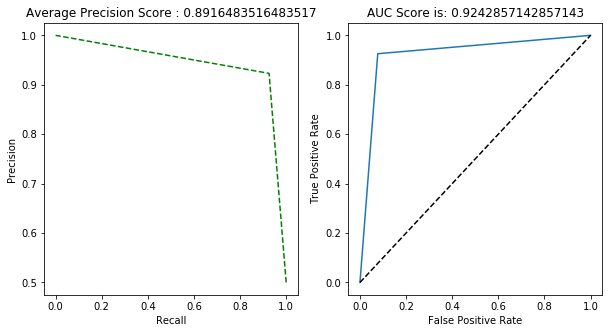

In [418]:
scoreplot(trainY, xgb_pred_train)

In [419]:
xgb_pred_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 94  23]
 [ 20 139]]
Accuracy = 0.8442028985507246
F1 Score = 0.8660436137071652
Sensitivity :  0.8245614035087719
Specificity :  0.8580246913580247


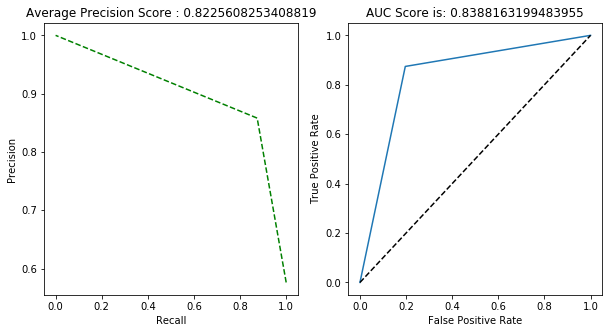

In [420]:
scoreplot(testY, xgb_pred_test)

## ExtraTreesClassifier

In [685]:
model = ExtraTreesClassifier(n_estimators = 6, 
                                        criterion ='entropy', max_features = 2)

In [686]:
model.fit(trainX_fully_preprocessed,trainY)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features=2,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [687]:
param_grid = {'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

In [688]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed, trainY)

In [689]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9012 using {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 12}
mean=0.7975, std=0.00588 using {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2}
mean=0.843, std=0.0244 using {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 4}
mean=0.8649, std=0.0122 using {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}
mean=0.8827, std=0.02875 using {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 8}
mean=0.8693, std=0.007917 using {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
mean=0.8784, std=0.01606 using {'bootstrap': True, 

mean=0.8832, std=0.01761 using {'bootstrap': True, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 12}
mean=0.8842, std=0.02595 using {'bootstrap': True, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 14}
mean=0.8856, std=0.01965 using {'bootstrap': True, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 16}
mean=0.8919, std=0.02071 using {'bootstrap': True, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 18}
mean=0.8794, std=0.01892 using {'bootstrap': True, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 20}
mean=0.8396, std=0.03939 using {'bootstrap': True, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 2}
mean=0.8706, std=0.02141 using {'bootstrap

mean=0.8883, std=0.01648 using {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 14}
mean=0.8713, std=0.02454 using {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 16}
mean=0.8837, std=0.01682 using {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 18}
mean=0.8765, std=0.009629 using {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
mean=0.8245, std=0.007695 using {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 2}
mean=0.8485, std=0.01907 using {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 4}
mean=0.8716, std=0.02135 using {'bootstr

mean=0.8791, std=0.02154 using {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
mean=0.8829, std=0.0223 using {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 12}
mean=0.8801, std=0.01287 using {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 14}
mean=0.8897, std=0.01508 using {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 16}
mean=0.8775, std=0.009565 using {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 18}
mean=0.8845, std=0.01777 using {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
mean=0.8564, std=0.01073 usi

In [690]:
best_parameter = grid.best_params_

In [691]:
model = ExtraTreesClassifier(**best_parameter, criterion ='entropy')

In [692]:
model.fit(trainX_fully_preprocessed,trainY)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=50, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [693]:
print(model.feature_importances_)

[0.02627161 0.05895589 0.01743836 0.03393632 0.02090389 0.07545532
 0.03499609 0.0083357  0.046014   0.01103965 0.09616718 0.10540728
 0.0130872  0.01858096 0.01322138 0.02656905 0.13636016 0.01012365
 0.01760952 0.22952679]


In [430]:
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        model.estimators_], 
                                        axis = 0) 

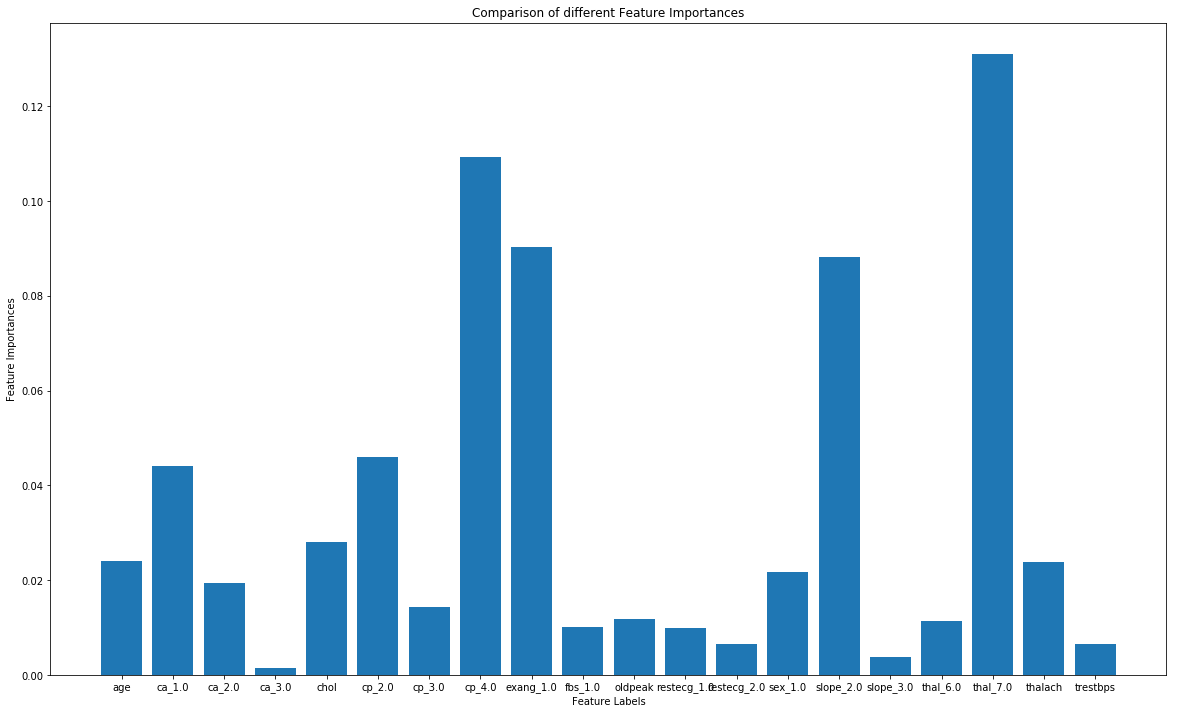

In [431]:
# Plotting a Bar Graph to compare the models 
fig,ax=plt.subplots(1,1,figsize=(20,12))
plt.bar(trainX_fully_preprocessed.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

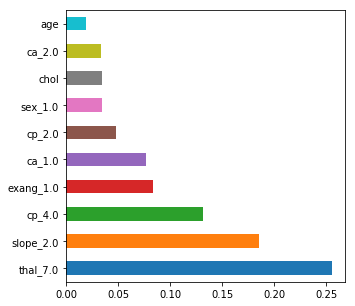

In [432]:
#plot graph of feature importances for better visualization
rcParams['figure.figsize'] = 5, 5
feat_importances = pd.Series(model.feature_importances_, index=trainX_fully_preprocessed.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [433]:
col = ['thal_7.0','cp_4.0','slope_2.0','exang_1.0','ca_1.0','cp_2.0','chol','ca_2.0','age','sex_1.0']

### Neural Network

### Tune Batch Size and Number of Epochs

In [434]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', get_f1])
    return model

In [435]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [436]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [437]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8967 using {'batch_size': 10, 'epochs': 100}
mean=0.8525, std=0.01244 using {'batch_size': 10, 'epochs': 10}
mean=0.8915, std=0.01038 using {'batch_size': 10, 'epochs': 50}
mean=0.8967, std=0.006563 using {'batch_size': 10, 'epochs': 100}
mean=0.8453, std=0.01016 using {'batch_size': 20, 'epochs': 10}
mean=0.8832, std=0.01156 using {'batch_size': 20, 'epochs': 50}
mean=0.8906, std=0.006521 using {'batch_size': 20, 'epochs': 100}
mean=0.7724, std=0.08162 using {'batch_size': 40, 'epochs': 10}
mean=0.8827, std=0.006136 using {'batch_size': 40, 'epochs': 50}
mean=0.8954, std=0.007882 using {'batch_size': 40, 'epochs': 100}
mean=0.604, std=0.1942 using {'batch_size': 60, 'epochs': 10}
mean=0.8682, std=0.01137 using {'batch_size': 60, 'epochs': 50}
mean=0.8788, std=0.009805 using {'batch_size': 60, 'epochs': 100}
mean=0.6837, std=0.1316 using {'batch_size': 80, 'epochs': 10}
mean=0.8656, std=0.007075 using {'batch_size': 80, 'epochs': 50}
mean=0.8627, std=0.01388 using {

### Tune the Training Optimization Algorithm

In [438]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [439]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [440]:
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [441]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8973 using {'optimizer': 'Adadelta'}
mean=0.8826, std=0.008567 using {'optimizer': 'SGD'}
mean=0.8881, std=0.007169 using {'optimizer': 'RMSprop'}
mean=0.8761, std=0.008641 using {'optimizer': 'Adagrad'}
mean=0.8973, std=0.01424 using {'optimizer': 'Adadelta'}
mean=0.8962, std=0.007908 using {'optimizer': 'Adam'}
mean=0.8849, std=0.01483 using {'optimizer': 'Adamax'}
mean=0.8843, std=0.02079 using {'optimizer': 'Nadam'}


### Tune Learning Rate and Momentum

In [442]:
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [443]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [445]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [446]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8949 using {'learn_rate': 0.1, 'momentum': 0.2}
mean=0.8403, std=0.01669 using {'learn_rate': 0.001, 'momentum': 0.0}
mean=0.8491, std=0.02438 using {'learn_rate': 0.001, 'momentum': 0.2}
mean=0.8495, std=0.012 using {'learn_rate': 0.001, 'momentum': 0.4}
mean=0.8545, std=0.01835 using {'learn_rate': 0.001, 'momentum': 0.6}
mean=0.8745, std=0.008243 using {'learn_rate': 0.001, 'momentum': 0.8}
mean=0.8765, std=0.00915 using {'learn_rate': 0.001, 'momentum': 0.9}
mean=0.8826, std=0.01421 using {'learn_rate': 0.01, 'momentum': 0.0}
mean=0.8764, std=0.01736 using {'learn_rate': 0.01, 'momentum': 0.2}
mean=0.8902, std=0.006021 using {'learn_rate': 0.01, 'momentum': 0.4}
mean=0.8906, std=0.01831 using {'learn_rate': 0.01, 'momentum': 0.6}
mean=0.8846, std=0.02293 using {'learn_rate': 0.01, 'momentum': 0.8}
mean=0.8861, std=0.02162 using {'learn_rate': 0.01, 'momentum': 0.9}
mean=0.886, std=0.02019 using {'learn_rate': 0.1, 'momentum': 0.0}
mean=0.8949, std=0.01606 using 

### Tune Network Weight Initialization

In [447]:
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy', get_f1])
    return model

In [448]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [449]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [450]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9009 using {'init_mode': 'lecun_uniform'}
mean=0.8882, std=0.01093 using {'init_mode': 'uniform'}
mean=0.9009, std=0.002353 using {'init_mode': 'lecun_uniform'}
mean=0.8907, std=0.00565 using {'init_mode': 'normal'}
mean=0.1872, std=0.2648 using {'init_mode': 'zero'}
mean=0.8936, std=0.01148 using {'init_mode': 'glorot_normal'}
mean=0.8956, std=0.01056 using {'init_mode': 'glorot_uniform'}
mean=0.8906, std=0.01254 using {'init_mode': 'he_normal'}
mean=0.8901, std=0.01071 using {'init_mode': 'he_uniform'}


### Tune the Neuron Activation Function

In [451]:
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='lecun_uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy', get_f1])
    return model

In [452]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [453]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [454]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8962 using {'activation': 'relu'}
mean=0.8856, std=0.005907 using {'activation': 'softmax'}
mean=0.8894, std=0.004208 using {'activation': 'softplus'}
mean=0.8917, std=0.01075 using {'activation': 'softsign'}
mean=0.8962, std=0.01207 using {'activation': 'relu'}
mean=0.8948, std=0.004169 using {'activation': 'tanh'}
mean=0.8854, std=0.007814 using {'activation': 'sigmoid'}
mean=0.8808, std=0.009425 using {'activation': 'hard_sigmoid'}
mean=0.8854, std=0.01312 using {'activation': 'linear'}


### Tune Dropout Regularization

In [459]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='lecun_uniform', activation='relu', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy', get_f1])
    return model

In [460]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [461]:
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [462]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9001 using {'dropout_rate': 0.0, 'weight_constraint': 3}
mean=0.8906, std=0.01 using {'dropout_rate': 0.0, 'weight_constraint': 1}
mean=0.8934, std=0.01031 using {'dropout_rate': 0.0, 'weight_constraint': 2}
mean=0.9001, std=0.00293 using {'dropout_rate': 0.0, 'weight_constraint': 3}
mean=0.8923, std=0.0179 using {'dropout_rate': 0.0, 'weight_constraint': 4}
mean=0.899, std=0.002799 using {'dropout_rate': 0.0, 'weight_constraint': 5}
mean=0.8971, std=0.006035 using {'dropout_rate': 0.1, 'weight_constraint': 1}
mean=0.888, std=0.0107 using {'dropout_rate': 0.1, 'weight_constraint': 2}
mean=0.8894, std=0.01147 using {'dropout_rate': 0.1, 'weight_constraint': 3}
mean=0.8898, std=0.008465 using {'dropout_rate': 0.1, 'weight_constraint': 4}
mean=0.8906, std=0.00374 using {'dropout_rate': 0.1, 'weight_constraint': 5}
mean=0.8918, std=0.0103 using {'dropout_rate': 0.2, 'weight_constraint': 1}
mean=0.8889, std=0.01253 using {'dropout_rate': 0.2, 'weight_constraint': 2}
mean

### Tune the Number of Neurons in the Hidden Layer

In [463]:
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=10, kernel_initializer='lecun_uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.0))
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Adadelta',  metrics=['accuracy', get_f1])
    return model

In [464]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [465]:
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [466]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9026 using {'neurons': 30}
mean=0.8831, std=0.008442 using {'neurons': 1}
mean=0.8888, std=0.008265 using {'neurons': 5}
mean=0.8921, std=0.01003 using {'neurons': 10}
mean=0.8889, std=0.01479 using {'neurons': 15}
mean=0.893, std=0.006375 using {'neurons': 20}
mean=0.8931, std=0.006657 using {'neurons': 25}
mean=0.9026, std=0.01315 using {'neurons': 30}


In [467]:
preds_nn_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[326  24]
 [ 28 322]]
Accuracy = 0.9257142857142857
F1 Score = 0.9252873563218391
Sensitivity :  0.9209039548022598
Specificity :  0.930635838150289


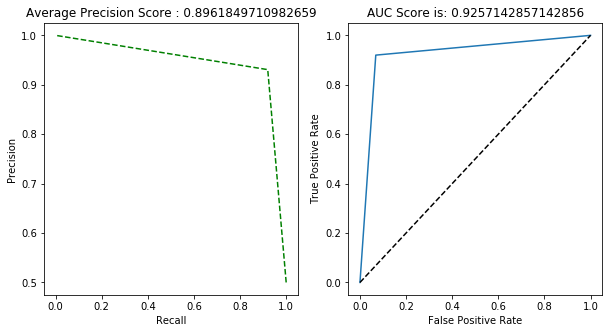

In [468]:
scoreplot(trainY, preds_nn_train)

In [469]:
preds_nn = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[100  17]
 [ 16 143]]
Accuracy = 0.8804347826086957
F1 Score = 0.896551724137931
Sensitivity :  0.8620689655172413
Specificity :  0.89375


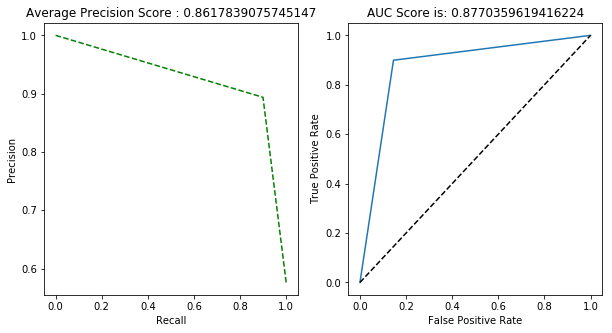

In [470]:
scoreplot(testY, preds_nn)

### Stochastic Gradient Descent (SGD)

In [471]:
model = SGDClassifier(loss="hinge", penalty="l2")

In [472]:
model.fit(trainX_fully_preprocessed[col], trainY)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [473]:
model.score(trainX_fully_preprocessed[col], trainY)

0.8714285714285714

In [474]:
model.score(testX_fully_preprocessed[col], testY)

0.822463768115942

In [475]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "penalty" : ["l2", "l1", "none"],
    "l1_ratio": [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1]
}

model = SGDClassifier(random_state=0, class_weight='balanced')
grid = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [476]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8902 using {'alpha': 0.001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l1'}
mean=0.8474, std=0.06401 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l2'}
mean=0.8339, std=0.03546 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l1'}
mean=0.8592, std=0.04533 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'none'}
mean=0.881, std=0.02374 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l2'}
mean=0.8891, std=0.03087 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l1'}
mean=0.8826, std=0.02467 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'none'}
mean=0.7232, std=0.1467 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l2'}
mean=0.7596, std=0.08427 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l1'}
mean=0.8456, std=0.05415 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'none'}
m

In [477]:
pred_sgd_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[325  25]
 [ 55 295]]
Accuracy = 0.8857142857142857
F1 Score = 0.880597014925373
Sensitivity :  0.8552631578947368
Specificity :  0.921875


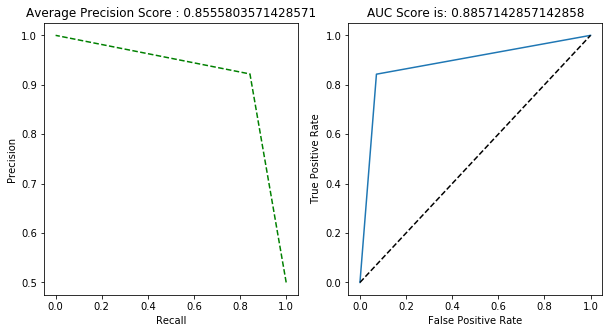

In [478]:
scoreplot(trainY, pred_sgd_train)

In [479]:
pred_sgd_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[101  16]
 [ 19 140]]
Accuracy = 0.8731884057971014
F1 Score = 0.8888888888888888
Sensitivity :  0.8416666666666667
Specificity :  0.8974358974358975


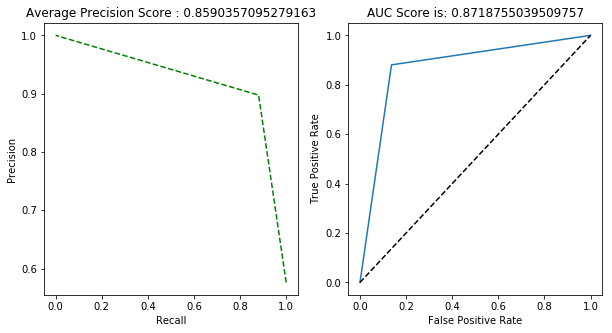

In [480]:
scoreplot(testY, pred_sgd_test)

### XGBoost

In [481]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [482]:
# fit model on training data
eval_set = [(trainX_fully_preprocessed[col], trainY), (testX_fully_preprocessed[col], testY)]
xgb_model.fit(trainX_fully_preprocessed[col], trainY, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(testX_fully_preprocessed[col])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = xgb_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

[0]	validation_0-error:0.101429	validation_0-logloss:0.630529	validation_1-error:0.148551	validation_1-logloss:0.6409
[1]	validation_0-error:0.091429	validation_0-logloss:0.578179	validation_1-error:0.152174	validation_1-logloss:0.598513
[2]	validation_0-error:0.08	validation_0-logloss:0.535272	validation_1-error:0.137681	validation_1-logloss:0.564301
[3]	validation_0-error:0.088571	validation_0-logloss:0.497577	validation_1-error:0.148551	validation_1-logloss:0.536199
[4]	validation_0-error:0.078571	validation_0-logloss:0.467766	validation_1-error:0.141304	validation_1-logloss:0.515248
[5]	validation_0-error:0.08	validation_0-logloss:0.439701	validation_1-error:0.141304	validation_1-logloss:0.493686
[6]	validation_0-error:0.075714	validation_0-logloss:0.414622	validation_1-error:0.137681	validation_1-logloss:0.472078
[7]	validation_0-error:0.078571	validation_0-logloss:0.392689	validation_1-error:0.137681	validation_1-logloss:0.455179
[8]	validation_0-error:0.078571	validation_0-loglo

[69]	validation_0-error:0.034286	validation_0-logloss:0.119232	validation_1-error:0.134058	validation_1-logloss:0.312796
[70]	validation_0-error:0.034286	validation_0-logloss:0.118095	validation_1-error:0.134058	validation_1-logloss:0.314888
[71]	validation_0-error:0.032857	validation_0-logloss:0.117458	validation_1-error:0.137681	validation_1-logloss:0.315087
[72]	validation_0-error:0.031429	validation_0-logloss:0.116411	validation_1-error:0.137681	validation_1-logloss:0.314005
[73]	validation_0-error:0.032857	validation_0-logloss:0.115805	validation_1-error:0.137681	validation_1-logloss:0.315669
[74]	validation_0-error:0.032857	validation_0-logloss:0.11461	validation_1-error:0.137681	validation_1-logloss:0.316504
[75]	validation_0-error:0.032857	validation_0-logloss:0.113058	validation_1-error:0.137681	validation_1-logloss:0.317079
[76]	validation_0-error:0.032857	validation_0-logloss:0.112483	validation_1-error:0.137681	validation_1-logloss:0.317043
[77]	validation_0-error:0.032857	

[137]	validation_0-error:0.014286	validation_0-logloss:0.07575	validation_1-error:0.141304	validation_1-logloss:0.349429
[138]	validation_0-error:0.014286	validation_0-logloss:0.075555	validation_1-error:0.141304	validation_1-logloss:0.349536
[139]	validation_0-error:0.015714	validation_0-logloss:0.075237	validation_1-error:0.141304	validation_1-logloss:0.350852
Accuracy: 85.87%


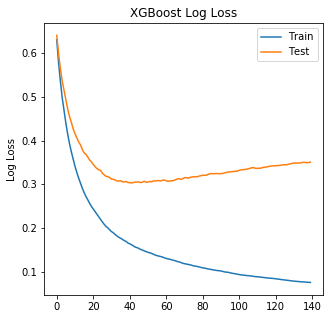

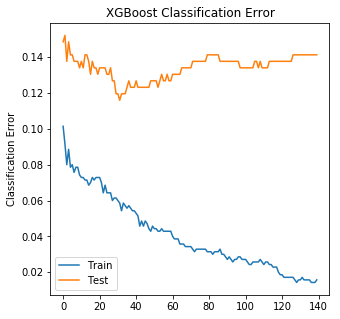

In [483]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [484]:
eval_set = [(testX_fully_preprocessed[col], testY)]
xgb_model.fit(trainX_fully_preprocessed[col], trainY, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(testX_fully_preprocessed[col])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.6409
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.598513
[2]	validation_0-logloss:0.564301
[3]	validation_0-logloss:0.536199
[4]	validation_0-logloss:0.515248
[5]	validation_0-logloss:0.493686
[6]	validation_0-logloss:0.472078
[7]	validation_0-logloss:0.455179
[8]	validation_0-logloss:0.441603
[9]	validation_0-logloss:0.426651
[10]	validation_0-logloss:0.41564
[11]	validation_0-logloss:0.406112
[12]	validation_0-logloss:0.396901
[13]	validation_0-logloss:0.390176
[14]	validation_0-logloss:0.380208
[15]	validation_0-logloss:0.371716
[16]	validation_0-logloss:0.368566
[17]	validation_0-logloss:0.362357
[18]	validation_0-logloss:0.355526
[19]	validation_0-logloss:0.351503
[20]	validation_0-logloss:0.345199
[21]	validation_0-logloss:0.340503
[22]	validation_0-logloss:0.33587
[23]	validation_0-logloss:0.333168
[24]	validation_0-logloss:0.331724
[25]	validation_0-logloss:0.325394
[26]	validation_0-logloss:0.321564
[

In [486]:
fit_params = {"eval_set":[(testX_fully_preprocessed[col], testY)],
          "early_stopping_rounds":10,
          "eval_metric":"logloss"}

### Tune max_depth and min_child_weight

In [487]:
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.1s


[0]	validation_0-logloss:0.643336
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.604426
[2]	validation_0-logloss:0.573055
[3]	validation_0-logloss:0.544635
[4]	validation_0-logloss:0.5253
[5]	validation_0-logloss:0.50596
[6]	validation_0-logloss:0.485005
[7]	validation_0-logloss:0.471938
[8]	validation_0-logloss:0.45894
[9]	validation_0-logloss:0.446068
[10]	validation_0-logloss:0.43831
[11]	validation_0-logloss:0.429614
[12]	validation_0-logloss:0.41885
[13]	validation_0-logloss:0.411559
[14]	validation_0-logloss:0.403282
[15]	validation_0-logloss:0.398071
[16]	validation_0-logloss:0.394378
[17]	validation_0-logloss:0.388342
[18]	validation_0-logloss:0.383811
[19]	validation_0-logloss:0.37929
[20]	validation_0-logloss:0.373283
[21]	validation_0-logloss:0.367782
[22]	validation_0-logloss:0.361915
[23]	validation_0-logloss:0.358427
[24]	validation_0-logloss:0.355529
[25]	validation_0-logloss:0.350764
[26]	validation_0-logloss:0.345634
[27]

[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   10.6s finished


[31]	validation_0-logloss:0.339304
[32]	validation_0-logloss:0.335644
[33]	validation_0-logloss:0.331342
[34]	validation_0-logloss:0.329428
[35]	validation_0-logloss:0.329756
[36]	validation_0-logloss:0.32778
[37]	validation_0-logloss:0.328475
[38]	validation_0-logloss:0.326471
[39]	validation_0-logloss:0.322476
[40]	validation_0-logloss:0.32057
[41]	validation_0-logloss:0.318478
[42]	validation_0-logloss:0.317803
[43]	validation_0-logloss:0.316334
[44]	validation_0-logloss:0.316839
[45]	validation_0-logloss:0.316258
[46]	validation_0-logloss:0.314612
[47]	validation_0-logloss:0.314575
[48]	validation_0-logloss:0.313475
[49]	validation_0-logloss:0.311476
[50]	validation_0-logloss:0.31218
[51]	validation_0-logloss:0.311898
[52]	validation_0-logloss:0.310649
[53]	validation_0-logloss:0.310491
[54]	validation_0-logloss:0.307658
[55]	validation_0-logloss:0.30696
[56]	validation_0-logloss:0.306623
[57]	validation_0-logloss:0.306022
[58]	validation_0-logloss:0.307721
[59]	validation_0-loglos

In [488]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8927 using {'max_depth': 3, 'min_child_weight': 1}
mean=0.8927, std=0.03081 using {'max_depth': 3, 'min_child_weight': 1}
mean=0.8926, std=0.03208 using {'max_depth': 3, 'min_child_weight': 3}
mean=0.891, std=0.0285 using {'max_depth': 3, 'min_child_weight': 5}
mean=0.8837, std=0.02459 using {'max_depth': 5, 'min_child_weight': 1}
mean=0.8813, std=0.03298 using {'max_depth': 5, 'min_child_weight': 3}
mean=0.8858, std=0.03106 using {'max_depth': 5, 'min_child_weight': 5}
mean=0.8843, std=0.02572 using {'max_depth': 7, 'min_child_weight': 1}
mean=0.8839, std=0.03156 using {'max_depth': 7, 'min_child_weight': 3}
mean=0.8875, std=0.03253 using {'max_depth': 7, 'min_child_weight': 5}
mean=0.8861, std=0.03246 using {'max_depth': 9, 'min_child_weight': 1}
mean=0.8857, std=0.03197 using {'max_depth': 9, 'min_child_weight': 3}
mean=0.8875, std=0.03253 using {'max_depth': 9, 'min_child_weight': 5}


### Tune gamma

In [489]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [490]:
param_test = {
 'gamma':[i/10.0 for i in range(0,5)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.643606
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.604756
[2]	validation_0-logloss:0.573422
[3]	validation_0-logloss:0.544957
[4]	validation_0-logloss:0.525626
[5]	validation_0-logloss:0.506416
[6]	validation_0-logloss:0.485332
[7]	validation_0-logloss:0.472319
[8]	validation_0-logloss:0.459322
[9]	validation_0-logloss:0.444954
[10]	validation_0-logloss:0.43764
[11]	validation_0-logloss:0.429116
[12]	validation_0-logloss:0.419752
[13]	validation_0-logloss:0.412574
[14]	validation_0-logloss:0.4042
[15]	validation_0-logloss:0.39831
[16]	validation_0-logloss:0.394394
[17]	validation_0-logloss:0.388723
[18]	validation_0-logloss:0.383978
[19]	validation_0-logloss:0.379512
[20]	validation_0-logloss:0.373446
[21]	validation_0-logloss:0.368014
[22]	validation_0-logloss:0.362133
[23]	validation_0-logloss:0.358153
[24]	validation_0-logloss:0.355227
[25]	validation_0-logloss:0.35031
[26]	validation_0-logloss:0.348754


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.0s finished


[27]	validation_0-logloss:0.346005
[28]	validation_0-logloss:0.345013
[29]	validation_0-logloss:0.344555
[30]	validation_0-logloss:0.342243
[31]	validation_0-logloss:0.341546
[32]	validation_0-logloss:0.337753
[33]	validation_0-logloss:0.333187
[34]	validation_0-logloss:0.330554
[35]	validation_0-logloss:0.330943
[36]	validation_0-logloss:0.327176
[37]	validation_0-logloss:0.327884
[38]	validation_0-logloss:0.325979
[39]	validation_0-logloss:0.322064
[40]	validation_0-logloss:0.32031
[41]	validation_0-logloss:0.318234
[42]	validation_0-logloss:0.315859
[43]	validation_0-logloss:0.314339
[44]	validation_0-logloss:0.314693
[45]	validation_0-logloss:0.313833
[46]	validation_0-logloss:0.312059
[47]	validation_0-logloss:0.311981
[48]	validation_0-logloss:0.309839
[49]	validation_0-logloss:0.308019
[50]	validation_0-logloss:0.30843
[51]	validation_0-logloss:0.308535
[52]	validation_0-logloss:0.307309
[53]	validation_0-logloss:0.307676
[54]	validation_0-logloss:0.30485
[55]	validation_0-loglo

In [491]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8932 using {'gamma': 0.4}
mean=0.8927, std=0.03081 using {'gamma': 0.0}
mean=0.8906, std=0.03074 using {'gamma': 0.1}
mean=0.8931, std=0.02854 using {'gamma': 0.2}
mean=0.8921, std=0.03272 using {'gamma': 0.3}
mean=0.8932, std=0.03131 using {'gamma': 0.4}


### Tune subsample and colsample_bytree

In [493]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=1, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [494]:
param_test = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.4s


[0]	validation_0-logloss:0.646306
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.607834
[2]	validation_0-logloss:0.582699
[3]	validation_0-logloss:0.557961
[4]	validation_0-logloss:0.541728
[5]	validation_0-logloss:0.527885
[6]	validation_0-logloss:0.505976
[7]	validation_0-logloss:0.48703
[8]	validation_0-logloss:0.471745
[9]	validation_0-logloss:0.457884
[10]	validation_0-logloss:0.446226
[11]	validation_0-logloss:0.435016
[12]	validation_0-logloss:0.428418
[13]	validation_0-logloss:0.419656
[14]	validation_0-logloss:0.411687
[15]	validation_0-logloss:0.407197
[16]	validation_0-logloss:0.397911
[17]	validation_0-logloss:0.393259
[18]	validation_0-logloss:0.389023
[19]	validation_0-logloss:0.381517
[20]	validation_0-logloss:0.375606
[21]	validation_0-logloss:0.36862
[22]	validation_0-logloss:0.367169
[23]	validation_0-logloss:0.363391
[24]	validation_0-logloss:0.359559
[25]	validation_0-logloss:0.357134
[26]	validation_0-logloss:0.351701

[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    8.5s finished


[35]	validation_0-logloss:0.332056
[36]	validation_0-logloss:0.329111
[37]	validation_0-logloss:0.327846
[38]	validation_0-logloss:0.326648
[39]	validation_0-logloss:0.322922
[40]	validation_0-logloss:0.323714
[41]	validation_0-logloss:0.322276
[42]	validation_0-logloss:0.320186
[43]	validation_0-logloss:0.316987
[44]	validation_0-logloss:0.317766
[45]	validation_0-logloss:0.317657
[46]	validation_0-logloss:0.315859
[47]	validation_0-logloss:0.315297
[48]	validation_0-logloss:0.312908
[49]	validation_0-logloss:0.309473
[50]	validation_0-logloss:0.308144
[51]	validation_0-logloss:0.306998
[52]	validation_0-logloss:0.304998
[53]	validation_0-logloss:0.30601
[54]	validation_0-logloss:0.304817
[55]	validation_0-logloss:0.305561
[56]	validation_0-logloss:0.305526
[57]	validation_0-logloss:0.304488
[58]	validation_0-logloss:0.305641
[59]	validation_0-logloss:0.305674
[60]	validation_0-logloss:0.305423
[61]	validation_0-logloss:0.304982
[62]	validation_0-logloss:0.305937
[63]	validation_0-log

In [495]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8976 using {'colsample_bytree': 0.6, 'subsample': 0.7}
mean=0.8966, std=0.03127 using {'colsample_bytree': 0.6, 'subsample': 0.6}
mean=0.8976, std=0.03552 using {'colsample_bytree': 0.6, 'subsample': 0.7}
mean=0.8902, std=0.02934 using {'colsample_bytree': 0.6, 'subsample': 0.8}
mean=0.8974, std=0.03726 using {'colsample_bytree': 0.6, 'subsample': 0.9}
mean=0.8972, std=0.02873 using {'colsample_bytree': 0.7, 'subsample': 0.6}
mean=0.8917, std=0.03795 using {'colsample_bytree': 0.7, 'subsample': 0.7}
mean=0.8901, std=0.02659 using {'colsample_bytree': 0.7, 'subsample': 0.8}
mean=0.8905, std=0.03246 using {'colsample_bytree': 0.7, 'subsample': 0.9}
mean=0.8956, std=0.03264 using {'colsample_bytree': 0.8, 'subsample': 0.6}
mean=0.8956, std=0.03202 using {'colsample_bytree': 0.8, 'subsample': 0.7}
mean=0.8932, std=0.03131 using {'colsample_bytree': 0.8, 'subsample': 0.8}
mean=0.8943, std=0.02793 using {'colsample_bytree': 0.8, 'subsample': 0.9}
mean=0.8974, std=0.02919 

### Tuning Regularization Parameters

In [497]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=1, gamma=0.4, subsample=0.7, colsample_bytree=0.6,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [498]:
param_test = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.646446
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.608087
[2]	validation_0-logloss:0.582989
[3]	validation_0-logloss:0.558325
[4]	validation_0-logloss:0.542123
[5]	validation_0-logloss:0.528312
[6]	validation_0-logloss:0.50644
[7]	validation_0-logloss:0.487528
[8]	validation_0-logloss:0.47226
[9]	validation_0-logloss:0.458468
[10]	validation_0-logloss:0.446837
[11]	validation_0-logloss:0.435647
[12]	validation_0-logloss:0.429074
[13]	validation_0-logloss:0.42031
[14]	validation_0-logloss:0.412381
[15]	validation_0-logloss:0.407873
[16]	validation_0-logloss:0.39883
[17]	validation_0-logloss:0.394171
[18]	validation_0-logloss:0.389897
[19]	validation_0-logloss:0.38236
[20]	validation_0-logloss:0.376453
[21]	validation_0-logloss:0.369478
[22]	validation_0-logloss:0.368035
[23]	validation_0-logloss:0.364232
[24]	validation_0-logloss:0.360364
[25]	validation_0-logloss:0.357944
[26]	validation_0-logloss:0.352527
[2

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.2s finished


[33]	validation_0-logloss:0.336985
[34]	validation_0-logloss:0.334328
[35]	validation_0-logloss:0.332171
[36]	validation_0-logloss:0.329176
[37]	validation_0-logloss:0.328504
[38]	validation_0-logloss:0.327424
[39]	validation_0-logloss:0.323852
[40]	validation_0-logloss:0.324007
[41]	validation_0-logloss:0.322521
[42]	validation_0-logloss:0.32025
[43]	validation_0-logloss:0.317268
[44]	validation_0-logloss:0.318899
[45]	validation_0-logloss:0.318295
[46]	validation_0-logloss:0.316539
[47]	validation_0-logloss:0.315983
[48]	validation_0-logloss:0.314421
[49]	validation_0-logloss:0.311018
[50]	validation_0-logloss:0.309574
[51]	validation_0-logloss:0.309106
[52]	validation_0-logloss:0.30659
[53]	validation_0-logloss:0.307646
[54]	validation_0-logloss:0.305363
[55]	validation_0-logloss:0.306108
[56]	validation_0-logloss:0.306092
[57]	validation_0-logloss:0.305022
[58]	validation_0-logloss:0.306195
[59]	validation_0-logloss:0.306454
[60]	validation_0-logloss:0.306126
[61]	validation_0-logl

In [499]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8991 using {'reg_alpha': 0.1}
mean=0.8976, std=0.03552 using {'reg_alpha': 1e-05}
mean=0.8989, std=0.03451 using {'reg_alpha': 0.01}
mean=0.8991, std=0.03293 using {'reg_alpha': 0.1}
mean=0.8979, std=0.03531 using {'reg_alpha': 1}
mean=0.0, std=0.0 using {'reg_alpha': 100}


### Reducing Learning Rate

In [500]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3, reg_alpha=0.1,
                        min_child_weight=1, gamma=0.4, subsample=0.7, colsample_bytree=0.6,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [501]:
param_test = {
 'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.568874
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.499782
[2]	validation_0-logloss:0.464871
[3]	validation_0-logloss:0.433998
[4]	validation_0-logloss:0.424206
[5]	validation_0-logloss:0.411918
[6]	validation_0-logloss:0.387448
[7]	validation_0-logloss:0.377406
[8]	validation_0-logloss:0.369832
[9]	validation_0-logloss:0.350576
[10]	validation_0-logloss:0.346184
[11]	validation_0-logloss:0.34285
[12]	validation_0-logloss:0.339548
[13]	validation_0-logloss:0.338558


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.5s finished


[14]	validation_0-logloss:0.326848
[15]	validation_0-logloss:0.327949
[16]	validation_0-logloss:0.321416
[17]	validation_0-logloss:0.324712
[18]	validation_0-logloss:0.328816
[19]	validation_0-logloss:0.324953
[20]	validation_0-logloss:0.326683
[21]	validation_0-logloss:0.327375
[22]	validation_0-logloss:0.32505
[23]	validation_0-logloss:0.324315
[24]	validation_0-logloss:0.324665
[25]	validation_0-logloss:0.326868
[26]	validation_0-logloss:0.326258
Stopping. Best iteration:
[16]	validation_0-logloss:0.321416



In [502]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8995 using {'learning_rate': 0.3}
mean=0.8914, std=0.03836 using {'learning_rate': 0.001}
mean=0.8883, std=0.03107 using {'learning_rate': 0.01}
mean=0.8991, std=0.03293 using {'learning_rate': 0.1}
mean=0.8927, std=0.02952 using {'learning_rate': 0.2}
mean=0.8995, std=0.02896 using {'learning_rate': 0.3}


In [503]:
xgb_pred_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[317  33]
 [ 21 329]]
Accuracy = 0.9228571428571428
F1 Score = 0.9241573033707865
Sensitivity :  0.9378698224852071
Specificity :  0.9088397790055248


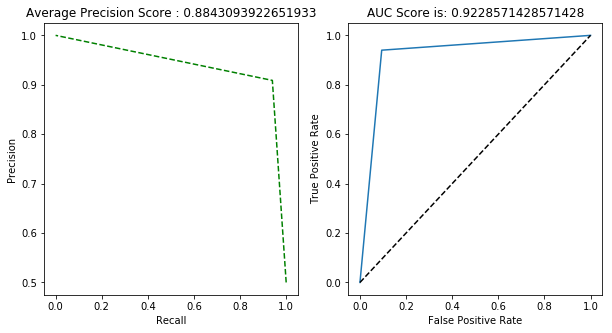

In [504]:
scoreplot(trainY, xgb_pred_train)

In [505]:
xgb_pred_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 96  21]
 [ 15 144]]
Accuracy = 0.8695652173913043
F1 Score = 0.8888888888888888
Sensitivity :  0.8648648648648649
Specificity :  0.8727272727272727


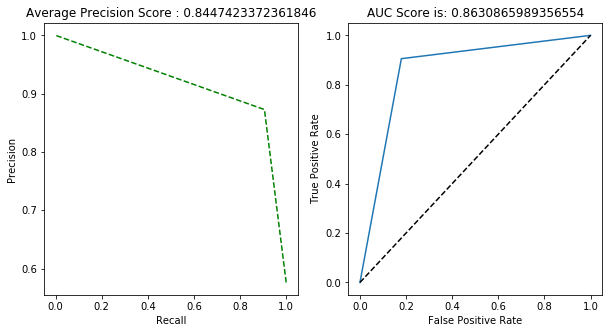

In [507]:
scoreplot(testY, xgb_pred_test)

## LASSO

In [59]:
lasso = Lasso()

folds = 5

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

grid_result = model_cv.fit(trainX_fully_preprocessed,trainY) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.090610      0.165746         0.003124        0.006249      0.0001   
1       0.000000      0.000000         0.000000        0.000000       0.001   
2       0.000000      0.000000         0.000000        0.000000        0.01   
3       0.006248      0.007653         0.000000        0.000000        0.05   
4       0.000000      0.000000         0.006256        0.007662         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.231281          -0.234299          -0.214720   
1   {'alpha': 0.001}          -0.230876          -0.233506          -0.214067   
2    {'alpha': 0.01}          -0.237476          -0.237442          -0.220043   
3    {'alpha': 0.05}          -0.322086          -0.314874          -0.300604   
4     {'alpha': 0.1}          -0.405302          -0.401656          -0.403043   

   split3_test_score       ...         mean_test_score  std_test_score  \
0          -0.245723       ...               -0.218613        0.027627   
1          -0.244844       ...               -0.218110        0.027265   
2          -0.252722       ...               -0.227130        0.022146   
3          -0.328702       ...               -0.312590        0.012261   
4          -0.412283       ...               -0.406373        0.003993   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.205408           -0.208898   
1                1           -0.205039           -0.208491   
2                3           -0.214877           -0.218334   
3                4           -0.298400           -0.304186   
4                5           -0.393780           -0.400433   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.214203           -0.203035           -0.224589   
1           -0.213977           -0.202195           -0.224404   
2           -0.224416           -0.211897           -0.236044   
3           -0.309824           -0.294671           -0.317313   
4           -0.407562           -0.389393           -0.408247   

   mean_train_score  std_train_score  
0         -0.211226         0.007665  
1         -0.210821         0.007845  
2         -0.221114         0.008548  
3         -0.304879         0.008071  
4         -0.399883         0.007436  

[5 rows x 21 columns]

In [61]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for -0.2181 using {'alpha': 0.001}
mean=-0.2186, std=0.02763 using {'alpha': 0.0001}
mean=-0.2181, std=0.02726 using {'alpha': 0.001}
mean=-0.2271, std=0.02215 using {'alpha': 0.01}
mean=-0.3126, std=0.01226 using {'alpha': 0.05}
mean=-0.4064, std=0.003993 using {'alpha': 0.1}
mean=-0.4993, std=0.005495 using {'alpha': 0.2}
mean=-0.5041, std=0.004928 using {'alpha': 0.3}
mean=-0.5041, std=0.004928 using {'alpha': 0.4}
mean=-0.5041, std=0.004928 using {'alpha': 0.5}
mean=-0.5041, std=0.004928 using {'alpha': 0.6}
mean=-0.5041, std=0.004928 using {'alpha': 0.7}
mean=-0.5041, std=0.004928 using {'alpha': 0.8}
mean=-0.5041, std=0.004928 using {'alpha': 0.9}
mean=-0.5041, std=0.004928 using {'alpha': 1.0}
mean=-0.5041, std=0.004928 using {'alpha': 2.0}
mean=-0.5041, std=0.004928 using {'alpha': 3.0}
mean=-0.5041, std=0.004928 using {'alpha': 4.0}
mean=-0.5041, std=0.004928 using {'alpha': 5.0}
mean=-0.5041, std=0.004928 using {'alpha': 6.0}
mean=-0.5041, std=0.004928 using {'a

In [62]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(trainX_fully_preprocessed,trainY) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
model_coef = pd.Series(lasso.coef_, index = list(trainX_fully_preprocessed.columns))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 

Variables Eliminated:  0
Variables Kept:  20


Text(0.5,1,'Most Important Features Identified using Lasso (!0)')

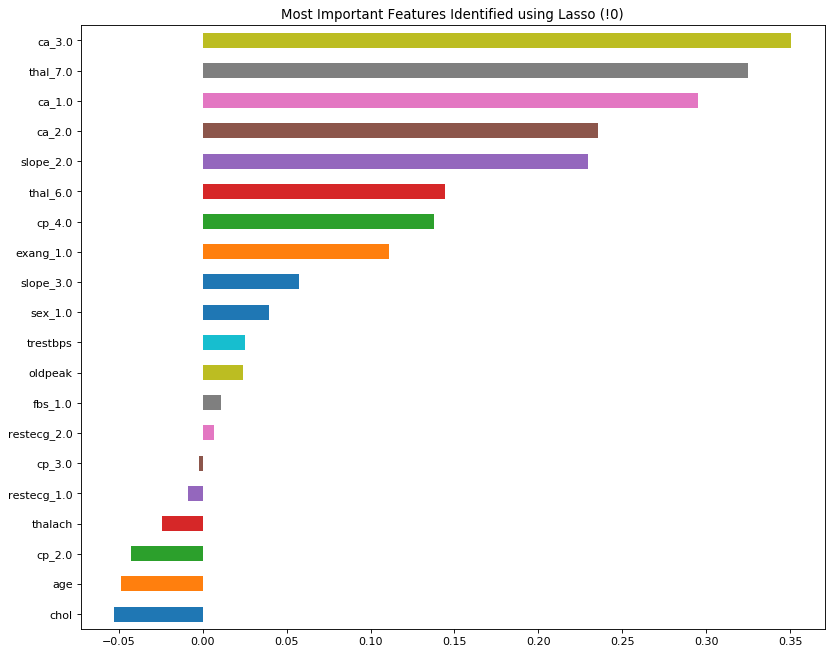

In [64]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")

In [65]:
col = ['ca_3.0','ca_1.0','thal_7.0','ca_2.0','slope_2.0','cp_4.0','exang_1.0','thal_6.0','sex_1.0','slope_3.0']

### Neural Network

### Tune Batch Size and Number of Epochs

In [70]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', get_f1])
    return model

In [71]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [81]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [82]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8926 using {'batch_size': 20, 'epochs': 100}
mean=0.8514, std=0.04608 using {'batch_size': 10, 'epochs': 10}
mean=0.8839, std=0.01312 using {'batch_size': 10, 'epochs': 50}
mean=0.8859, std=0.008792 using {'batch_size': 10, 'epochs': 100}
mean=0.8451, std=0.03601 using {'batch_size': 20, 'epochs': 10}
mean=0.8793, std=0.006143 using {'batch_size': 20, 'epochs': 50}
mean=0.8926, std=0.01005 using {'batch_size': 20, 'epochs': 100}
mean=0.7651, std=0.04238 using {'batch_size': 40, 'epochs': 10}
mean=0.8899, std=0.01163 using {'batch_size': 40, 'epochs': 50}
mean=0.885, std=0.01006 using {'batch_size': 40, 'epochs': 100}
mean=0.7567, std=0.1068 using {'batch_size': 60, 'epochs': 10}
mean=0.8608, std=0.02961 using {'batch_size': 60, 'epochs': 50}
mean=0.8838, std=0.01091 using {'batch_size': 60, 'epochs': 100}
mean=0.7618, std=0.1099 using {'batch_size': 80, 'epochs': 10}
mean=0.8676, std=0.02258 using {'batch_size': 80, 'epochs': 50}
mean=0.8774, std=0.01697 using {'bat

### Tune the Training Optimization Algorithm

In [83]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [84]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=0)

In [85]:
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [86]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8914 using {'optimizer': 'Nadam'}
mean=0.8637, std=0.0187 using {'optimizer': 'SGD'}
mean=0.888, std=0.003927 using {'optimizer': 'RMSprop'}
mean=0.8857, std=0.009633 using {'optimizer': 'Adagrad'}
mean=0.8859, std=0.008242 using {'optimizer': 'Adadelta'}
mean=0.8899, std=0.004173 using {'optimizer': 'Adam'}
mean=0.8848, std=0.007693 using {'optimizer': 'Adamax'}
mean=0.8914, std=0.006777 using {'optimizer': 'Nadam'}


### Tune Learning Rate and Momentum

In [87]:
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [88]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=0)

In [89]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [90]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8868 using {'learn_rate': 0.01, 'momentum': 0.6}
mean=0.8139, std=0.04957 using {'learn_rate': 0.001, 'momentum': 0.0}
mean=0.8263, std=0.03796 using {'learn_rate': 0.001, 'momentum': 0.2}
mean=0.8204, std=0.05491 using {'learn_rate': 0.001, 'momentum': 0.4}
mean=0.833, std=0.02375 using {'learn_rate': 0.001, 'momentum': 0.6}
mean=0.8608, std=0.0207 using {'learn_rate': 0.001, 'momentum': 0.8}
mean=0.8704, std=0.0116 using {'learn_rate': 0.001, 'momentum': 0.9}
mean=0.8792, std=0.01135 using {'learn_rate': 0.01, 'momentum': 0.0}
mean=0.8729, std=0.01375 using {'learn_rate': 0.01, 'momentum': 0.2}
mean=0.8824, std=0.01039 using {'learn_rate': 0.01, 'momentum': 0.4}
mean=0.8868, std=0.00221 using {'learn_rate': 0.01, 'momentum': 0.6}
mean=0.8865, std=0.008958 using {'learn_rate': 0.01, 'momentum': 0.8}
mean=0.883, std=0.009905 using {'learn_rate': 0.01, 'momentum': 0.9}
mean=0.8805, std=0.02684 using {'learn_rate': 0.1, 'momentum': 0.0}
mean=0.8817, std=0.01598 using 

### Tune Network Weight Initialization

In [91]:
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy', get_f1])
    return model

In [92]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=0)

In [93]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [94]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.887 using {'init_mode': 'glorot_uniform'}
mean=0.8813, std=0.006946 using {'init_mode': 'uniform'}
mean=0.8843, std=0.009283 using {'init_mode': 'lecun_uniform'}
mean=0.8841, std=0.008011 using {'init_mode': 'normal'}
mean=0.1872, std=0.2648 using {'init_mode': 'zero'}
mean=0.8745, std=0.01911 using {'init_mode': 'glorot_normal'}
mean=0.887, std=0.007863 using {'init_mode': 'glorot_uniform'}
mean=0.8703, std=0.01556 using {'init_mode': 'he_normal'}
mean=0.8817, std=0.01004 using {'init_mode': 'he_uniform'}


### Tune the Neuron Activation Function

In [95]:
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='glorot_uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy', get_f1])
    return model

In [96]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=0)

In [97]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [98]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8933 using {'activation': 'sigmoid'}
mean=0.885, std=0.007657 using {'activation': 'softmax'}
mean=0.8874, std=0.009568 using {'activation': 'softplus'}
mean=0.886, std=0.003588 using {'activation': 'softsign'}
mean=0.8789, std=0.01069 using {'activation': 'relu'}
mean=0.8876, std=0.009586 using {'activation': 'tanh'}
mean=0.8933, std=0.004407 using {'activation': 'sigmoid'}
mean=0.8868, std=0.006085 using {'activation': 'hard_sigmoid'}
mean=0.8925, std=0.002598 using {'activation': 'linear'}


### Tune Dropout Regularization

In [100]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='glorot_uniform', activation='sigmoid', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy', get_f1])
    return model

In [101]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=0)

In [102]:
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [103]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8938 using {'dropout_rate': 0.0, 'weight_constraint': 2}
mean=0.8769, std=0.0084 using {'dropout_rate': 0.0, 'weight_constraint': 1}
mean=0.8938, std=0.00412 using {'dropout_rate': 0.0, 'weight_constraint': 2}
mean=0.8889, std=0.01027 using {'dropout_rate': 0.0, 'weight_constraint': 3}
mean=0.8917, std=0.002189 using {'dropout_rate': 0.0, 'weight_constraint': 4}
mean=0.8921, std=0.005284 using {'dropout_rate': 0.0, 'weight_constraint': 5}
mean=0.875, std=0.005881 using {'dropout_rate': 0.1, 'weight_constraint': 1}
mean=0.886, std=0.005369 using {'dropout_rate': 0.1, 'weight_constraint': 2}
mean=0.8901, std=0.0003428 using {'dropout_rate': 0.1, 'weight_constraint': 3}
mean=0.8901, std=0.0003428 using {'dropout_rate': 0.1, 'weight_constraint': 4}
mean=0.8851, std=0.00715 using {'dropout_rate': 0.1, 'weight_constraint': 5}
mean=0.8746, std=0.005896 using {'dropout_rate': 0.2, 'weight_constraint': 1}
mean=0.8878, std=0.005877 using {'dropout_rate': 0.2, 'weight_constrai

### Tune the Number of Neurons in the Hidden Layer

In [104]:
# Function to create model, required for KerasClassifier
def create_model(neurons=20):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=10, kernel_initializer='glorot_uniform', activation='sigmoid', kernel_constraint=maxnorm(2)))
    model.add(Dropout(0.0))
    model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy', get_f1])
    return model

In [105]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=0)

In [106]:
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [107]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8921 using {'neurons': 20}
mean=0.8826, std=0.0109 using {'neurons': 1}
mean=0.8786, std=0.004099 using {'neurons': 5}
mean=0.8842, std=0.007115 using {'neurons': 10}
mean=0.8872, std=0.00999 using {'neurons': 15}
mean=0.8921, std=0.005284 using {'neurons': 20}
mean=0.8883, std=0.002144 using {'neurons': 25}
mean=0.8916, std=0.005588 using {'neurons': 30}


In [108]:
preds_nn_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[304  46]
 [ 30 320]]
Accuracy = 0.8914285714285715
F1 Score = 0.893854748603352
Sensitivity :  0.9101796407185628
Specificity :  0.8743169398907104


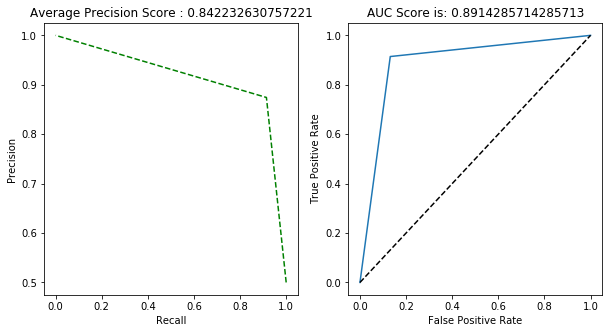

In [109]:
scoreplot(trainY, preds_nn_train)

In [110]:
preds_nn_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 88  29]
 [ 10 149]]
Accuracy = 0.8586956521739131
F1 Score = 0.8842729970326411
Sensitivity :  0.8979591836734694
Specificity :  0.8370786516853933


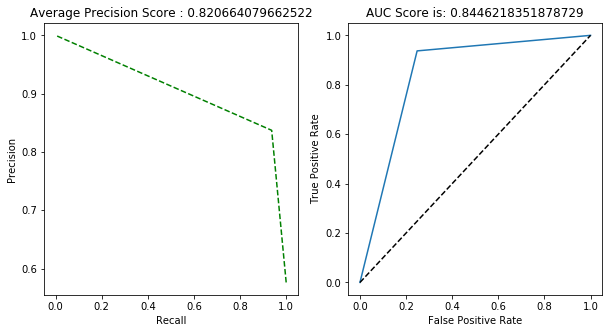

In [111]:
scoreplot(testY, preds_nn_test)

### Stochastic Gradient Descent (SGD)

In [112]:
model = SGDClassifier(loss="hinge", penalty="l2")

In [113]:
model.fit(trainX_fully_preprocessed[col], trainY)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [114]:
model.score(trainX_fully_preprocessed[col], trainY)

0.8314285714285714

In [115]:
model.score(testX_fully_preprocessed[col], testY)

0.8369565217391305

In [116]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "penalty" : ["l2", "l1", "none"],
    "l1_ratio": [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1]
}

model = SGDClassifier(random_state=0, class_weight='balanced')
grid = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [117]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8917 using {'alpha': 0.001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l2'}
mean=0.8665, std=0.03935 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l2'}
mean=0.8702, std=0.02109 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l1'}
mean=0.8394, std=0.03239 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'none'}
mean=0.8735, std=0.01446 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l2'}
mean=0.8877, std=0.03898 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l1'}
mean=0.8752, std=0.01744 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'none'}
mean=0.7841, std=0.118 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l2'}
mean=0.8517, std=0.06093 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l1'}
mean=0.7878, std=0.118 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': '

In [118]:
pred_sgd_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[307  43]
 [ 35 315]]
Accuracy = 0.8885714285714286
F1 Score = 0.8898305084745762
Sensitivity :  0.8976608187134503
Specificity :  0.8798882681564246


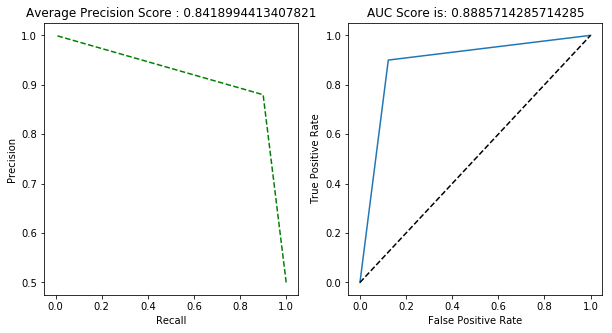

In [119]:
scoreplot(trainY, pred_sgd_train)

In [120]:
pred_sgd_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 91  26]
 [ 13 146]]
Accuracy = 0.8586956521739131
F1 Score = 0.8821752265861027
Sensitivity :  0.875
Specificity :  0.8488372093023255


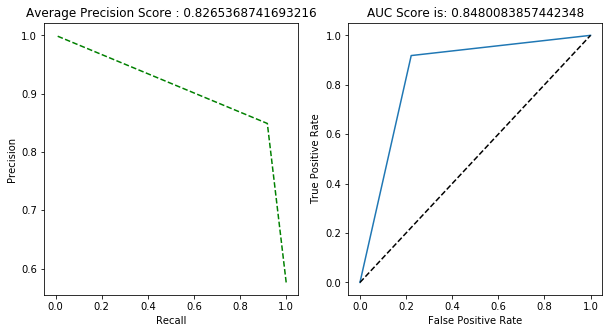

In [121]:
scoreplot(testY, pred_sgd_test)

### XGBoost

In [123]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [124]:
# fit model on training data
eval_set = [(trainX_fully_preprocessed[col], trainY), (testX_fully_preprocessed[col], testY)]
xgb_model.fit(trainX_fully_preprocessed[col], trainY, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(testX_fully_preprocessed[col])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = xgb_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

[0]	validation_0-error:0.125714	validation_0-logloss:0.636068	validation_1-error:0.181159	validation_1-logloss:0.645951
[1]	validation_0-error:0.121429	validation_0-logloss:0.590427	validation_1-error:0.177536	validation_1-logloss:0.607366
[2]	validation_0-error:0.118571	validation_0-logloss:0.552306	validation_1-error:0.17029	validation_1-logloss:0.573774
[3]	validation_0-error:0.121429	validation_0-logloss:0.518598	validation_1-error:0.177536	validation_1-logloss:0.545903
[4]	validation_0-error:0.118571	validation_0-logloss:0.489389	validation_1-error:0.17029	validation_1-logloss:0.522454
[5]	validation_0-error:0.118571	validation_0-logloss:0.465384	validation_1-error:0.173913	validation_1-logloss:0.503141
[6]	validation_0-error:0.121429	validation_0-logloss:0.444134	validation_1-error:0.173913	validation_1-logloss:0.482867
[7]	validation_0-error:0.12	validation_0-logloss:0.426544	validation_1-error:0.173913	validation_1-logloss:0.469408
[8]	validation_0-error:0.118571	validation_0-l

[69]	validation_0-error:0.1	validation_0-logloss:0.245811	validation_1-error:0.155797	validation_1-logloss:0.338617
[70]	validation_0-error:0.1	validation_0-logloss:0.245638	validation_1-error:0.155797	validation_1-logloss:0.339992
[71]	validation_0-error:0.1	validation_0-logloss:0.245507	validation_1-error:0.155797	validation_1-logloss:0.339971
[72]	validation_0-error:0.1	validation_0-logloss:0.245345	validation_1-error:0.155797	validation_1-logloss:0.339786
[73]	validation_0-error:0.1	validation_0-logloss:0.245139	validation_1-error:0.155797	validation_1-logloss:0.340709
[74]	validation_0-error:0.1	validation_0-logloss:0.244922	validation_1-error:0.155797	validation_1-logloss:0.341147
[75]	validation_0-error:0.1	validation_0-logloss:0.24486	validation_1-error:0.155797	validation_1-logloss:0.341074
[76]	validation_0-error:0.1	validation_0-logloss:0.244748	validation_1-error:0.155797	validation_1-logloss:0.341122
[77]	validation_0-error:0.1	validation_0-logloss:0.244618	validation_1-er

[138]	validation_0-error:0.098571	validation_0-logloss:0.238767	validation_1-error:0.15942	validation_1-logloss:0.352964
[139]	validation_0-error:0.098571	validation_0-logloss:0.238727	validation_1-error:0.15942	validation_1-logloss:0.35251
Accuracy: 84.06%


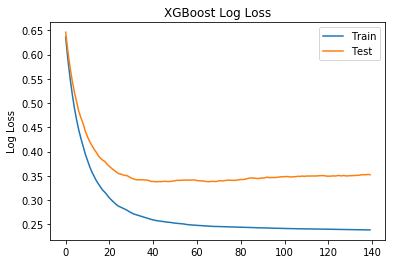

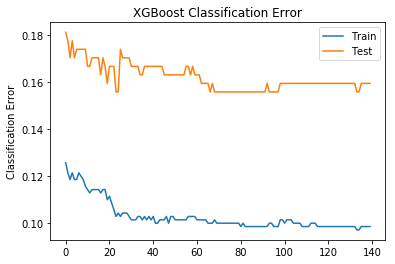

In [127]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [128]:
eval_set = [(testX_fully_preprocessed[col], testY)]
xgb_model.fit(trainX_fully_preprocessed[col], trainY, early_stopping_rounds=40, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(testX_fully_preprocessed[col])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.645951
Will train until validation_0-logloss hasn't improved in 40 rounds.
[1]	validation_0-logloss:0.607366
[2]	validation_0-logloss:0.573774
[3]	validation_0-logloss:0.545903
[4]	validation_0-logloss:0.522454
[5]	validation_0-logloss:0.503141
[6]	validation_0-logloss:0.482867
[7]	validation_0-logloss:0.469408
[8]	validation_0-logloss:0.457339
[9]	validation_0-logloss:0.441617
[10]	validation_0-logloss:0.430188
[11]	validation_0-logloss:0.420579
[12]	validation_0-logloss:0.412365
[13]	validation_0-logloss:0.404901
[14]	validation_0-logloss:0.398441
[15]	validation_0-logloss:0.390955
[16]	validation_0-logloss:0.386014
[17]	validation_0-logloss:0.382172
[18]	validation_0-logloss:0.379353
[19]	validation_0-logloss:0.373497
[20]	validation_0-logloss:0.369356
[21]	validation_0-logloss:0.365515
[22]	validation_0-logloss:0.36201
[23]	validation_0-logloss:0.358522
[24]	validation_0-logloss:0.354985
[25]	validation_0-logloss:0.353852
[26]	validation_0-logloss:0.35244

In [129]:
fit_params = {"eval_set":[(testX_fully_preprocessed[col], testY)],
          "early_stopping_rounds":40,
          "eval_metric":"logloss"}

### Tune max_depth and min_child_weight

In [130]:
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.1s


[0]	validation_0-logloss:0.645951
Will train until validation_0-logloss hasn't improved in 40 rounds.
[1]	validation_0-logloss:0.607366
[2]	validation_0-logloss:0.573774
[3]	validation_0-logloss:0.545903
[4]	validation_0-logloss:0.522454
[5]	validation_0-logloss:0.503141
[6]	validation_0-logloss:0.482867
[7]	validation_0-logloss:0.469408
[8]	validation_0-logloss:0.457339
[9]	validation_0-logloss:0.441617
[10]	validation_0-logloss:0.430188
[11]	validation_0-logloss:0.420579
[12]	validation_0-logloss:0.412365
[13]	validation_0-logloss:0.404901
[14]	validation_0-logloss:0.398441
[15]	validation_0-logloss:0.390955
[16]	validation_0-logloss:0.386014
[17]	validation_0-logloss:0.382172
[18]	validation_0-logloss:0.379353


[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   13.5s finished


[19]	validation_0-logloss:0.373497
[20]	validation_0-logloss:0.369356
[21]	validation_0-logloss:0.365515
[22]	validation_0-logloss:0.36201
[23]	validation_0-logloss:0.358522
[24]	validation_0-logloss:0.354985
[25]	validation_0-logloss:0.353852
[26]	validation_0-logloss:0.352444
[27]	validation_0-logloss:0.35094
[28]	validation_0-logloss:0.350571
[29]	validation_0-logloss:0.348108
[30]	validation_0-logloss:0.345612
[31]	validation_0-logloss:0.343784
[32]	validation_0-logloss:0.342383
[33]	validation_0-logloss:0.341905
[34]	validation_0-logloss:0.342035
[35]	validation_0-logloss:0.342002
[36]	validation_0-logloss:0.341783
[37]	validation_0-logloss:0.341408
[38]	validation_0-logloss:0.34042
[39]	validation_0-logloss:0.338637
[40]	validation_0-logloss:0.338432
[41]	validation_0-logloss:0.338232
[42]	validation_0-logloss:0.338036
[43]	validation_0-logloss:0.338511
[44]	validation_0-logloss:0.338266
[45]	validation_0-logloss:0.338937
[46]	validation_0-logloss:0.338517
[47]	validation_0-loglo

In [131]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8783 using {'max_depth': 5, 'min_child_weight': 1}
mean=0.8782, std=0.03529 using {'max_depth': 3, 'min_child_weight': 1}
mean=0.875, std=0.03592 using {'max_depth': 3, 'min_child_weight': 3}
mean=0.8742, std=0.03765 using {'max_depth': 3, 'min_child_weight': 5}
mean=0.8783, std=0.03364 using {'max_depth': 5, 'min_child_weight': 1}
mean=0.8757, std=0.0339 using {'max_depth': 5, 'min_child_weight': 3}
mean=0.8742, std=0.03731 using {'max_depth': 5, 'min_child_weight': 5}
mean=0.8771, std=0.03068 using {'max_depth': 7, 'min_child_weight': 1}
mean=0.8743, std=0.03297 using {'max_depth': 7, 'min_child_weight': 3}
mean=0.8742, std=0.03731 using {'max_depth': 7, 'min_child_weight': 5}
mean=0.8768, std=0.03102 using {'max_depth': 9, 'min_child_weight': 1}
mean=0.8743, std=0.03297 using {'max_depth': 9, 'min_child_weight': 3}
mean=0.8742, std=0.03731 using {'max_depth': 9, 'min_child_weight': 5}


### Tune gamma

In [132]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [133]:
param_test = {
 'gamma':[i/10.0 for i in range(0,5)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.646207
Will train until validation_0-logloss hasn't improved in 40 rounds.
[1]	validation_0-logloss:0.607728
[2]	validation_0-logloss:0.57416
[3]	validation_0-logloss:0.546268
[4]	validation_0-logloss:0.522809
[5]	validation_0-logloss:0.503488
[6]	validation_0-logloss:0.483237
[7]	validation_0-logloss:0.469777
[8]	validation_0-logloss:0.45785
[9]	validation_0-logloss:0.442056
[10]	validation_0-logloss:0.431722
[11]	validation_0-logloss:0.422114
[12]	validation_0-logloss:0.413841
[13]	validation_0-logloss:0.406473
[14]	validation_0-logloss:0.400158
[15]	validation_0-logloss:0.392784
[16]	validation_0-logloss:0.3878
[17]	validation_0-logloss:0.384064
[18]	validation_0-logloss:0.381145
[19]	validation_0-logloss:0.375305
[20]	validation_0-logloss:0.371348
[21]	validation_0-logloss:0.367547
[22]	validation_0-logloss:0.36393
[23]	validation_0-logloss:0.360384
[24]	validation_0-logloss:0.356851
[25]	validation_0-logloss:0.355693
[26]	validation_0-logloss:0.354506
[2

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    4.0s finished


[28]	validation_0-logloss:0.352747
[29]	validation_0-logloss:0.350202
[30]	validation_0-logloss:0.347691
[31]	validation_0-logloss:0.345824
[32]	validation_0-logloss:0.345301
[33]	validation_0-logloss:0.343233
[34]	validation_0-logloss:0.343206
[35]	validation_0-logloss:0.343159
[36]	validation_0-logloss:0.342822
[37]	validation_0-logloss:0.342253
[38]	validation_0-logloss:0.340884
[39]	validation_0-logloss:0.338852
[40]	validation_0-logloss:0.338655
[41]	validation_0-logloss:0.3385
[42]	validation_0-logloss:0.338098
[43]	validation_0-logloss:0.338544
[44]	validation_0-logloss:0.337835
[45]	validation_0-logloss:0.338481
[46]	validation_0-logloss:0.338126
[47]	validation_0-logloss:0.338169
[48]	validation_0-logloss:0.338383
[49]	validation_0-logloss:0.338794
[50]	validation_0-logloss:0.339504
[51]	validation_0-logloss:0.340545
[52]	validation_0-logloss:0.340109
[53]	validation_0-logloss:0.340362
[54]	validation_0-logloss:0.340907
[55]	validation_0-logloss:0.340708
[56]	validation_0-logl

In [134]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8787 using {'gamma': 0.1}
mean=0.8783, std=0.03364 using {'gamma': 0.0}
mean=0.8787, std=0.03358 using {'gamma': 0.1}
mean=0.8781, std=0.03026 using {'gamma': 0.2}
mean=0.878, std=0.02935 using {'gamma': 0.3}
mean=0.8753, std=0.03252 using {'gamma': 0.4}


### Tune subsample and colsample_bytree

In [135]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [136]:
param_test = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s


[0]	validation_0-logloss:0.646024
Will train until validation_0-logloss hasn't improved in 40 rounds.
[1]	validation_0-logloss:0.608067
[2]	validation_0-logloss:0.572723
[3]	validation_0-logloss:0.543142
[4]	validation_0-logloss:0.516721
[5]	validation_0-logloss:0.498093
[6]	validation_0-logloss:0.477722
[7]	validation_0-logloss:0.462744
[8]	validation_0-logloss:0.448104
[9]	validation_0-logloss:0.435437
[10]	validation_0-logloss:0.424854
[11]	validation_0-logloss:0.41412
[12]	validation_0-logloss:0.407852
[13]	validation_0-logloss:0.397337
[14]	validation_0-logloss:0.389456
[15]	validation_0-logloss:0.382402
[16]	validation_0-logloss:0.378745
[17]	validation_0-logloss:0.373614
[18]	validation_0-logloss:0.369441
[19]	validation_0-logloss:0.365567
[20]	validation_0-logloss:0.363053
[21]	validation_0-logloss:0.361026
[22]	validation_0-logloss:0.357402
[23]	validation_0-logloss:0.352987
[24]	validation_0-logloss:0.350989
[25]	validation_0-logloss:0.348847
[26]	validation_0-logloss:0.34760

[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   10.3s finished


[34]	validation_0-logloss:0.335722
[35]	validation_0-logloss:0.335145
[36]	validation_0-logloss:0.335229
[37]	validation_0-logloss:0.335868
[38]	validation_0-logloss:0.336386
[39]	validation_0-logloss:0.333946
[40]	validation_0-logloss:0.335212
[41]	validation_0-logloss:0.335076
[42]	validation_0-logloss:0.336019
[43]	validation_0-logloss:0.336521
[44]	validation_0-logloss:0.336877
[45]	validation_0-logloss:0.33808
[46]	validation_0-logloss:0.337693
[47]	validation_0-logloss:0.337418
[48]	validation_0-logloss:0.337983
[49]	validation_0-logloss:0.338506
[50]	validation_0-logloss:0.338608
[51]	validation_0-logloss:0.338214
[52]	validation_0-logloss:0.3372
[53]	validation_0-logloss:0.338024
[54]	validation_0-logloss:0.337738
[55]	validation_0-logloss:0.3374
[56]	validation_0-logloss:0.33717
[57]	validation_0-logloss:0.337039
[58]	validation_0-logloss:0.336536
[59]	validation_0-logloss:0.335585
[60]	validation_0-logloss:0.335588
[61]	validation_0-logloss:0.336639
[62]	validation_0-logloss:

In [137]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8837 using {'colsample_bytree': 0.9, 'subsample': 0.7}
mean=0.8798, std=0.03583 using {'colsample_bytree': 0.6, 'subsample': 0.6}
mean=0.877, std=0.03617 using {'colsample_bytree': 0.6, 'subsample': 0.7}
mean=0.8783, std=0.03605 using {'colsample_bytree': 0.6, 'subsample': 0.8}
mean=0.8758, std=0.03699 using {'colsample_bytree': 0.6, 'subsample': 0.9}
mean=0.8758, std=0.03196 using {'colsample_bytree': 0.7, 'subsample': 0.6}
mean=0.8799, std=0.03517 using {'colsample_bytree': 0.7, 'subsample': 0.7}
mean=0.8776, std=0.03568 using {'colsample_bytree': 0.7, 'subsample': 0.8}
mean=0.8759, std=0.03373 using {'colsample_bytree': 0.7, 'subsample': 0.9}
mean=0.8749, std=0.03066 using {'colsample_bytree': 0.8, 'subsample': 0.6}
mean=0.8778, std=0.03302 using {'colsample_bytree': 0.8, 'subsample': 0.7}
mean=0.8787, std=0.03358 using {'colsample_bytree': 0.8, 'subsample': 0.8}
mean=0.8766, std=0.03335 using {'colsample_bytree': 0.8, 'subsample': 0.9}
mean=0.8783, std=0.02441 u

### Tuning Regularization Parameters

In [138]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0.1, subsample=0.7, colsample_bytree=0.9,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [139]:
param_test = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.647829
Will train until validation_0-logloss hasn't improved in 40 rounds.
[1]	validation_0-logloss:0.609481
[2]	validation_0-logloss:0.577397
[3]	validation_0-logloss:0.549367
[4]	validation_0-logloss:0.52404
[5]	validation_0-logloss:0.506747
[6]	validation_0-logloss:0.487555
[7]	validation_0-logloss:0.473552
[8]	validation_0-logloss:0.459767
[9]	validation_0-logloss:0.447968
[10]	validation_0-logloss:0.437919
[11]	validation_0-logloss:0.427671
[12]	validation_0-logloss:0.421667
[13]	validation_0-logloss:0.411793
[14]	validation_0-logloss:0.403351
[15]	validation_0-logloss:0.397048
[16]	validation_0-logloss:0.393047
[17]	validation_0-logloss:0.389333
[18]	validation_0-logloss:0.38551
[19]	validation_0-logloss:0.381053
[20]	validation_0-logloss:0.378326
[21]	validation_0-logloss:0.373774
[22]	validation_0-logloss:0.369516
[23]	validation_0-logloss:0.364891
[24]	validation_0-logloss:0.362987
[25]	validation_0-logloss:0.360381
[26]	validation_0-logloss:0.357997

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    4.7s finished


[31]	validation_0-logloss:0.347555
[32]	validation_0-logloss:0.346364
[33]	validation_0-logloss:0.343459
[34]	validation_0-logloss:0.340646
[35]	validation_0-logloss:0.34007
[36]	validation_0-logloss:0.339673
[37]	validation_0-logloss:0.339651
[38]	validation_0-logloss:0.339001
[39]	validation_0-logloss:0.336447
[40]	validation_0-logloss:0.336693
[41]	validation_0-logloss:0.336561
[42]	validation_0-logloss:0.336737
[43]	validation_0-logloss:0.336671
[44]	validation_0-logloss:0.336634
[45]	validation_0-logloss:0.33727
[46]	validation_0-logloss:0.33637
[47]	validation_0-logloss:0.33617
[48]	validation_0-logloss:0.335548
[49]	validation_0-logloss:0.336212
[50]	validation_0-logloss:0.336005
[51]	validation_0-logloss:0.335935
[52]	validation_0-logloss:0.335102
[53]	validation_0-logloss:0.335965
[54]	validation_0-logloss:0.335922
[55]	validation_0-logloss:0.334415
[56]	validation_0-logloss:0.333984
[57]	validation_0-logloss:0.33339
[58]	validation_0-logloss:0.333162
[59]	validation_0-logloss

In [140]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8848 using {'reg_alpha': 1}
mean=0.8837, std=0.03389 using {'reg_alpha': 1e-05}
mean=0.8773, std=0.02991 using {'reg_alpha': 0.01}
mean=0.8782, std=0.03384 using {'reg_alpha': 0.1}
mean=0.8848, std=0.03614 using {'reg_alpha': 1}
mean=0.0, std=0.0 using {'reg_alpha': 100}


### Reducing Learning Rate

In [141]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5, reg_alpha=1,
                        min_child_weight=1, gamma=0.1, subsample=0.7, colsample_bytree=0.9,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [142]:
param_test = {
 'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.647829
Will train until validation_0-logloss hasn't improved in 40 rounds.
[1]	validation_0-logloss:0.609481
[2]	validation_0-logloss:0.577397
[3]	validation_0-logloss:0.549367
[4]	validation_0-logloss:0.52404
[5]	validation_0-logloss:0.506747
[6]	validation_0-logloss:0.487555
[7]	validation_0-logloss:0.473552
[8]	validation_0-logloss:0.459767
[9]	validation_0-logloss:0.447968
[10]	validation_0-logloss:0.437919
[11]	validation_0-logloss:0.427671
[12]	validation_0-logloss:0.421667
[13]	validation_0-logloss:0.411793
[14]	validation_0-logloss:0.403351
[15]	validation_0-logloss:0.397048
[16]	validation_0-logloss:0.393047
[17]	validation_0-logloss:0.389333
[18]	validation_0-logloss:0.38551
[19]	validation_0-logloss:0.381053
[20]	validation_0-logloss:0.378326
[21]	validation_0-logloss:0.373774
[22]	validation_0-logloss:0.369516
[23]	validation_0-logloss:0.364891
[24]	validation_0-logloss:0.362987
[25]	validation_0-logloss:0.360381
[26]	validation_0-logloss:0.357997

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    4.3s finished


[30]	validation_0-logloss:0.348717
[31]	validation_0-logloss:0.347555
[32]	validation_0-logloss:0.346364
[33]	validation_0-logloss:0.343459
[34]	validation_0-logloss:0.340646
[35]	validation_0-logloss:0.34007
[36]	validation_0-logloss:0.339673
[37]	validation_0-logloss:0.339651
[38]	validation_0-logloss:0.339001
[39]	validation_0-logloss:0.336447
[40]	validation_0-logloss:0.336693
[41]	validation_0-logloss:0.336561
[42]	validation_0-logloss:0.336737
[43]	validation_0-logloss:0.336671
[44]	validation_0-logloss:0.336634
[45]	validation_0-logloss:0.33727
[46]	validation_0-logloss:0.33637
[47]	validation_0-logloss:0.33617
[48]	validation_0-logloss:0.335548
[49]	validation_0-logloss:0.336212
[50]	validation_0-logloss:0.336005
[51]	validation_0-logloss:0.335935
[52]	validation_0-logloss:0.335102
[53]	validation_0-logloss:0.335965
[54]	validation_0-logloss:0.335922
[55]	validation_0-logloss:0.334415
[56]	validation_0-logloss:0.333984
[57]	validation_0-logloss:0.33339
[58]	validation_0-logloss

In [143]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8848 using {'learning_rate': 0.1}
mean=0.8738, std=0.02775 using {'learning_rate': 0.001}
mean=0.8757, std=0.0281 using {'learning_rate': 0.01}
mean=0.8848, std=0.03614 using {'learning_rate': 0.1}
mean=0.8839, std=0.0365 using {'learning_rate': 0.2}
mean=0.8802, std=0.03596 using {'learning_rate': 0.3}


In [144]:
xgb_pred_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[320  30]
 [ 42 308]]
Accuracy = 0.8971428571428571
F1 Score = 0.8953488372093023
Sensitivity :  0.8839779005524862
Specificity :  0.9112426035502958


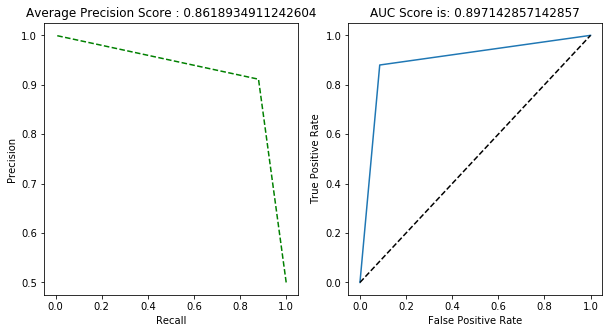

In [145]:
scoreplot(trainY, xgb_pred_train)

In [146]:
xgb_pred_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 94  23]
 [ 20 139]]
Accuracy = 0.8442028985507246
F1 Score = 0.8660436137071652
Sensitivity :  0.8245614035087719
Specificity :  0.8580246913580247


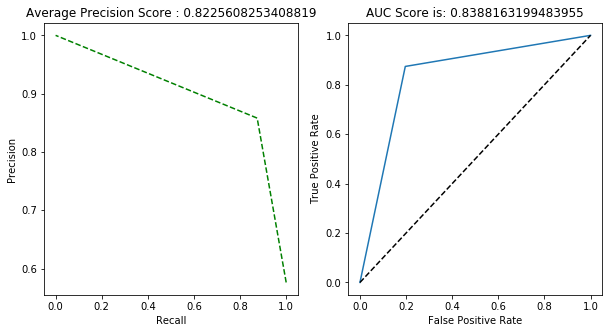

In [147]:
scoreplot(testY, xgb_pred_test)

### MinMaxScaler

In [696]:
train, test = sklearn.model_selection.train_test_split(heart_disease_df, test_size=.3, random_state=10)

In [697]:
# split the data into the X and Y variables
trainY = train["target"].copy()
trainX = train.drop("target", axis=1)
testY = test["target"].copy()
testX = test.drop("target", axis=1)

In [698]:
# Handle the discrete and continuous variables seperatly
trainX_continuous = trainX[CONTINUOUS_FACTORS]
trainX_discrete = trainX[DISCRETE_FACTORS]

testX_continuous = testX[CONTINUOUS_FACTORS]
testX_discrete = testX[DISCRETE_FACTORS]

In [699]:
trainX_continuous[CONTINUOUS_FACTORS] = preprocessing.minmax_scale(trainX_continuous)

trainX_continuous_scaled = trainX_continuous.copy()

In [700]:
# Convert into dummies
trainX_discrete_one_hot = pd.get_dummies(trainX_discrete, drop_first=True)
trainX_discrete_one_hot.head()

ca_1.0  ca_2.0  ca_3.0  cp_2.0  cp_3.0  cp_4.0  exang_1.0  fbs_1.0  \
289       0       0       0       0       0       1          1        0   
7         0       0       0       0       0       1          1        0   
62        0       0       0       1       0       0          0        0   
184       0       0       0       0       0       1          1        0   
141       0       0       0       1       0       0          0        1   

     restecg_1.0  restecg_2.0  sex_1.0  slope_2.0  slope_3.0  thal_6.0  \
289            0            0        1          1          0         0   
7              0            0        0          0          0         0   
62             1            0        0          0          0         0   
184            1            0        0          1          0         0   
141            0            0        0          0          0         0   

     thal_7.0  
289         1  
7           0  
62          0  
184         0  
141         0

In [701]:
trainX_fully_preprocessed = pd.concat([trainX_continuous_scaled, trainX_discrete_one_hot], axis = 1)
trainX_fully_preprocessed.head()

age      chol   oldpeak   thalach  trestbps  ca_1.0  ca_2.0  ca_3.0  \
289  0.479167  0.548922  0.579545  0.253731      0.80       0       0       0   
7    0.583333  0.587065  0.363636  0.768657      0.60       0       0       0   
62   0.291667  0.412935  0.295455  0.865672      0.60       0       0       0   
184  0.666667  0.487562  0.409091  0.447761      0.65       0       0       0   
141  0.520833  0.381426  0.295455  0.597015      0.60       0       0       0   

     cp_2.0  cp_3.0  cp_4.0  exang_1.0  fbs_1.0  restecg_1.0  restecg_2.0  \
289       0       0       1          1        0            0            0   
7         0       0       1          1        0            0            0   
62        1       0       0          0        0            1            0   
184       0       0       1          1        0            1            0   
141       1       0       0          0        1            0            0   

     sex_1.0  slope_2.0  slope_3.0  thal_6.0  thal_7.0  
289        1          1          0         0         1  
7          0          0          0         0         0  
62         0          0          0         0         0  
184        0          1          0         0         0  
141        0          0          0         0         0

In [702]:
# preprocess the test data, note the use of transform instead of fit_transform
testX_continuous[CONTINUOUS_FACTORS] = preprocessing.minmax_scale(testX_continuous)
testX_continuous_scaled = testX_continuous.copy()
testX_discrete_one_hot = pd.get_dummies(testX_discrete, drop_first=True)
testX_fully_preprocessed = pd.concat([testX_continuous_scaled, testX_discrete_one_hot], axis = 1)

In [703]:
trainX_fully_preprocessed.shape

(644, 20)

In [704]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainY==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainY==0)))

Before OverSampling, counts of label '1': 350
Before OverSampling, counts of label '0': 294 



In [705]:
sm_1 = SMOTE(random_state=2)
trainX_fully_preprocessed, trainY = sm_1.fit_sample(trainX_fully_preprocessed, trainY.ravel())

In [706]:
print('After OverSampling, the shape of train_X: {}'.format(trainX_fully_preprocessed.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainY.shape))

After OverSampling, the shape of train_X: (700, 20)
After OverSampling, the shape of train_y: (700,) 



In [707]:
print("After OverSampling, counts of label '1': {}".format(sum(trainY==1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainY==0)))

After OverSampling, counts of label '1': 350
After OverSampling, counts of label '0': 350


In [708]:
trainX_fully_preprocessed.head()

age      chol   oldpeak   thalach  trestbps  ca_1.0  ca_2.0  ca_3.0  \
0  0.479167  0.548922  0.579545  0.253731      0.80       0       0       0   
1  0.583333  0.587065  0.363636  0.768657      0.60       0       0       0   
2  0.291667  0.412935  0.295455  0.865672      0.60       0       0       0   
3  0.666667  0.487562  0.409091  0.447761      0.65       0       0       0   
4  0.520833  0.381426  0.295455  0.597015      0.60       0       0       0   

   cp_2.0  cp_3.0  cp_4.0  exang_1.0  fbs_1.0  restecg_1.0  restecg_2.0  \
0       0       0       1          1        0            0            0   
1       0       0       1          1        0            0            0   
2       1       0       0          0        0            1            0   
3       0       0       1          1        0            1            0   
4       1       0       0          0        1            0            0   

   sex_1.0  slope_2.0  slope_3.0  thal_6.0  thal_7.0  
0        1          1          0         0         1  
1        0          0          0         0         0  
2        0          0          0         0         0  
3        0          1          0         0         0  
4        0          0          0         0         0

In [709]:
trainX_fully_preprocessed.shape

(700, 20)

### SelectKBest Features Selection

In [1071]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)

In [711]:
fit = bestfeatures.fit(trainX_fully_preprocessed,trainY)

In [712]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(trainX_fully_preprocessed.columns)

In [713]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

          Specs       Score
19     thal_7.0  128.947368
11    exang_1.0  119.239044
16    slope_2.0  101.975904
10       cp_4.0   93.336182
8        cp_2.0   93.122449
5        ca_1.0   69.377049
6        ca_2.0   45.760563
9        cp_3.0   19.121951
12      fbs_1.0   15.363636
15      sex_1.0   13.115242
13  restecg_1.0   12.698413
7        ca_3.0   12.000000
17    slope_3.0    9.090909
3       thalach    7.909225
0           age    5.420648
18     thal_6.0    4.900000
2       oldpeak    3.604160
1          chol    3.504901
14  restecg_2.0    0.574468
4      trestbps    0.134633


In [166]:
col = ['thal_7.0','exang_1.0','cp_2.0','slope_2.0','cp_4.0','ca_1.0','ca_2.0','cp_3.0','sex_1.0','fbs_1.0']

### Neural Network

### Tune Batch Size and Number of Epochs

In [174]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', get_f1])
    return model

In [175]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [176]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [177]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8712 using {'batch_size': 10, 'epochs': 100}
mean=0.8644, std=0.01817 using {'batch_size': 10, 'epochs': 10}
mean=0.8703, std=0.0118 using {'batch_size': 10, 'epochs': 50}
mean=0.8712, std=0.009292 using {'batch_size': 10, 'epochs': 100}
mean=0.8448, std=0.04455 using {'batch_size': 20, 'epochs': 10}
mean=0.8649, std=0.008041 using {'batch_size': 20, 'epochs': 50}
mean=0.8698, std=0.0112 using {'batch_size': 20, 'epochs': 100}
mean=0.7985, std=0.01985 using {'batch_size': 40, 'epochs': 10}
mean=0.8629, std=0.01005 using {'batch_size': 40, 'epochs': 50}
mean=0.8655, std=0.008914 using {'batch_size': 40, 'epochs': 100}
mean=0.8102, std=0.01389 using {'batch_size': 60, 'epochs': 10}
mean=0.8587, std=0.01461 using {'batch_size': 60, 'epochs': 50}
mean=0.8669, std=0.008011 using {'batch_size': 60, 'epochs': 100}
mean=0.5995, std=0.2755 using {'batch_size': 80, 'epochs': 10}
mean=0.8531, std=0.0167 using {'batch_size': 80, 'epochs': 50}
mean=0.863, std=0.01049 using {'bat

### Tune the Training Optimization Algorithm

In [178]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [179]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [180]:
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [181]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8733 using {'optimizer': 'SGD'}
mean=0.8733, std=0.007796 using {'optimizer': 'SGD'}
mean=0.8705, std=0.01248 using {'optimizer': 'RMSprop'}
mean=0.8654, std=0.005847 using {'optimizer': 'Adagrad'}
mean=0.8682, std=0.01228 using {'optimizer': 'Adadelta'}
mean=0.8687, std=0.008912 using {'optimizer': 'Adam'}
mean=0.8679, std=0.01088 using {'optimizer': 'Adamax'}
mean=0.8731, std=0.002746 using {'optimizer': 'Nadam'}


### Tune Learning Rate and Momentum

In [182]:
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [183]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [184]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [185]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8738 using {'learn_rate': 0.01, 'momentum': 0.4}
mean=0.8397, std=0.0193 using {'learn_rate': 0.001, 'momentum': 0.0}
mean=0.8481, std=0.02907 using {'learn_rate': 0.001, 'momentum': 0.2}
mean=0.8409, std=0.02094 using {'learn_rate': 0.001, 'momentum': 0.4}
mean=0.8553, std=0.02337 using {'learn_rate': 0.001, 'momentum': 0.6}
mean=0.8649, std=0.01502 using {'learn_rate': 0.001, 'momentum': 0.8}
mean=0.8726, std=0.004769 using {'learn_rate': 0.001, 'momentum': 0.9}
mean=0.8676, std=0.00645 using {'learn_rate': 0.01, 'momentum': 0.0}
mean=0.8691, std=0.004376 using {'learn_rate': 0.01, 'momentum': 0.2}
mean=0.8738, std=0.005755 using {'learn_rate': 0.01, 'momentum': 0.4}
mean=0.8736, std=0.006106 using {'learn_rate': 0.01, 'momentum': 0.6}
mean=0.8737, std=0.006462 using {'learn_rate': 0.01, 'momentum': 0.8}
mean=0.8723, std=0.006657 using {'learn_rate': 0.01, 'momentum': 0.9}
mean=0.8645, std=0.007795 using {'learn_rate': 0.1, 'momentum': 0.0}
mean=0.8656, std=0.0146

### Tune Network Weight Initialization

In [187]:
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer= SGD(lr=0.01, momentum=0.4), metrics=['accuracy', get_f1])
    return model

In [188]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [189]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [190]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8731 using {'init_mode': 'normal'}
mean=0.866, std=0.006055 using {'init_mode': 'uniform'}
mean=0.8697, std=0.009854 using {'init_mode': 'lecun_uniform'}
mean=0.8731, std=0.008762 using {'init_mode': 'normal'}
mean=0.1872, std=0.2648 using {'init_mode': 'zero'}
mean=0.8722, std=0.008103 using {'init_mode': 'glorot_normal'}
mean=0.8654, std=0.007736 using {'init_mode': 'glorot_uniform'}
mean=0.8669, std=0.008121 using {'init_mode': 'he_normal'}
mean=0.8652, std=0.01866 using {'init_mode': 'he_uniform'}


### Tune the Neuron Activation Function

In [200]:
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='normal', activation=activation))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.4), metrics=['accuracy', get_f1])
    return model

In [201]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [202]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [203]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8779 using {'activation': 'softsign'}
mean=0.719, std=0.1206 using {'activation': 'softmax'}
mean=0.8742, std=0.01007 using {'activation': 'softplus'}
mean=0.8779, std=0.00366 using {'activation': 'softsign'}
mean=0.8704, std=0.00616 using {'activation': 'relu'}
mean=0.866, std=0.006055 using {'activation': 'tanh'}
mean=0.8636, std=0.01981 using {'activation': 'sigmoid'}
mean=0.8636, std=0.02593 using {'activation': 'hard_sigmoid'}
mean=0.8727, std=0.008419 using {'activation': 'linear'}


### Tune Dropout Regularization

In [208]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='normal', activation='softsign', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.4), metrics=['accuracy', get_f1])
    return model

In [209]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [210]:
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [211]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8779 using {'dropout_rate': 0.0, 'weight_constraint': 4}
mean=0.8731, std=0.008762 using {'dropout_rate': 0.0, 'weight_constraint': 1}
mean=0.8741, std=0.001936 using {'dropout_rate': 0.0, 'weight_constraint': 2}
mean=0.872, std=0.004921 using {'dropout_rate': 0.0, 'weight_constraint': 3}
mean=0.8779, std=0.00366 using {'dropout_rate': 0.0, 'weight_constraint': 4}
mean=0.8731, std=0.008762 using {'dropout_rate': 0.0, 'weight_constraint': 5}
mean=0.8731, std=0.008762 using {'dropout_rate': 0.1, 'weight_constraint': 1}
mean=0.8689, std=0.00537 using {'dropout_rate': 0.1, 'weight_constraint': 2}
mean=0.871, std=0.006682 using {'dropout_rate': 0.1, 'weight_constraint': 3}
mean=0.876, std=0.00523 using {'dropout_rate': 0.1, 'weight_constraint': 4}
mean=0.8751, std=0.006257 using {'dropout_rate': 0.1, 'weight_constraint': 5}
mean=0.876, std=0.00523 using {'dropout_rate': 0.2, 'weight_constraint': 1}
mean=0.8731, std=0.008762 using {'dropout_rate': 0.2, 'weight_constraint'

### Tune the Number of Neurons in the Hidden Layer

In [212]:
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=10, kernel_initializer='normal', activation='softsign', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.0))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.4), metrics=['accuracy', get_f1])
    return model

In [213]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [214]:
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [215]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8779 using {'neurons': 5}
mean=0.8712, std=0.01195 using {'neurons': 1}
mean=0.8779, std=0.00366 using {'neurons': 5}
mean=0.872, std=0.004921 using {'neurons': 10}
mean=0.8731, std=0.008762 using {'neurons': 15}
mean=0.8779, std=0.00366 using {'neurons': 20}
mean=0.8779, std=0.00366 using {'neurons': 25}
mean=0.8779, std=0.00366 using {'neurons': 30}


In [216]:
preds_nn_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[296  54]
 [ 32 318]]
Accuracy = 0.8771428571428571
F1 Score = 0.8808864265927978
Sensitivity :  0.9024390243902439
Specificity :  0.8548387096774194


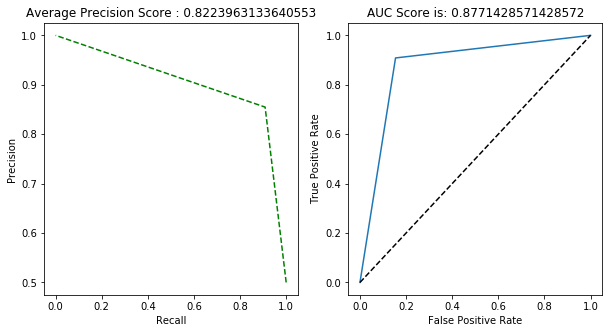

In [217]:
scoreplot(trainY, preds_nn_train)

In [218]:
preds_nn_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 88  29]
 [ 14 145]]
Accuracy = 0.8442028985507246
F1 Score = 0.8708708708708709
Sensitivity :  0.8627450980392157
Specificity :  0.8333333333333334


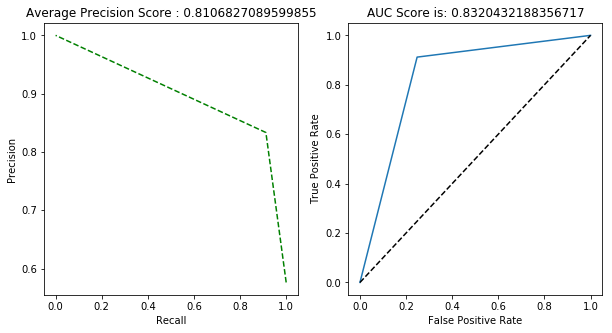

In [219]:
scoreplot(testY, preds_nn_test)

### Stochastic Gradient Descent (SGD)

In [220]:
model = SGDClassifier(loss="hinge", penalty="l2")

In [221]:
model.fit(trainX_fully_preprocessed[col], trainY)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [222]:
model.score(trainX_fully_preprocessed[col], trainY)

0.8685714285714285

In [223]:
model.score(testX_fully_preprocessed[col], testY)

0.8514492753623188

In [224]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "penalty" : ["l2", "l1", "none"],
    "l1_ratio": [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1]
}

model = SGDClassifier(random_state=0, class_weight='balanced')
grid = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, scoring='f1')
grid_result = grid.fit(trainX_fully_preprocessed[col], trainY)

In [225]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8846 using {'alpha': 0.1, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'none'}
mean=0.858, std=0.04033 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l2'}
mean=0.8481, std=0.009776 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l1'}
mean=0.8165, std=0.1333 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'none'}
mean=0.8678, std=0.02916 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l2'}
mean=0.8651, std=0.03106 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l1'}
mean=0.8678, std=0.02916 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'none'}
mean=0.8489, std=0.03872 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l2'}
mean=0.8388, std=0.04586 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l1'}
mean=0.8601, std=0.03107 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'none'

In [226]:
pred_sgd_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[286  64]
 [ 26 324]]
Accuracy = 0.8714285714285714
F1 Score = 0.8780487804878048
Sensitivity :  0.9166666666666666
Specificity :  0.8350515463917526


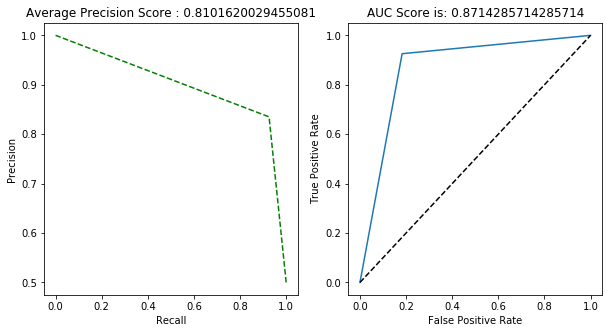

In [227]:
scoreplot(trainY, pred_sgd_train)

In [228]:
pred_sgd_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 84  33]
 [ 12 147]]
Accuracy = 0.8369565217391305
F1 Score = 0.8672566371681416
Sensitivity :  0.875
Specificity :  0.8166666666666667


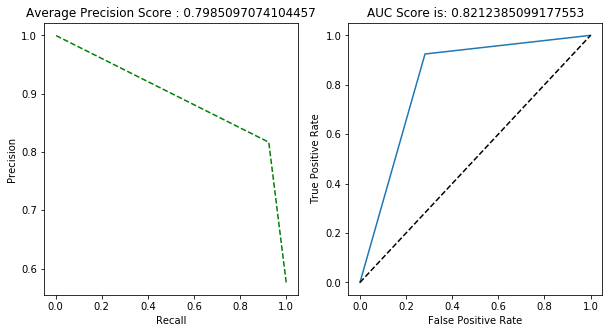

In [229]:
scoreplot(testY, pred_sgd_test)

### XGBoost

In [232]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [233]:
# fit model on training data
eval_set = [(trainX_fully_preprocessed[col], trainY), (testX_fully_preprocessed[col], testY)]
xgb_model.fit(trainX_fully_preprocessed[col], trainY, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(testX_fully_preprocessed[col])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = xgb_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

[0]	validation_0-error:0.148571	validation_0-logloss:0.641596	validation_1-error:0.166667	validation_1-logloss:0.64373
[1]	validation_0-error:0.13	validation_0-logloss:0.593262	validation_1-error:0.177536	validation_1-logloss:0.601527
[2]	validation_0-error:0.12	validation_0-logloss:0.554414	validation_1-error:0.163043	validation_1-logloss:0.56901
[3]	validation_0-error:0.121429	validation_0-logloss:0.522285	validation_1-error:0.163043	validation_1-logloss:0.538441
[4]	validation_0-error:0.118571	validation_0-logloss:0.495096	validation_1-error:0.155797	validation_1-logloss:0.514993
[5]	validation_0-error:0.12	validation_0-logloss:0.471662	validation_1-error:0.155797	validation_1-logloss:0.49316
[6]	validation_0-error:0.12	validation_0-logloss:0.447925	validation_1-error:0.155797	validation_1-logloss:0.474893
[7]	validation_0-error:0.117143	validation_0-logloss:0.428171	validation_1-error:0.163043	validation_1-logloss:0.458849
[8]	validation_0-error:0.111429	validation_0-logloss:0.4105

[69]	validation_0-error:0.105714	validation_0-logloss:0.24678	validation_1-error:0.17029	validation_1-logloss:0.354367
[70]	validation_0-error:0.102857	validation_0-logloss:0.246402	validation_1-error:0.17029	validation_1-logloss:0.354683
[71]	validation_0-error:0.102857	validation_0-logloss:0.246329	validation_1-error:0.17029	validation_1-logloss:0.354251
[72]	validation_0-error:0.105714	validation_0-logloss:0.246079	validation_1-error:0.166667	validation_1-logloss:0.35436
[73]	validation_0-error:0.104286	validation_0-logloss:0.245749	validation_1-error:0.166667	validation_1-logloss:0.35451
[74]	validation_0-error:0.104286	validation_0-logloss:0.245421	validation_1-error:0.166667	validation_1-logloss:0.354213
[75]	validation_0-error:0.105714	validation_0-logloss:0.245149	validation_1-error:0.166667	validation_1-logloss:0.354145
[76]	validation_0-error:0.104286	validation_0-logloss:0.244811	validation_1-error:0.166667	validation_1-logloss:0.35423
[77]	validation_0-error:0.105714	valida

[137]	validation_0-error:0.101429	validation_0-logloss:0.235656	validation_1-error:0.163043	validation_1-logloss:0.367888
[138]	validation_0-error:0.1	validation_0-logloss:0.23554	validation_1-error:0.166667	validation_1-logloss:0.367919
[139]	validation_0-error:0.1	validation_0-logloss:0.23546	validation_1-error:0.163043	validation_1-logloss:0.367769
Accuracy: 83.70%


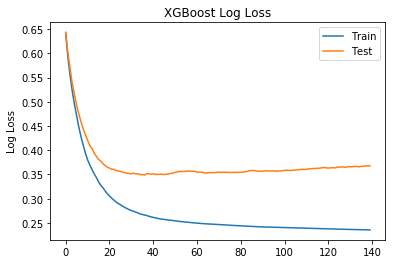

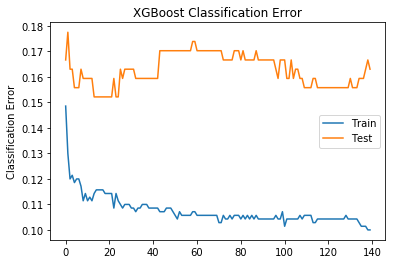

In [234]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [235]:
eval_set = [(testX_fully_preprocessed[col], testY)]
xgb_model.fit(trainX_fully_preprocessed[col], trainY, early_stopping_rounds=20, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(testX_fully_preprocessed[col])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.64373
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.601527
[2]	validation_0-logloss:0.56901
[3]	validation_0-logloss:0.538441
[4]	validation_0-logloss:0.514993
[5]	validation_0-logloss:0.49316
[6]	validation_0-logloss:0.474893
[7]	validation_0-logloss:0.458849
[8]	validation_0-logloss:0.444447
[9]	validation_0-logloss:0.432235
[10]	validation_0-logloss:0.421088
[11]	validation_0-logloss:0.409686
[12]	validation_0-logloss:0.403831
[13]	validation_0-logloss:0.394412
[14]	validation_0-logloss:0.387534
[15]	validation_0-logloss:0.380947
[16]	validation_0-logloss:0.377987
[17]	validation_0-logloss:0.372476
[18]	validation_0-logloss:0.3684
[19]	validation_0-logloss:0.365175
[20]	validation_0-logloss:0.363266
[21]	validation_0-logloss:0.360857
[22]	validation_0-logloss:0.360756
[23]	validation_0-logloss:0.357949
[24]	validation_0-logloss:0.35735
[25]	validation_0-logloss:0.356036
[26]	validation_0-logloss:0.354849
[27

In [236]:
fit_params = {"eval_set":[(testX_fully_preprocessed[col], testY)],
          "early_stopping_rounds":20,
          "eval_metric":"logloss"}

### Tune max_depth and min_child_weight

In [237]:
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.2s


[0]	validation_0-logloss:0.647054
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.607555
[2]	validation_0-logloss:0.576518
[3]	validation_0-logloss:0.548605
[4]	validation_0-logloss:0.526639
[5]	validation_0-logloss:0.507598
[6]	validation_0-logloss:0.490694
[7]	validation_0-logloss:0.476941
[8]	validation_0-logloss:0.464811
[9]	validation_0-logloss:0.4548
[10]	validation_0-logloss:0.445454
[11]	validation_0-logloss:0.431505
[12]	validation_0-logloss:0.425747
[13]	validation_0-logloss:0.415835
[14]	validation_0-logloss:0.40816
[15]	validation_0-logloss:0.401133
[16]	validation_0-logloss:0.398032
[17]	validation_0-logloss:0.390097
[18]	validation_0-logloss:0.385701
[19]	validation_0-logloss:0.381287
[20]	validation_0-logloss:0.37879
[21]	validation_0-logloss:0.374693
[22]	validation_0-logloss:0.374048
[23]	validation_0-logloss:0.371006
[24]	validation_0-logloss:0.370471
[25]	validation_0-logloss:0.367921
[26]	validation_0-logloss:0.366048
[

[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   11.9s finished


[36]	validation_0-logloss:0.348375
[37]	validation_0-logloss:0.349556
[38]	validation_0-logloss:0.348373
[39]	validation_0-logloss:0.346311
[40]	validation_0-logloss:0.345297
[41]	validation_0-logloss:0.344381
[42]	validation_0-logloss:0.343942
[43]	validation_0-logloss:0.343889
[44]	validation_0-logloss:0.343002
[45]	validation_0-logloss:0.342165
[46]	validation_0-logloss:0.342846
[47]	validation_0-logloss:0.343624
[48]	validation_0-logloss:0.344152
[49]	validation_0-logloss:0.344871
[50]	validation_0-logloss:0.345857
[51]	validation_0-logloss:0.346816
[52]	validation_0-logloss:0.347107
[53]	validation_0-logloss:0.346753
[54]	validation_0-logloss:0.346465
[55]	validation_0-logloss:0.346569
[56]	validation_0-logloss:0.346951
[57]	validation_0-logloss:0.347219
[58]	validation_0-logloss:0.347321
[59]	validation_0-logloss:0.347046
[60]	validation_0-logloss:0.34586
[61]	validation_0-logloss:0.345305
[62]	validation_0-logloss:0.345329
[63]	validation_0-logloss:0.344698
[64]	validation_0-log

In [238]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8764 using {'max_depth': 3, 'min_child_weight': 1}
mean=0.8764, std=0.03269 using {'max_depth': 3, 'min_child_weight': 1}
mean=0.8733, std=0.03436 using {'max_depth': 3, 'min_child_weight': 3}
mean=0.871, std=0.0321 using {'max_depth': 3, 'min_child_weight': 5}
mean=0.8681, std=0.02852 using {'max_depth': 5, 'min_child_weight': 1}
mean=0.8742, std=0.03411 using {'max_depth': 5, 'min_child_weight': 3}
mean=0.8705, std=0.03632 using {'max_depth': 5, 'min_child_weight': 5}
mean=0.867, std=0.02836 using {'max_depth': 7, 'min_child_weight': 1}
mean=0.8742, std=0.03411 using {'max_depth': 7, 'min_child_weight': 3}
mean=0.8705, std=0.03632 using {'max_depth': 7, 'min_child_weight': 5}
mean=0.8658, std=0.02922 using {'max_depth': 9, 'min_child_weight': 1}
mean=0.8742, std=0.03411 using {'max_depth': 9, 'min_child_weight': 3}
mean=0.8705, std=0.03632 using {'max_depth': 9, 'min_child_weight': 5}


### Tune gamma

In [239]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [240]:
param_test = {
 'gamma':[i/10.0 for i in range(0,5)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.647054
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.607555
[2]	validation_0-logloss:0.576518
[3]	validation_0-logloss:0.548605
[4]	validation_0-logloss:0.526639
[5]	validation_0-logloss:0.507598
[6]	validation_0-logloss:0.490694
[7]	validation_0-logloss:0.476941
[8]	validation_0-logloss:0.464811
[9]	validation_0-logloss:0.4548
[10]	validation_0-logloss:0.445454
[11]	validation_0-logloss:0.431505
[12]	validation_0-logloss:0.425747
[13]	validation_0-logloss:0.415835
[14]	validation_0-logloss:0.40816
[15]	validation_0-logloss:0.401133
[16]	validation_0-logloss:0.398032
[17]	validation_0-logloss:0.390097
[18]	validation_0-logloss:0.385701
[19]	validation_0-logloss:0.381287
[20]	validation_0-logloss:0.37879
[21]	validation_0-logloss:0.374693
[22]	validation_0-logloss:0.374048
[23]	validation_0-logloss:0.370672
[24]	validation_0-logloss:0.370134
[25]	validation_0-logloss:0.367585
[26]	validation_0-logloss:0.365731
[

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.0s finished


[40]	validation_0-logloss:0.346867
[41]	validation_0-logloss:0.345857
[42]	validation_0-logloss:0.345423
[43]	validation_0-logloss:0.345538
[44]	validation_0-logloss:0.344622
[45]	validation_0-logloss:0.343646
[46]	validation_0-logloss:0.344009
[47]	validation_0-logloss:0.344111
[48]	validation_0-logloss:0.344596
[49]	validation_0-logloss:0.345284
[50]	validation_0-logloss:0.346257
[51]	validation_0-logloss:0.345804
[52]	validation_0-logloss:0.346181
[53]	validation_0-logloss:0.345838
[54]	validation_0-logloss:0.345289
[55]	validation_0-logloss:0.345392
[56]	validation_0-logloss:0.345409
[57]	validation_0-logloss:0.345674
[58]	validation_0-logloss:0.345319
[59]	validation_0-logloss:0.344952
[60]	validation_0-logloss:0.343833
[61]	validation_0-logloss:0.343311
[62]	validation_0-logloss:0.343175
[63]	validation_0-logloss:0.342599
[64]	validation_0-logloss:0.342105
[65]	validation_0-logloss:0.343525
[66]	validation_0-logloss:0.343126
[67]	validation_0-logloss:0.343164
[68]	validation_0-lo

In [241]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8776 using {'gamma': 0.1}
mean=0.8764, std=0.03269 using {'gamma': 0.0}
mean=0.8776, std=0.03228 using {'gamma': 0.1}
mean=0.8764, std=0.03382 using {'gamma': 0.2}
mean=0.8764, std=0.03382 using {'gamma': 0.3}
mean=0.8748, std=0.03431 using {'gamma': 0.4}


### Tune subsample and colsample_bytree

In [242]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [243]:
param_test = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s


[0]	validation_0-logloss:0.647054
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.607555
[2]	validation_0-logloss:0.576518
[3]	validation_0-logloss:0.548605
[4]	validation_0-logloss:0.526639
[5]	validation_0-logloss:0.507598
[6]	validation_0-logloss:0.490694
[7]	validation_0-logloss:0.476941
[8]	validation_0-logloss:0.464811
[9]	validation_0-logloss:0.4548
[10]	validation_0-logloss:0.445454
[11]	validation_0-logloss:0.431505
[12]	validation_0-logloss:0.425747
[13]	validation_0-logloss:0.415835
[14]	validation_0-logloss:0.40816
[15]	validation_0-logloss:0.401133
[16]	validation_0-logloss:0.398032
[17]	validation_0-logloss:0.390097
[18]	validation_0-logloss:0.385701
[19]	validation_0-logloss:0.381287
[20]	validation_0-logloss:0.37879
[21]	validation_0-logloss:0.374693
[22]	validation_0-logloss:0.374048
[23]	validation_0-logloss:0.370672
[24]	validation_0-logloss:0.370134
[25]	validation_0-logloss:0.367585
[26]	validation_0-logloss:0.365731
[

[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    8.9s finished


[37]	validation_0-logloss:0.351613
[38]	validation_0-logloss:0.3502
[39]	validation_0-logloss:0.347899
[40]	validation_0-logloss:0.346867
[41]	validation_0-logloss:0.345857
[42]	validation_0-logloss:0.345423
[43]	validation_0-logloss:0.345538
[44]	validation_0-logloss:0.344622
[45]	validation_0-logloss:0.343646
[46]	validation_0-logloss:0.344009
[47]	validation_0-logloss:0.344111
[48]	validation_0-logloss:0.344596
[49]	validation_0-logloss:0.345284
[50]	validation_0-logloss:0.346257
[51]	validation_0-logloss:0.345804
[52]	validation_0-logloss:0.346181
[53]	validation_0-logloss:0.345838
[54]	validation_0-logloss:0.345289
[55]	validation_0-logloss:0.345392
[56]	validation_0-logloss:0.345409
[57]	validation_0-logloss:0.345674
[58]	validation_0-logloss:0.345319
[59]	validation_0-logloss:0.344952
[60]	validation_0-logloss:0.343833
[61]	validation_0-logloss:0.343311
[62]	validation_0-logloss:0.343175
[63]	validation_0-logloss:0.342599
[64]	validation_0-logloss:0.342105
[65]	validation_0-logl

In [244]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8776 using {'colsample_bytree': 0.8, 'subsample': 0.8}
mean=0.8739, std=0.03174 using {'colsample_bytree': 0.6, 'subsample': 0.6}
mean=0.8727, std=0.03566 using {'colsample_bytree': 0.6, 'subsample': 0.7}
mean=0.8741, std=0.03951 using {'colsample_bytree': 0.6, 'subsample': 0.8}
mean=0.8765, std=0.03572 using {'colsample_bytree': 0.6, 'subsample': 0.9}
mean=0.8742, std=0.0297 using {'colsample_bytree': 0.7, 'subsample': 0.6}
mean=0.8745, std=0.0364 using {'colsample_bytree': 0.7, 'subsample': 0.7}
mean=0.8748, std=0.03431 using {'colsample_bytree': 0.7, 'subsample': 0.8}
mean=0.8711, std=0.03702 using {'colsample_bytree': 0.7, 'subsample': 0.9}
mean=0.872, std=0.0321 using {'colsample_bytree': 0.8, 'subsample': 0.6}
mean=0.8692, std=0.03414 using {'colsample_bytree': 0.8, 'subsample': 0.7}
mean=0.8776, std=0.03228 using {'colsample_bytree': 0.8, 'subsample': 0.8}
mean=0.8703, std=0.03323 using {'colsample_bytree': 0.8, 'subsample': 0.9}
mean=0.8749, std=0.03097 usin

### Tuning Regularization Parameters

In [245]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [246]:
param_test = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.647054
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.607555
[2]	validation_0-logloss:0.576518
[3]	validation_0-logloss:0.548605
[4]	validation_0-logloss:0.526639
[5]	validation_0-logloss:0.507598
[6]	validation_0-logloss:0.490694
[7]	validation_0-logloss:0.476941
[8]	validation_0-logloss:0.464811
[9]	validation_0-logloss:0.4548
[10]	validation_0-logloss:0.445454
[11]	validation_0-logloss:0.431505
[12]	validation_0-logloss:0.425747
[13]	validation_0-logloss:0.415835
[14]	validation_0-logloss:0.40816
[15]	validation_0-logloss:0.401133
[16]	validation_0-logloss:0.398032
[17]	validation_0-logloss:0.390097
[18]	validation_0-logloss:0.385701
[19]	validation_0-logloss:0.381287
[20]	validation_0-logloss:0.37879
[21]	validation_0-logloss:0.374693
[22]	validation_0-logloss:0.374048
[23]	validation_0-logloss:0.370672
[24]	validation_0-logloss:0.370134
[25]	validation_0-logloss:0.367585
[26]	validation_0-logloss:0.365731
[

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.1s finished


[34]	validation_0-logloss:0.351097
[35]	validation_0-logloss:0.350754
[36]	validation_0-logloss:0.350375
[37]	validation_0-logloss:0.351613
[38]	validation_0-logloss:0.3502
[39]	validation_0-logloss:0.347899
[40]	validation_0-logloss:0.346867
[41]	validation_0-logloss:0.345857
[42]	validation_0-logloss:0.345423
[43]	validation_0-logloss:0.345538
[44]	validation_0-logloss:0.344622
[45]	validation_0-logloss:0.343646
[46]	validation_0-logloss:0.344009
[47]	validation_0-logloss:0.344111
[48]	validation_0-logloss:0.344596
[49]	validation_0-logloss:0.345284
[50]	validation_0-logloss:0.346257
[51]	validation_0-logloss:0.345804
[52]	validation_0-logloss:0.346181
[53]	validation_0-logloss:0.345838
[54]	validation_0-logloss:0.345289
[55]	validation_0-logloss:0.345392
[56]	validation_0-logloss:0.345409
[57]	validation_0-logloss:0.345674
[58]	validation_0-logloss:0.345319
[59]	validation_0-logloss:0.344952
[60]	validation_0-logloss:0.343833
[61]	validation_0-logloss:0.343311
[62]	validation_0-logl

In [247]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8776 using {'reg_alpha': 1e-05}
mean=0.8776, std=0.03228 using {'reg_alpha': 1e-05}
mean=0.8776, std=0.03228 using {'reg_alpha': 0.01}
mean=0.8735, std=0.03489 using {'reg_alpha': 0.1}
mean=0.8719, std=0.03542 using {'reg_alpha': 1}
mean=0.0, std=0.0 using {'reg_alpha': 100}


### Reducing Learning Rate

In [248]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3, reg_alpha=1e-05,
                        min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [249]:
param_test = {
 'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(trainX_fully_preprocessed[col], trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.647054
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.607555
[2]	validation_0-logloss:0.576518
[3]	validation_0-logloss:0.548605
[4]	validation_0-logloss:0.526639
[5]	validation_0-logloss:0.507598
[6]	validation_0-logloss:0.490694
[7]	validation_0-logloss:0.476941
[8]	validation_0-logloss:0.464811
[9]	validation_0-logloss:0.4548
[10]	validation_0-logloss:0.445454
[11]	validation_0-logloss:0.431505
[12]	validation_0-logloss:0.425747
[13]	validation_0-logloss:0.415835
[14]	validation_0-logloss:0.40816
[15]	validation_0-logloss:0.401133
[16]	validation_0-logloss:0.398032
[17]	validation_0-logloss:0.390097
[18]	validation_0-logloss:0.385701
[19]	validation_0-logloss:0.381287
[20]	validation_0-logloss:0.37879
[21]	validation_0-logloss:0.374693
[22]	validation_0-logloss:0.374048
[23]	validation_0-logloss:0.370672
[24]	validation_0-logloss:0.370134
[25]	validation_0-logloss:0.367585
[26]	validation_0-logloss:0.365731
[

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.7s finished


[31]	validation_0-logloss:0.356575
[32]	validation_0-logloss:0.353902
[33]	validation_0-logloss:0.353693
[34]	validation_0-logloss:0.351097
[35]	validation_0-logloss:0.350754
[36]	validation_0-logloss:0.350375
[37]	validation_0-logloss:0.351613
[38]	validation_0-logloss:0.3502
[39]	validation_0-logloss:0.347899
[40]	validation_0-logloss:0.346867
[41]	validation_0-logloss:0.345857
[42]	validation_0-logloss:0.345423
[43]	validation_0-logloss:0.345538
[44]	validation_0-logloss:0.344622
[45]	validation_0-logloss:0.343646
[46]	validation_0-logloss:0.344009
[47]	validation_0-logloss:0.344111
[48]	validation_0-logloss:0.344596
[49]	validation_0-logloss:0.345284
[50]	validation_0-logloss:0.346257
[51]	validation_0-logloss:0.345804
[52]	validation_0-logloss:0.346181
[53]	validation_0-logloss:0.345838
[54]	validation_0-logloss:0.345289
[55]	validation_0-logloss:0.345392
[56]	validation_0-logloss:0.345409
[57]	validation_0-logloss:0.345674
[58]	validation_0-logloss:0.345319
[59]	validation_0-logl

In [250]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8776 using {'learning_rate': 0.1}
mean=0.8598, std=0.02868 using {'learning_rate': 0.001}
mean=0.8721, std=0.02704 using {'learning_rate': 0.01}
mean=0.8776, std=0.03228 using {'learning_rate': 0.1}
mean=0.872, std=0.03341 using {'learning_rate': 0.2}
mean=0.8711, std=0.03579 using {'learning_rate': 0.3}


In [251]:
xgb_pred_train = grid.predict(trainX_fully_preprocessed[col])

Confusion Matrix : 
 [[313  37]
 [ 40 310]]
Accuracy = 0.89
F1 Score = 0.8895265423242467
Sensitivity :  0.886685552407932
Specificity :  0.8933717579250721


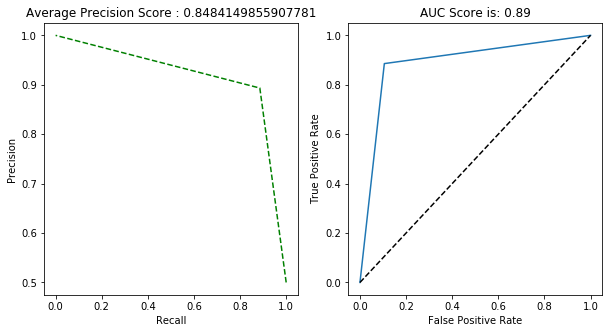

In [252]:
scoreplot(trainY, xgb_pred_train)

In [253]:
xgb_pred_test = grid.predict(testX_fully_preprocessed[col])

Confusion Matrix : 
 [[ 92  25]
 [ 22 137]]
Accuracy = 0.8297101449275363
F1 Score = 0.853582554517134
Sensitivity :  0.8070175438596491
Specificity :  0.845679012345679


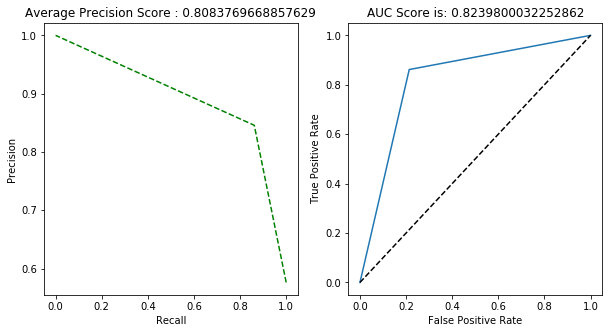

In [254]:
scoreplot(testY, xgb_pred_test)

### StandardScaler

In [721]:
train, test = sklearn.model_selection.train_test_split(heart_disease_df, test_size=.3, random_state=10)

In [722]:
# split the data into the X and Y variables
trainY = train["target"].copy()
trainX = train.drop("target", axis=1)
testY = test["target"].copy()
testX = test.drop("target", axis=1)

In [723]:
# Handle the discrete and continuous variables seperatly
trainX_continuous = trainX[CONTINUOUS_FACTORS]
trainX_discrete = trainX[DISCRETE_FACTORS]

testX_continuous = testX[CONTINUOUS_FACTORS]
testX_discrete = testX[DISCRETE_FACTORS]

### Covert to standard Scaler

In [724]:
# Create a scaling object
scaler = StandardScaler()

# Scale these variables using 'fit_transform'
trainX_continuous[CONTINUOUS_FACTORS] = scaler.fit_transform(trainX_continuous)
trainX_continuous_scaled = trainX_continuous.copy()

In [725]:
# Convert into dummies
trainX_discrete_one_hot = pd.get_dummies(trainX_discrete, drop_first=True)
trainX_discrete_one_hot.head()

ca_1.0  ca_2.0  ca_3.0  cp_2.0  cp_3.0  cp_4.0  exang_1.0  fbs_1.0  \
289       0       0       0       0       0       1          1        0   
7         0       0       0       0       0       1          1        0   
62        0       0       0       1       0       0          0        0   
184       0       0       0       0       0       1          1        0   
141       0       0       0       1       0       0          0        1   

     restecg_1.0  restecg_2.0  sex_1.0  slope_2.0  slope_3.0  thal_6.0  \
289            0            0        1          1          0         0   
7              0            0        0          0          0         0   
62             1            0        0          0          0         0   
184            1            0        0          1          0         0   
141            0            0        0          0          0         0   

     thal_7.0  
289         1  
7           0  
62          0  
184         0  
141         0

In [726]:
trainX_fully_preprocessed = pd.concat([trainX_continuous_scaled, trainX_discrete_one_hot], axis = 1)
trainX_fully_preprocessed.head()

age      chol   oldpeak   thalach  trestbps  ca_1.0  ca_2.0  ca_3.0  \
289 -0.137354  1.183345  1.593030 -1.716027  1.426093       0       0       0   
7    0.399394  1.396311 -0.233413  1.006016 -0.667747       0       0       0   
62  -1.103500  0.424077 -0.810185  1.518865 -0.667747       0       0       0   
184  0.828792  0.840748  0.151101 -0.690329 -0.144287       0       0       0   
141  0.077345  0.248148 -0.810185  0.098669 -0.667747       0       0       0   

     cp_2.0  cp_3.0  cp_4.0  exang_1.0  fbs_1.0  restecg_1.0  restecg_2.0  \
289       0       0       1          1        0            0            0   
7         0       0       1          1        0            0            0   
62        1       0       0          0        0            1            0   
184       0       0       1          1        0            1            0   
141       1       0       0          0        1            0            0   

     sex_1.0  slope_2.0  slope_3.0  thal_6.0  thal_7.0  
289        1          1          0         0         1  
7          0          0          0         0         0  
62         0          0          0         0         0  
184        0          1          0         0         0  
141        0          0          0         0         0

In [727]:
# preprocess the test data, note the use of transform instead of fit_transform
testX_continuous[CONTINUOUS_FACTORS] = scaler.fit_transform(testX_continuous)
testX_continuous_scaled = testX_continuous.copy()
testX_discrete_one_hot = pd.get_dummies(testX_discrete, drop_first=True)
testX_fully_preprocessed = pd.concat([testX_continuous_scaled, testX_discrete_one_hot], axis = 1)

In [728]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainY==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainY==0)))

Before OverSampling, counts of label '1': 350
Before OverSampling, counts of label '0': 294 



In [729]:
smt = SMOTE(random_state=2)
trainX_fully_preprocessed, trainY = smt.fit_sample(trainX_fully_preprocessed, trainY.ravel())

In [730]:
print('After OverSampling, the shape of train_X: {}'.format(trainX_fully_preprocessed.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainY.shape))

After OverSampling, the shape of train_X: (700, 20)
After OverSampling, the shape of train_y: (700,) 



In [731]:
print("After OverSampling, counts of label '1': {}".format(sum(trainY==1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainY==0)))

After OverSampling, counts of label '1': 350
After OverSampling, counts of label '0': 350


In [732]:
trainX_fully_preprocessed.head()

age      chol   oldpeak   thalach  trestbps  ca_1.0  ca_2.0  ca_3.0  \
0 -0.137354  1.183345  1.593030 -1.716027  1.426093       0       0       0   
1  0.399394  1.396311 -0.233413  1.006016 -0.667747       0       0       0   
2 -1.103500  0.424077 -0.810185  1.518865 -0.667747       0       0       0   
3  0.828792  0.840748  0.151101 -0.690329 -0.144287       0       0       0   
4  0.077345  0.248148 -0.810185  0.098669 -0.667747       0       0       0   

   cp_2.0  cp_3.0  cp_4.0  exang_1.0  fbs_1.0  restecg_1.0  restecg_2.0  \
0       0       0       1          1        0            0            0   
1       0       0       1          1        0            0            0   
2       1       0       0          0        0            1            0   
3       0       0       1          1        0            1            0   
4       1       0       0          0        1            0            0   

   sex_1.0  slope_2.0  slope_3.0  thal_6.0  thal_7.0  
0        1          1          0         0         1  
1        0          0          0         0         0  
2        0          0          0         0         0  
3        0          1          0         0         0  
4        0          0          0         0         0

In [733]:
trainX_fully_preprocessed.shape

(700, 20)

### Principal Component Analysis (PCA)

In [1072]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [1073]:
#Doing the PCA on the train data
pca.fit(trainX_fully_preprocessed)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them

In [1074]:
pca.components_

array([[ 5.09248629e-01, -2.02892850e-01,  4.18891597e-01,
        -5.09143441e-01,  2.73421597e-01,  4.87919872e-02,
         1.03213344e-01,  1.25517983e-02, -1.19521076e-01,
        -5.26128996e-02,  1.78779416e-01,  1.90838029e-01,
         4.94867429e-02,  5.78968810e-02,  2.12791586e-02,
         6.91296009e-02,  1.88079848e-01,  3.80593784e-02,
         4.97016458e-03,  2.08657533e-01],
       [-9.48737261e-02, -6.80722677e-01, -3.02829268e-01,
        -3.27603943e-01, -5.51796893e-01,  3.12700618e-02,
         5.91313008e-03, -1.48825688e-02, -2.28915987e-02,
        -1.05117260e-02,  4.53408907e-02, -3.01232448e-02,
        -6.77630858e-02,  2.73210731e-02, -8.44133873e-02,
         6.83220340e-02,  2.50096140e-02, -5.71530087e-03,
         8.26641716e-03,  3.76246651e-02],
       [-2.67863068e-01,  1.90150516e-01,  6.80760053e-01,
         8.42015273e-02, -5.93140230e-01,  4.55467537e-02,
        -3.96645517e-02,  1.23464837e-02, -6.70971783e-02,
        -5.05506955e-02,  1.2

In [1075]:
colnames = list(trainX_fully_preprocessed.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2   Feature
0  0.509249 -0.094874       age
1 -0.202893 -0.680723      chol
2  0.418892 -0.302829   oldpeak
3 -0.509143 -0.327604   thalach
4  0.273422 -0.551797  trestbps

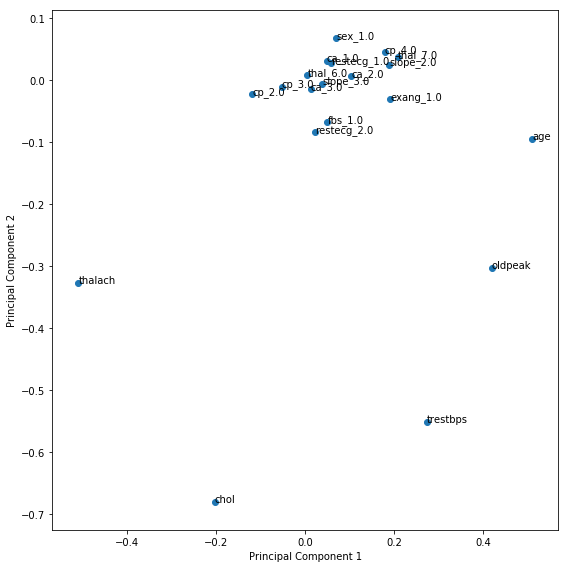

In [1076]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

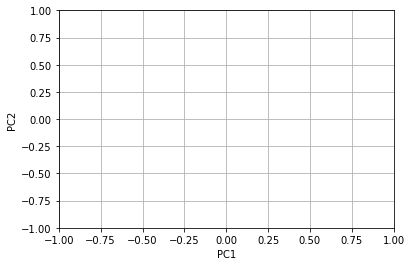

In [1077]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = trainY)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#### Looking at the screeplot to assess the number of needed principal components

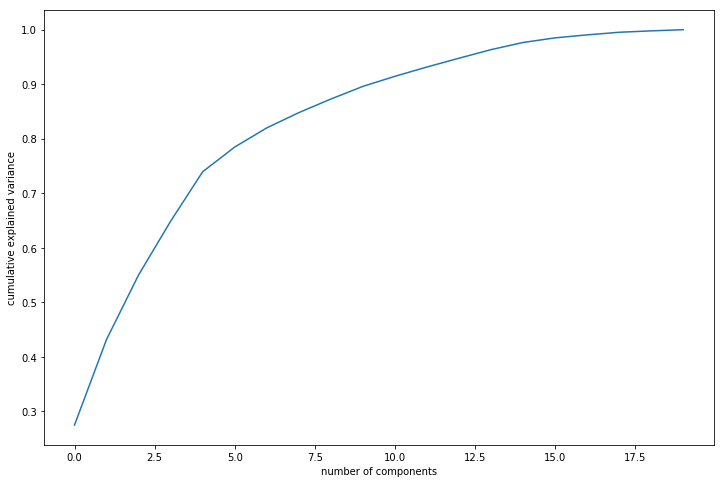

In [1078]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 13 components are enough to describe 95% of the variance in the dataset

In [1079]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=13)

In [1080]:
df_train_pca = pca_final.fit_transform(trainX_fully_preprocessed)
df_train_pca.shape

(700, 13)

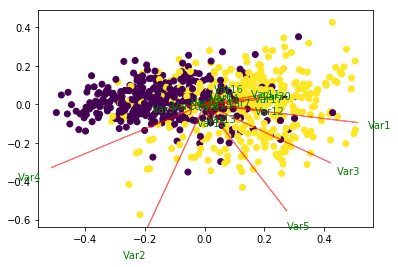

In [1081]:
#Call the function. Use only the 2 PCs.
myplot(df_train_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [1082]:
pca_final.explained_variance_ratio_

array([0.27471306, 0.15702859, 0.11830452, 0.0985597 , 0.09067846,
       0.04529705, 0.03506164, 0.02794356, 0.0246083 , 0.02287925,
       0.01805118, 0.01674811, 0.01583785])

In [1083]:
# number of components
n_pcs= pca_final.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca_final.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = trainX_fully_preprocessed.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame.from_dict(dic, orient='index')
print(df)

                0
PC0           age
PC1          chol
PC2       oldpeak
PC3          chol
PC4           age
PC5        cp_4.0
PC6        cp_3.0
PC7     slope_2.0
PC8   restecg_2.0
PC9        cp_2.0
PC10      sex_1.0
PC11       ca_1.0
PC12    exang_1.0


#### Creating correlation matrix for the principal components - we expect little to no correlation

In [1084]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

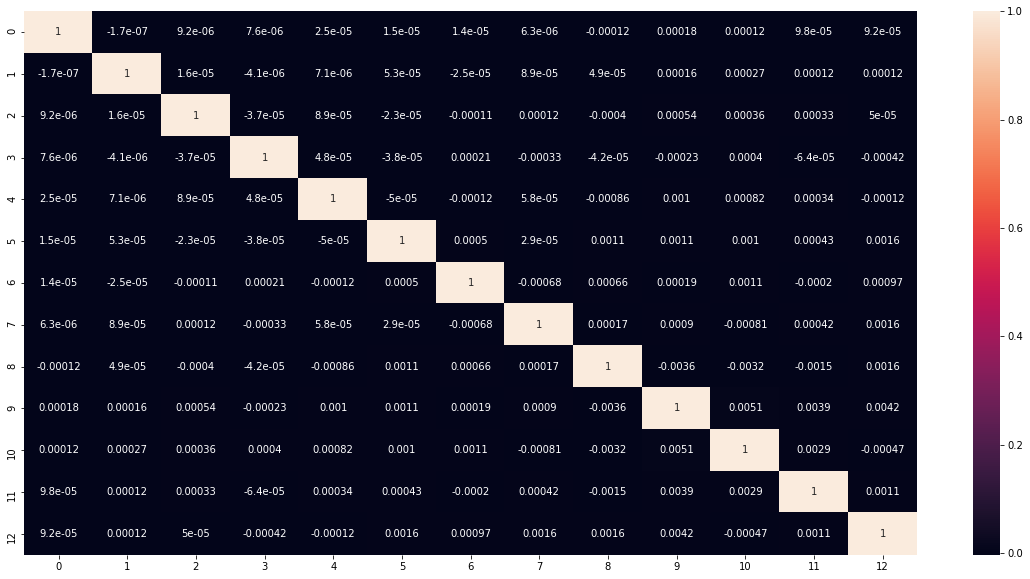

In [1085]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [1086]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.005058702962288169 , min corr:  -0.0035987832880512135


#### Indeed - there is no correlation between any two components!

In [1087]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(testX_fully_preprocessed)
df_test_pca.shape

(276, 13)

In [1088]:
def valueMapping(n):
    if n==0:
        return 'green'
    elif n==1:
        return 'red'

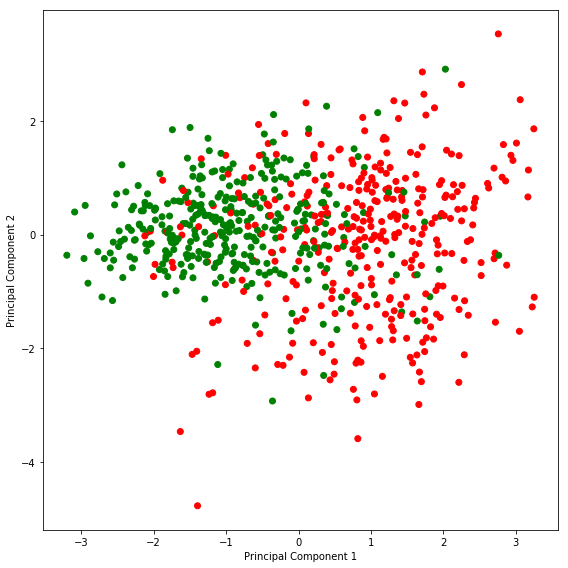

In [1089]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = list(map(valueMapping, trainY)))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Stochastic Gradient Descent (SGD)

In [1090]:
model = SGDClassifier(loss="log", penalty="l2")

In [1091]:
model.fit(df_train_pca, trainY)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [1092]:
model.score(df_train_pca, trainY)

0.8442857142857143

In [1093]:
model.score(df_test_pca, testY)

0.7681159420289855

In [294]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "penalty" : ["l2", "l1", "none"],
    "l1_ratio": [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1]
}

model = SGDClassifier(random_state=0, class_weight='balanced')
grid = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, scoring='f1')
grid_result = grid.fit(df_train_pca, trainY)

In [295]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8936 using {'alpha': 0.01, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'none'}
mean=0.8695, std=0.04201 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l2'}
mean=0.8642, std=0.0315 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'l1'}
mean=0.8817, std=0.03484 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'hinge', 'penalty': 'none'}
mean=0.8706, std=0.03282 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l2'}
mean=0.884, std=0.02479 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'l1'}
mean=0.8671, std=0.04002 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'penalty': 'none'}
mean=0.7904, std=0.08502 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l2'}
mean=0.8261, std=0.02014 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'l1'}
mean=0.8485, std=0.05001 using {'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'squared_hinge', 'penalty': 'none'}


In [296]:
pred_sgd_train = grid.predict(df_train_pca)

Confusion Matrix : 
 [[313  37]
 [ 35 315]]
Accuracy = 0.8971428571428571
F1 Score = 0.8974358974358975
Sensitivity :  0.8994252873563219
Specificity :  0.8948863636363636


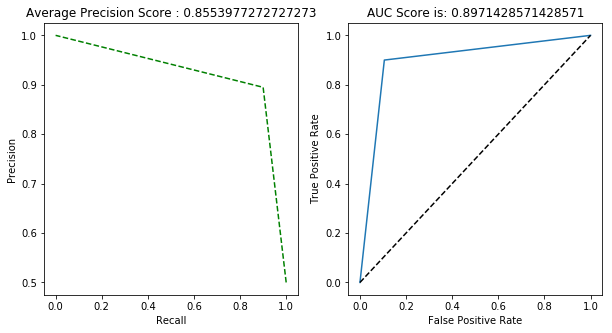

In [297]:
scoreplot(trainY, pred_sgd_train)

In [298]:
pred_sgd_test = grid.predict(df_test_pca)

Confusion Matrix : 
 [[ 95  22]
 [ 14 145]]
Accuracy = 0.8695652173913043
F1 Score = 0.8895705521472391
Sensitivity :  0.8715596330275229
Specificity :  0.8682634730538922


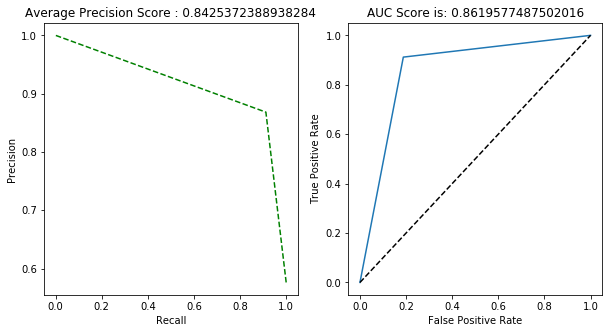

In [300]:
scoreplot(testY, pred_sgd_test)

### XGBoost

In [409]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [410]:
# fit model on training data
eval_set = [(df_train_pca, trainY), (df_test_pca, testY)]
xgb_model.fit(df_train_pca, trainY, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(df_test_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = xgb_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

[0]	validation_0-error:0.11	validation_0-logloss:0.632276	validation_1-error:0.224638	validation_1-logloss:0.648664
[1]	validation_0-error:0.091429	validation_0-logloss:0.579867	validation_1-error:0.213768	validation_1-logloss:0.611045
[2]	validation_0-error:0.087143	validation_0-logloss:0.539619	validation_1-error:0.199275	validation_1-logloss:0.583539
[3]	validation_0-error:0.075714	validation_0-logloss:0.505726	validation_1-error:0.195652	validation_1-logloss:0.566056
[4]	validation_0-error:0.061429	validation_0-logloss:0.475413	validation_1-error:0.188406	validation_1-logloss:0.549358
[5]	validation_0-error:0.064286	validation_0-logloss:0.450907	validation_1-error:0.181159	validation_1-logloss:0.5371
[6]	validation_0-error:0.062857	validation_0-logloss:0.422456	validation_1-error:0.173913	validation_1-logloss:0.518026
[7]	validation_0-error:0.057143	validation_0-logloss:0.396217	validation_1-error:0.188406	validation_1-logloss:0.501949
[8]	validation_0-error:0.055714	validation_0-l

[69]	validation_0-error:0.004286	validation_0-logloss:0.072091	validation_1-error:0.166667	validation_1-logloss:0.40939
[70]	validation_0-error:0.004286	validation_0-logloss:0.070511	validation_1-error:0.17029	validation_1-logloss:0.409202
[71]	validation_0-error:0.004286	validation_0-logloss:0.069568	validation_1-error:0.17029	validation_1-logloss:0.409144
[72]	validation_0-error:0.004286	validation_0-logloss:0.068398	validation_1-error:0.17029	validation_1-logloss:0.408054
[73]	validation_0-error:0.004286	validation_0-logloss:0.067107	validation_1-error:0.173913	validation_1-logloss:0.410013
[74]	validation_0-error:0.004286	validation_0-logloss:0.066364	validation_1-error:0.17029	validation_1-logloss:0.40956
[75]	validation_0-error:0.004286	validation_0-logloss:0.06552	validation_1-error:0.166667	validation_1-logloss:0.410769
[76]	validation_0-error:0.004286	validation_0-logloss:0.06466	validation_1-error:0.17029	validation_1-logloss:0.4107
[77]	validation_0-error:0.004286	validation

Accuracy: 82.97%


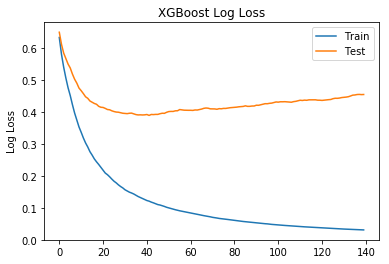

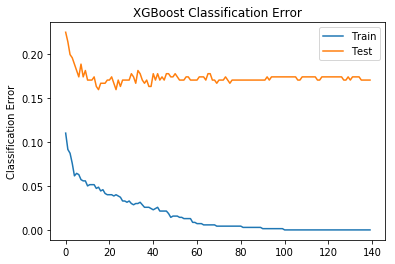

In [411]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [437]:
eval_set = [(df_test_pca, testY)]
xgb_model.fit(df_train_pca, trainY, early_stopping_rounds=5, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model.predict(df_test_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.652645
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.618392
[2]	validation_0-logloss:0.592847
[3]	validation_0-logloss:0.578279
[4]	validation_0-logloss:0.563014
[5]	validation_0-logloss:0.554095
[6]	validation_0-logloss:0.53831
[7]	validation_0-logloss:0.521986
[8]	validation_0-logloss:0.513871
[9]	validation_0-logloss:0.498378
[10]	validation_0-logloss:0.492153
[11]	validation_0-logloss:0.482021
[12]	validation_0-logloss:0.473834
[13]	validation_0-logloss:0.470827
[14]	validation_0-logloss:0.465858
[15]	validation_0-logloss:0.46226
[16]	validation_0-logloss:0.456612
[17]	validation_0-logloss:0.453999
[18]	validation_0-logloss:0.447887
[19]	validation_0-logloss:0.446174
[20]	validation_0-logloss:0.440509
[21]	validation_0-logloss:0.436669
[22]	validation_0-logloss:0.432423
[23]	validation_0-logloss:0.431291
[24]	validation_0-logloss:0.429989
[25]	validation_0-logloss:0.428096
[26]	validation_0-logloss:0.426072


In [438]:
fit_params = {"eval_set":[(df_test_pca, testY)],
          "early_stopping_rounds":5,
          "eval_metric":"logloss"}

### Tune max_depth and min_child_weight

In [439]:
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(df_train_pca, trainY, **fit_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.0s


[0]	validation_0-logloss:0.652561
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.619418
[2]	validation_0-logloss:0.591841
[3]	validation_0-logloss:0.573299
[4]	validation_0-logloss:0.557776
[5]	validation_0-logloss:0.546928
[6]	validation_0-logloss:0.531456
[7]	validation_0-logloss:0.51747
[8]	validation_0-logloss:0.51016
[9]	validation_0-logloss:0.496621
[10]	validation_0-logloss:0.488997
[11]	validation_0-logloss:0.478277
[12]	validation_0-logloss:0.469511
[13]	validation_0-logloss:0.466585
[14]	validation_0-logloss:0.461184
[15]	validation_0-logloss:0.455402
[16]	validation_0-logloss:0.450282
[17]	validation_0-logloss:0.447339
[18]	validation_0-logloss:0.442784
[19]	validation_0-logloss:0.440156


[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    7.3s finished


[20]	validation_0-logloss:0.438521
[21]	validation_0-logloss:0.43766
[22]	validation_0-logloss:0.432553
[23]	validation_0-logloss:0.433937
[24]	validation_0-logloss:0.42901
[25]	validation_0-logloss:0.425238
[26]	validation_0-logloss:0.423805
[27]	validation_0-logloss:0.423165
[28]	validation_0-logloss:0.421026
[29]	validation_0-logloss:0.419437
[30]	validation_0-logloss:0.418034
[31]	validation_0-logloss:0.415622
[32]	validation_0-logloss:0.414802
[33]	validation_0-logloss:0.412561
[34]	validation_0-logloss:0.40969
[35]	validation_0-logloss:0.409178
[36]	validation_0-logloss:0.40756
[37]	validation_0-logloss:0.407871
[38]	validation_0-logloss:0.406426
[39]	validation_0-logloss:0.406085
[40]	validation_0-logloss:0.406267
[41]	validation_0-logloss:0.403389
[42]	validation_0-logloss:0.404324
[43]	validation_0-logloss:0.40548
[44]	validation_0-logloss:0.406313
[45]	validation_0-logloss:0.40543
[46]	validation_0-logloss:0.405741
Stopping. Best iteration:
[41]	validation_0-logloss:0.403389


In [440]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8838 using {'max_depth': 3, 'min_child_weight': 5}
mean=0.8794, std=0.02283 using {'max_depth': 3, 'min_child_weight': 1}
mean=0.8825, std=0.02261 using {'max_depth': 3, 'min_child_weight': 3}
mean=0.8838, std=0.03242 using {'max_depth': 3, 'min_child_weight': 5}
mean=0.8712, std=0.01654 using {'max_depth': 5, 'min_child_weight': 1}
mean=0.8793, std=0.02757 using {'max_depth': 5, 'min_child_weight': 3}
mean=0.8831, std=0.03081 using {'max_depth': 5, 'min_child_weight': 5}
mean=0.8748, std=0.01641 using {'max_depth': 7, 'min_child_weight': 1}
mean=0.875, std=0.0241 using {'max_depth': 7, 'min_child_weight': 3}
mean=0.873, std=0.02766 using {'max_depth': 7, 'min_child_weight': 5}
mean=0.8829, std=0.02869 using {'max_depth': 9, 'min_child_weight': 1}
mean=0.8811, std=0.02857 using {'max_depth': 9, 'min_child_weight': 3}
mean=0.873, std=0.02766 using {'max_depth': 9, 'min_child_weight': 5}


### Tune gamma

In [441]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [442]:
param_test = {
 'gamma':[i/10.0 for i in range(0,5)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(df_train_pca, trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.652561
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.619418
[2]	validation_0-logloss:0.591841
[3]	validation_0-logloss:0.573299
[4]	validation_0-logloss:0.557776
[5]	validation_0-logloss:0.546928
[6]	validation_0-logloss:0.531455
[7]	validation_0-logloss:0.51747
[8]	validation_0-logloss:0.51016
[9]	validation_0-logloss:0.496621
[10]	validation_0-logloss:0.488997
[11]	validation_0-logloss:0.478277
[12]	validation_0-logloss:0.469511
[13]	validation_0-logloss:0.466585
[14]	validation_0-logloss:0.461184
[15]	validation_0-logloss:0.455402
[16]	validation_0-logloss:0.450282
[17]	validation_0-logloss:0.447339
[18]	validation_0-logloss:0.442784
[19]	validation_0-logloss:0.440156
[20]	validation_0-logloss:0.438521
[21]	validation_0-logloss:0.43766
[22]	validation_0-logloss:0.432553
[23]	validation_0-logloss:0.433937
[24]	validation_0-logloss:0.429142
[25]	validation_0-logloss:0.425369
[26]	validation_0-logloss:0.423935
[

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    2.2s finished


[31]	validation_0-logloss:0.416197
[32]	validation_0-logloss:0.415365
[33]	validation_0-logloss:0.413126
[34]	validation_0-logloss:0.41025
[35]	validation_0-logloss:0.409751
[36]	validation_0-logloss:0.408144
[37]	validation_0-logloss:0.408443
[38]	validation_0-logloss:0.406776
[39]	validation_0-logloss:0.406455
[40]	validation_0-logloss:0.40665
[41]	validation_0-logloss:0.403776
[42]	validation_0-logloss:0.404712
[43]	validation_0-logloss:0.405856
[44]	validation_0-logloss:0.406668
[45]	validation_0-logloss:0.405787
[46]	validation_0-logloss:0.406099
Stopping. Best iteration:
[41]	validation_0-logloss:0.403776



In [443]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8842 using {'gamma': 0.0}
mean=0.8842, std=0.03088 using {'gamma': 0.0}
mean=0.8838, std=0.03242 using {'gamma': 0.1}
mean=0.8838, std=0.03242 using {'gamma': 0.2}
mean=0.8824, std=0.02676 using {'gamma': 0.3}
mean=0.8827, std=0.03065 using {'gamma': 0.4}


### Tune subsample and colsample_bytree

In [444]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=5, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [445]:
param_test = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(df_train_pca, trainY, **fit_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.4s


[0]	validation_0-logloss:0.656525
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.627386
[2]	validation_0-logloss:0.599884
[3]	validation_0-logloss:0.58333
[4]	validation_0-logloss:0.570344
[5]	validation_0-logloss:0.560197
[6]	validation_0-logloss:0.544502
[7]	validation_0-logloss:0.528513
[8]	validation_0-logloss:0.518939
[9]	validation_0-logloss:0.503724
[10]	validation_0-logloss:0.498491
[11]	validation_0-logloss:0.489026
[12]	validation_0-logloss:0.480409
[13]	validation_0-logloss:0.47587
[14]	validation_0-logloss:0.471699
[15]	validation_0-logloss:0.464857
[16]	validation_0-logloss:0.459669
[17]	validation_0-logloss:0.458031
[18]	validation_0-logloss:0.452201
[19]	validation_0-logloss:0.449887
[20]	validation_0-logloss:0.445113
[21]	validation_0-logloss:0.443388
[22]	validation_0-logloss:0.436398
[23]	validation_0-logloss:0.436856
[24]	validation_0-logloss:0.434791
[25]	validation_0-logloss:0.430373
[26]	validation_0-logloss:0.427762


[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    6.9s finished


[31]	validation_0-logloss:0.420031
[32]	validation_0-logloss:0.417043
[33]	validation_0-logloss:0.417119
[34]	validation_0-logloss:0.413812
[35]	validation_0-logloss:0.410081
[36]	validation_0-logloss:0.408391
[37]	validation_0-logloss:0.409554
[38]	validation_0-logloss:0.408628
[39]	validation_0-logloss:0.409532
[40]	validation_0-logloss:0.410769
[41]	validation_0-logloss:0.407324
[42]	validation_0-logloss:0.409375
[43]	validation_0-logloss:0.40751
[44]	validation_0-logloss:0.405861
[45]	validation_0-logloss:0.405846
[46]	validation_0-logloss:0.404198
[47]	validation_0-logloss:0.403166
[48]	validation_0-logloss:0.403372
[49]	validation_0-logloss:0.404386
[50]	validation_0-logloss:0.405343
[51]	validation_0-logloss:0.405878
[52]	validation_0-logloss:0.404456
Stopping. Best iteration:
[47]	validation_0-logloss:0.403166



In [446]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8884 using {'colsample_bytree': 0.7, 'subsample': 0.6}
mean=0.8856, std=0.02769 using {'colsample_bytree': 0.6, 'subsample': 0.6}
mean=0.8832, std=0.02538 using {'colsample_bytree': 0.6, 'subsample': 0.7}
mean=0.885, std=0.03123 using {'colsample_bytree': 0.6, 'subsample': 0.8}
mean=0.8788, std=0.03009 using {'colsample_bytree': 0.6, 'subsample': 0.9}
mean=0.8884, std=0.02643 using {'colsample_bytree': 0.7, 'subsample': 0.6}
mean=0.8789, std=0.03209 using {'colsample_bytree': 0.7, 'subsample': 0.7}
mean=0.8769, std=0.02913 using {'colsample_bytree': 0.7, 'subsample': 0.8}
mean=0.8781, std=0.03442 using {'colsample_bytree': 0.7, 'subsample': 0.9}
mean=0.8851, std=0.02382 using {'colsample_bytree': 0.8, 'subsample': 0.6}
mean=0.8849, std=0.02987 using {'colsample_bytree': 0.8, 'subsample': 0.7}
mean=0.8842, std=0.03088 using {'colsample_bytree': 0.8, 'subsample': 0.8}
mean=0.8767, std=0.02688 using {'colsample_bytree': 0.8, 'subsample': 0.9}
mean=0.8858, std=0.02534 u

### Tuning Regularization Parameters

In [447]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                        min_child_weight=5, gamma=0.0, subsample=0.6, colsample_bytree=0.7,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [448]:
param_test = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(df_train_pca, trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.65838
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.629678
[2]	validation_0-logloss:0.603075
[3]	validation_0-logloss:0.587164
[4]	validation_0-logloss:0.576402
[5]	validation_0-logloss:0.563929
[6]	validation_0-logloss:0.548241
[7]	validation_0-logloss:0.533329
[8]	validation_0-logloss:0.523503
[9]	validation_0-logloss:0.5115
[10]	validation_0-logloss:0.506447
[11]	validation_0-logloss:0.497362
[12]	validation_0-logloss:0.4908
[13]	validation_0-logloss:0.486587
[14]	validation_0-logloss:0.482663
[15]	validation_0-logloss:0.474805
[16]	validation_0-logloss:0.468758
[17]	validation_0-logloss:0.467023
[18]	validation_0-logloss:0.46102
[19]	validation_0-logloss:0.458581
[20]	validation_0-logloss:0.456263
[21]	validation_0-logloss:0.453472
[22]	validation_0-logloss:0.448828
[23]	validation_0-logloss:0.449219
[24]	validation_0-logloss:0.445874
[25]	validation_0-logloss:0.44198
[26]	validation_0-logloss:0.439885
[27]	

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    2.2s finished


[34]	validation_0-logloss:0.426049
[35]	validation_0-logloss:0.422303
[36]	validation_0-logloss:0.42068
[37]	validation_0-logloss:0.421641
[38]	validation_0-logloss:0.420695
[39]	validation_0-logloss:0.42136
[40]	validation_0-logloss:0.421761
[41]	validation_0-logloss:0.418567
[42]	validation_0-logloss:0.418848
[43]	validation_0-logloss:0.41713
[44]	validation_0-logloss:0.416253
[45]	validation_0-logloss:0.416008
[46]	validation_0-logloss:0.413777
[47]	validation_0-logloss:0.413253
[48]	validation_0-logloss:0.413255
[49]	validation_0-logloss:0.414138
[50]	validation_0-logloss:0.414093
[51]	validation_0-logloss:0.415248
[52]	validation_0-logloss:0.414078
Stopping. Best iteration:
[47]	validation_0-logloss:0.413253



In [449]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8916 using {'reg_alpha': 1}
mean=0.8884, std=0.02643 using {'reg_alpha': 1e-05}
mean=0.8868, std=0.02794 using {'reg_alpha': 0.01}
mean=0.886, std=0.0313 using {'reg_alpha': 0.1}
mean=0.8916, std=0.03328 using {'reg_alpha': 1}
mean=0.0, std=0.0 using {'reg_alpha': 100}


### Reducing Learning Rate

In [450]:
xgb_model = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3, reg_alpha=1,
                        min_child_weight=5, gamma=0.0, subsample=0.6, colsample_bytree=0.7,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [451]:
param_test = {
 'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3]
}
grid = GridSearchCV(estimator =xgb_model, param_grid = param_test, n_jobs=4,iid=False, cv=5, verbose=True, scoring='f1')

grid_result = grid.fit(df_train_pca, trainY, **fit_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[0]	validation_0-logloss:0.65838
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.629678
[2]	validation_0-logloss:0.603075
[3]	validation_0-logloss:0.587164
[4]	validation_0-logloss:0.576402
[5]	validation_0-logloss:0.563929
[6]	validation_0-logloss:0.548241
[7]	validation_0-logloss:0.533329
[8]	validation_0-logloss:0.523503
[9]	validation_0-logloss:0.5115
[10]	validation_0-logloss:0.506447
[11]	validation_0-logloss:0.497362
[12]	validation_0-logloss:0.4908
[13]	validation_0-logloss:0.486587
[14]	validation_0-logloss:0.482663
[15]	validation_0-logloss:0.474805
[16]	validation_0-logloss:0.468758
[17]	validation_0-logloss:0.467023
[18]	validation_0-logloss:0.46102
[19]	validation_0-logloss:0.458581
[20]	validation_0-logloss:0.456263
[21]	validation_0-logloss:0.453472
[22]	validation_0-logloss:0.448828
[23]	validation_0-logloss:0.449219
[24]	validation_0-logloss:0.445874
[25]	validation_0-logloss:0.44198


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.7s finished


[26]	validation_0-logloss:0.439885
[27]	validation_0-logloss:0.438306
[28]	validation_0-logloss:0.434968
[29]	validation_0-logloss:0.433837
[30]	validation_0-logloss:0.433392
[31]	validation_0-logloss:0.43266
[32]	validation_0-logloss:0.42985
[33]	validation_0-logloss:0.429145
[34]	validation_0-logloss:0.426049
[35]	validation_0-logloss:0.422303
[36]	validation_0-logloss:0.42068
[37]	validation_0-logloss:0.421641
[38]	validation_0-logloss:0.420695
[39]	validation_0-logloss:0.42136
[40]	validation_0-logloss:0.421761
[41]	validation_0-logloss:0.418567
[42]	validation_0-logloss:0.418848
[43]	validation_0-logloss:0.41713
[44]	validation_0-logloss:0.416253
[45]	validation_0-logloss:0.416008
[46]	validation_0-logloss:0.413777
[47]	validation_0-logloss:0.413253
[48]	validation_0-logloss:0.413255
[49]	validation_0-logloss:0.414138
[50]	validation_0-logloss:0.414093
[51]	validation_0-logloss:0.415248
[52]	validation_0-logloss:0.414078
Stopping. Best iteration:
[47]	validation_0-logloss:0.413253

In [452]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8916 using {'learning_rate': 0.1}
mean=0.8632, std=0.02992 using {'learning_rate': 0.001}
mean=0.8716, std=0.03158 using {'learning_rate': 0.01}
mean=0.8916, std=0.03328 using {'learning_rate': 0.1}
mean=0.8856, std=0.02806 using {'learning_rate': 0.2}
mean=0.8713, std=0.01842 using {'learning_rate': 0.3}


In [453]:
xgb_pred_train = grid.predict(df_train_pca)

Confusion Matrix : 
 [[314  36]
 [ 28 322]]
Accuracy = 0.9085714285714286
F1 Score = 0.9096045197740114
Sensitivity :  0.9181286549707602
Specificity :  0.8994413407821229


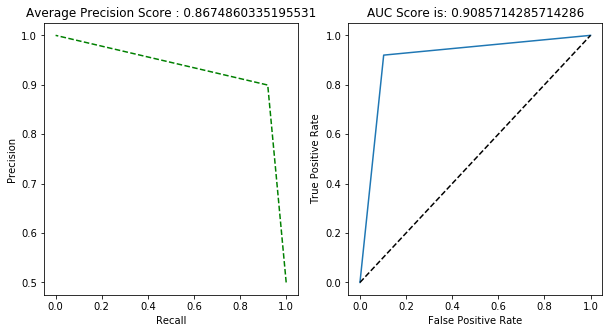

In [454]:
scoreplot(trainY, xgb_pred_train)

In [455]:
xgb_pred_test = grid.predict(df_test_pca)

Confusion Matrix : 
 [[ 91  26]
 [ 21 138]]
Accuracy = 0.8297101449275363
F1 Score = 0.8544891640866873
Sensitivity :  0.8125
Specificity :  0.8414634146341463


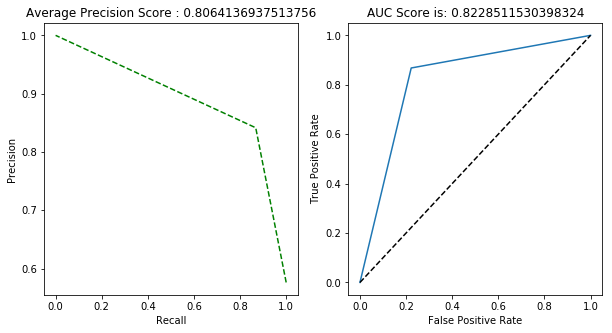

In [456]:
scoreplot(testY, xgb_pred_test)

### Neural Network

### Tune Batch Size and Number of Epochs

In [461]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', get_f1])
    return model

In [462]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [463]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(df_train_pca, trainY)

In [464]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8859 using {'batch_size': 40, 'epochs': 100}
mean=0.8583, std=0.02597 using {'batch_size': 10, 'epochs': 10}
mean=0.8775, std=0.01385 using {'batch_size': 10, 'epochs': 50}
mean=0.8725, std=0.01656 using {'batch_size': 10, 'epochs': 100}
mean=0.8181, std=0.01777 using {'batch_size': 20, 'epochs': 10}
mean=0.8766, std=0.01467 using {'batch_size': 20, 'epochs': 50}
mean=0.876, std=0.01642 using {'batch_size': 20, 'epochs': 100}
mean=0.7541, std=0.0801 using {'batch_size': 40, 'epochs': 10}
mean=0.8629, std=0.03086 using {'batch_size': 40, 'epochs': 50}
mean=0.8859, std=0.006552 using {'batch_size': 40, 'epochs': 100}
mean=0.7051, std=0.1068 using {'batch_size': 60, 'epochs': 10}
mean=0.8688, std=0.0112 using {'batch_size': 60, 'epochs': 50}
mean=0.8796, std=0.01382 using {'batch_size': 60, 'epochs': 100}
mean=0.4739, std=0.2088 using {'batch_size': 80, 'epochs': 10}
mean=0.8587, std=0.01872 using {'batch_size': 80, 'epochs': 50}
mean=0.8706, std=0.0151 using {'batch_s

### Tune the Training Optimization Algorithm

In [466]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [468]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=40, verbose=0)

In [470]:
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(df_train_pca, trainY)

In [471]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8845 using {'optimizer': 'RMSprop'}
mean=0.8406, std=0.03518 using {'optimizer': 'SGD'}
mean=0.8845, std=0.01822 using {'optimizer': 'RMSprop'}
mean=0.8678, std=0.02681 using {'optimizer': 'Adagrad'}
mean=0.8684, std=0.01329 using {'optimizer': 'Adadelta'}
mean=0.8837, std=0.01494 using {'optimizer': 'Adam'}
mean=0.8776, std=0.01384 using {'optimizer': 'Adamax'}
mean=0.8717, std=0.02355 using {'optimizer': 'Nadam'}


### Tune Learning Rate and Momentum

In [472]:
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1])
    return model

In [473]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=40, verbose=0)

In [474]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(df_train_pca, trainY)

In [475]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8795 using {'learn_rate': 0.3, 'momentum': 0.0}
mean=0.71, std=0.0225 using {'learn_rate': 0.001, 'momentum': 0.0}
mean=0.7313, std=0.08702 using {'learn_rate': 0.001, 'momentum': 0.2}
mean=0.7813, std=0.07586 using {'learn_rate': 0.001, 'momentum': 0.4}
mean=0.8115, std=0.04527 using {'learn_rate': 0.001, 'momentum': 0.6}
mean=0.8188, std=0.02858 using {'learn_rate': 0.001, 'momentum': 0.8}
mean=0.8418, std=0.02063 using {'learn_rate': 0.001, 'momentum': 0.9}
mean=0.8526, std=0.03905 using {'learn_rate': 0.01, 'momentum': 0.0}
mean=0.8633, std=0.009908 using {'learn_rate': 0.01, 'momentum': 0.2}
mean=0.8541, std=0.02727 using {'learn_rate': 0.01, 'momentum': 0.4}
mean=0.8674, std=0.02999 using {'learn_rate': 0.01, 'momentum': 0.6}
mean=0.8762, std=0.01447 using {'learn_rate': 0.01, 'momentum': 0.8}
mean=0.8756, std=0.02252 using {'learn_rate': 0.01, 'momentum': 0.9}
mean=0.8718, std=0.01294 using {'learn_rate': 0.1, 'momentum': 0.0}
mean=0.8643, std=0.02769 using {

### Tune Network Weight Initialization

In [476]:
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy', get_f1])
    return model

In [477]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=40, verbose=0)

In [478]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(df_train_pca, trainY)

In [479]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8853 using {'init_mode': 'glorot_uniform'}
mean=0.8707, std=0.02215 using {'init_mode': 'uniform'}
mean=0.8834, std=0.01485 using {'init_mode': 'lecun_uniform'}
mean=0.8759, std=0.01878 using {'init_mode': 'normal'}
mean=0.1872, std=0.2648 using {'init_mode': 'zero'}
mean=0.8781, std=0.01184 using {'init_mode': 'glorot_normal'}
mean=0.8853, std=0.01888 using {'init_mode': 'glorot_uniform'}
mean=0.8786, std=0.01854 using {'init_mode': 'he_normal'}
mean=0.8853, std=0.0106 using {'init_mode': 'he_uniform'}


### Tune the Neuron Activation Function

In [480]:
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, kernel_initializer='glorot_uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy', get_f1])
    return model

In [481]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=40, verbose=0)

In [482]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(df_train_pca, trainY)

In [483]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8843 using {'activation': 'softmax'}
mean=0.8843, std=0.009109 using {'activation': 'softmax'}
mean=0.8729, std=0.01736 using {'activation': 'softplus'}
mean=0.8672, std=0.01234 using {'activation': 'softsign'}
mean=0.8814, std=0.01045 using {'activation': 'relu'}
mean=0.8757, std=0.01236 using {'activation': 'tanh'}
mean=0.8643, std=0.01961 using {'activation': 'sigmoid'}
mean=0.8672, std=0.01234 using {'activation': 'hard_sigmoid'}
mean=0.87, std=0.02022 using {'activation': 'linear'}


### Tune Dropout Regularization

In [493]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, kernel_initializer='glorot_uniform', activation='softmax', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy', get_f1])
    return model

In [494]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=40, verbose=0)

In [495]:
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(df_train_pca, trainY)

In [496]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8886 using {'dropout_rate': 0.0, 'weight_constraint': 5}
mean=0.8717, std=0.01884 using {'dropout_rate': 0.0, 'weight_constraint': 1}
mean=0.8816, std=0.02014 using {'dropout_rate': 0.0, 'weight_constraint': 2}
mean=0.8738, std=0.01973 using {'dropout_rate': 0.0, 'weight_constraint': 3}
mean=0.868, std=0.01952 using {'dropout_rate': 0.0, 'weight_constraint': 4}
mean=0.8886, std=0.01427 using {'dropout_rate': 0.0, 'weight_constraint': 5}
mean=0.8655, std=0.01692 using {'dropout_rate': 0.1, 'weight_constraint': 1}
mean=0.8753, std=0.02204 using {'dropout_rate': 0.1, 'weight_constraint': 2}
mean=0.8794, std=0.01774 using {'dropout_rate': 0.1, 'weight_constraint': 3}
mean=0.8787, std=0.0164 using {'dropout_rate': 0.1, 'weight_constraint': 4}
mean=0.8817, std=0.01898 using {'dropout_rate': 0.1, 'weight_constraint': 5}
mean=0.8695, std=0.01377 using {'dropout_rate': 0.2, 'weight_constraint': 1}
mean=0.8846, std=0.01921 using {'dropout_rate': 0.2, 'weight_constraint': 2}
m

### Tune the Number of Neurons in the Hidden Layer

In [497]:
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=13, kernel_initializer='glorot_uniform', activation='softmax', kernel_constraint=maxnorm(5)))
    model.add(Dropout(0.0))
    model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy', get_f1])
    return model

In [498]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=40, verbose=0)

In [499]:
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1')
grid_result = grid.fit(df_train_pca, trainY)

In [500]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8835 using {'neurons': 30}
mean=0.1872, std=0.2648 using {'neurons': 1}
mean=0.8747, std=0.01003 using {'neurons': 5}
mean=0.875, std=0.02126 using {'neurons': 10}
mean=0.8814, std=0.016 using {'neurons': 15}
mean=0.8784, std=0.02067 using {'neurons': 20}
mean=0.8767, std=0.01865 using {'neurons': 25}
mean=0.8835, std=0.02199 using {'neurons': 30}


In [503]:
preds_nn_train = grid.predict(df_train_pca)

Confusion Matrix : 
 [[317  33]
 [ 30 320]]
Accuracy = 0.91
F1 Score = 0.9103840682788051
Sensitivity :  0.9135446685878963
Specificity :  0.9065155807365439


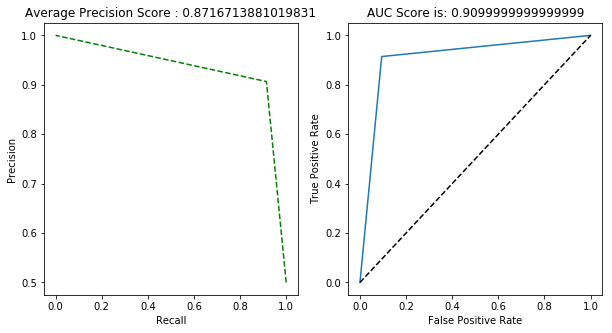

In [504]:
scoreplot(trainY, preds_nn_train)

In [505]:
preds_nn_test = grid.predict(df_test_pca)

Confusion Matrix : 
 [[ 98  19]
 [ 15 144]]
Accuracy = 0.8768115942028986
F1 Score = 0.8944099378881988
Sensitivity :  0.8672566371681416
Specificity :  0.8834355828220859


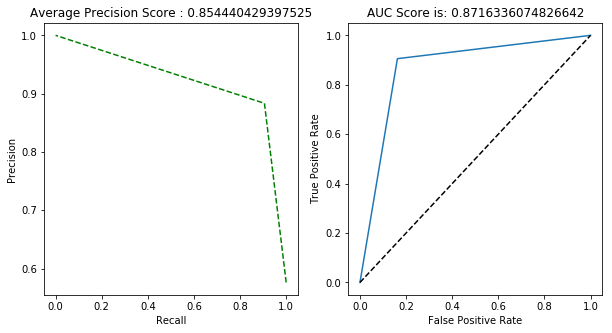

In [506]:
scoreplot(testY, preds_nn_test)